In [4]:
import numpy as np
import pandas as pd

In [742]:
data=pd.read_excel('../Data/my_merged_data.xlsx')

In [743]:
data

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
0,0,20230624,1,800,1,1,2,-1,68.1,54.0,12,27,10781,350,442,5,0,0,5,4,5,18.1,0.0,0.0,18.1,50.0,34.4,16.8,250,11,0.135450,0.120868,0.124105,0.138425,0.094704,0.102217,0.117143,0.142857,0.115385,0.115385,4,1,6.0,0,0.62,0.28,13.0,22.0,21.0,78.0,0.278107,0.527273,0.527273,27.9,0.0,4.8,110,56,0.0,46.2,20230624,26.275,0.200000,0.066667,0.200000,0.066667
1,1,20230624,1,800,2,4,3,1,68.5,53.0,3,19,7980,381,705,3,0,0,3,3,2,17.7,0.0,0.0,17.7,50.8,34.1,17.7,311,-17,0.067308,0.084615,0.076555,0.100478,0.116165,0.117293,0.102362,0.091864,0.123404,0.109220,4,1,6.0,0,0.60,NaN,18.0,NaN,30.0,NaN,0.000000,0.534247,0.534247,27.9,0.0,4.8,110,56,0.0,46.2,20230624,26.275,0.052632,0.157895,0.052632,0.157895
2,2,20230624,1,800,3,9,2,0,68.5,55.0,6,12,4705,343,420,7,0,0,7,7,3,18.2,0.0,0.0,18.2,50.3,34.6,17.5,270,3,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.195238,0.116667,4,1,6.0,0,0.83,NaN,5.0,NaN,6.0,NaN,0.000000,0.520000,0.520000,27.9,0.0,4.8,110,56,0.0,46.2,20230624,26.275,0.066667,0.066667,0.066667,0.066667
3,3,20230624,1,800,4,3,3,0,68.6,56.0,18,13,5448,445,943,1,0,0,1,1,1,17.7,0.0,0.0,17.7,50.9,33.9,17.9,301,7,0.156444,0.132137,0.158986,0.124424,0.122981,0.122430,0.141573,0.110112,0.130435,0.119830,4,1,6.0,0,0.34,0.34,22.0,10.0,65.0,29.0,0.323944,0.328671,0.328671,27.9,0.0,4.8,110,56,0.0,46.2,20230624,26.275,0.066667,0.200000,0.066667,0.200000
4,4,20230624,1,800,5,8,3,0,69.0,55.0,13,19,7231,367,711,10,0,0,10,8,7,18.6,0.0,0.0,18.6,50.4,34.8,17.5,265,0,0.093869,0.099154,0.064677,0.074627,0.099710,0.098050,0.073569,0.108992,0.078762,0.123769,4,1,6.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,27.9,0.0,4.8,110,56,0.0,46.2,20230624,26.275,0.034483,0.103448,0.034483,0.103448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,28678,20190111,9,900,6,8,3,1,64.1,54.5,10,19,7980,381,1561,2,0,0,2,2,3,14.7,0.0,0.0,21.4,42.7,34.9,15.0,308,5,0.078571,0.089286,0.000000,0.000000,0.116165,0.117293,0.102362,0.091864,0.117873,0.122998,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,20190111,7.875,0.121951,0.170732,0.090909,0.090909
28679,28679,20190111,9,900,7,3,4,1,64.2,57.0,18,17,6512,432,1151,4,0,0,4,4,4,15.2,0.0,0.0,21.9,42.3,35.2,14.9,311,-2,0.156444,0.132137,0.158986,0.124424,0.102273,0.107801,0.125000,0.111111,0.087750,0.125109,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,20190111,7.875,0.037037,0.037037,0.090909,0.090909
28680,28680,20190111,9,900,8,1,3,1,64.5,53.0,26,27,10781,350,1174,8,0,0,6,6,10,15.6,0.0,0.0,22.3,42.2,35.6,14.8,282,-4,0.086402,0.105361,0.000000,0.000000,0.094704,0.102217,0.117143,0.142857,0.095400,0.088586,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,20190111,7.875,0.102041,0.102041,0.090909,0.090909
28681,28681,20190111,9,900,9,4,4,1,64.6,54.0,31,32,13727,360,1027,9,0,0,9,8,9,15.7,0.0,0.0,22.5,42.1,35.9,14.9,316,4,0.110809,0.117121,0.094421,0.077253,0.078531,0.093028,0.091667,0.075000,0.072055,0.095424,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0

In [745]:
data['기수통산승률']=data['기수통산1착승률']+data['기수통산2착승률']
data['기수최근승률']=data['기수최근1년간1착승률']+data['기수최근1년간2착승률']
data['조교사통산승률']=data['조교사통산1착승률']+data['조교사통산2착승률']
data['조교사최근승률']=data['조교사최근1년간1착승률']+data['조교사최근1년간2착승률']
data['말통산승률']=data['horse_total_post1']+data['horse_total_post2']
data['말최근승률']=data['horse_recent_post1']+data['horse_recent_post2']
data['조교사위탁승률']=data['조교사위탁경주마1위승률']+data['조교사위탁경주마2위승률']
data['체중변화']=data['체중증감']/(data['마체중']-data['체중증감'])


data=data.drop(columns=['풍향(16방위)','체중증감','조교사위탁경주마1위승률','조교사위탁경주마2위승률','기수통산1착승률','기수통산2착승률','기수최근1년간1착승률','기수최근1년간2착승률','조교사통산1착승률','조교사통산2착승률','조교사최근1년간1착승률','조교사최근1년간2착승률','horse_total_post1','horse_total_post2','horse_recent_post1','horse_recent_post2'])
data=data.drop(columns=['Unnamed: 0','mom_rating','dad_rating','mom_total_in3','dad_total_in3','mom_total','dad_total','dad_post','mom_post'])
data_test=data[data['경주일자']>=20220632]
data_train=data[data['경주일자']<20220632]


unique = data[["경주일자",	"경주번호"]].drop_duplicates()
unique = unique.reset_index()

data["key"]=0
for i in range(len(unique)):
    data.loc[(data["경주일자"]==unique["경주일자"][i])&(data["경주번호"]==unique["경주번호"][i]), "key"] = i

unique = data_test[["경주일자",	"경주번호"]].drop_duplicates()
unique = unique.reset_index()

data_test["key"]=0
for i in range(len(unique)):
    data_test.loc[(data_test["경주일자"]==unique["경주일자"][i])&(data_test["경주번호"]==unique["경주번호"][i]), "key"] = i

C:\Users\wjswp\AppData\Local\Temp\ipykernel_21312\1687679874.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["key"]=0


In [975]:
data[data['등급'].isna()]

,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,주로상태_함수율,혈통,등급,레이팅,max_post,기온(°C),강수량(mm),풍속(m/s),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화,key
365,20230610,7,1400,1,2,3,-1,112.7,51.0,24,7,2366,321,609,1,0,0,1,1,1,16.7,0.0,16.7,66.9,45.8,83.2,14.9,273,4,1,NaN,104,0.000000,27.0,0.0,2.3,67,0.0,44.0,20230610,24.950,0.211171,0.222222,0.250634,0.208723,0.571429,0.571429,0.241379,0.000000,38
366,20230610,7,1400,2,7,5,0,115.7,56.5,12,15,5820,383,762,5,0,0,4,4,3,17.4,0.0,17.4,67.7,48.0,83.6,16.6,298,4,1,NaN,120,0.422680,27.0,0.0,2.3,67,0.0,44.0,20230610,24.950,0.256319,0.262530,0.236254,0.216710,0.567164,0.400000,0.291339,-0.009967,38
367,20230610,7,1400,3,6,4,0,115.8,55.5,10,23,10543,408,684,3,0,0,3,3,4,17.0,0.0,17.0,67.2,48.6,83.3,16.7,304,4,1,NaN,118,0.000000,27.0,0.0,2.3,67,0.0,44.0,20230610,24.950,0.242391,0.243421,0.244238,0.240196,0.580645,0.352941,0.248538,-0.009772,38
368,20230610,7,1400,4,3,4,0,115.8,60.0,9,4,1268,355,824,2,0,0,2,2,2,16.7,0.0,16.7,67.1,48.7,83.2,17.0,283,4,1,NaN,127,0.506173,27.0,0.0,2.3,67,0.0,44.0,20230610,24.950,0.247273,0.276029,0.231073,0.214085,0.645161,0.476190,0.258495,0.003546,38
369,20230610,7,1400,5,5,5,-1,116.7,58.0,18,13,5448,445,964,6,0,0,5,5,5,17.7,0.0,17.7,67.9,48.8,83.9,17.2,325,4,1,NaN,123,0.623188,27.0,0.0,2.3,67,0.0,44.0,20230610,24.950,0.288581,0.283410,0.245411,0.251685,0.557377,0.240000,0.266598,-0.003067,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28629,20190111,4,1110,8,12,13,-1,90.8,57.0,10,19,7980,381,1561,9,0,0,10,11,10,18.0,0.0,0.0,41.8,49.0,58.2,16.9,306,8,1,NaN,103,0.000000,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.167857,0.000000,0.233459,0.194226,0.330827,0.181818,0.240871,0.013245,2862
28630,20190111,4,1110,9,9,4,1,90.9,56.0,9,13,5448,445,1311,3,0,0,2,3,2,17.4,0.0,0.0,40.9,50.0,57.4,17.3,302,8,1,NaN,103,0.422680,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.247273,0.276029,0.245411,0.251685,0.412698,0.181818,0.260107,0.023729,2862
28631,20190111,4,1110,10,11,6,-1,91.1,57.0,24,27,10161,321,1317,11,0,0,8,8,6,18.1,0.0,0.0,41.7,49.4,57.9,17.3,313,8,1,NaN,119,0.398374,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.259547,0.191257,0.273792,0.249221,0.349727,0.105263,0.250569,0.003205,2862
28632,20190111,4,1110,11,4,11,0,91.1,57.0,27,32,12436,400,1628,2,0,0,4,5,9,17.4,0.0,0.0,41.2,49.9,57.7,17.2,311,8,1,NaN,95,0.593220,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.205697,0.138686,0.192425,0.125000,0.197403,0.181818,0.189803,0.016340,2862


In [977]:
data

,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,주로상태_함수율,혈통,등급,레이팅,max_post,기온(°C),강수량(mm),풍속(m/s),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화,key
0,20230624,1,800,1,1,2,-1,68.1,54.0,12,27,10781,350,442,5,0,0,5,4,5,18.1,0.0,0.0,18.1,50.0,34.4,16.8,250,4,1,6.0,0,0.527273,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.256319,0.262530,0.196921,0.260000,0.266667,0.266667,0.230769,0.046025,0
1,20230624,1,800,2,4,3,1,68.5,53.0,3,19,7980,381,705,3,0,0,3,3,2,17.7,0.0,0.0,17.7,50.8,34.1,17.7,311,4,1,6.0,0,0.534247,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.151923,0.177033,0.233459,0.194226,0.210526,0.210526,0.232624,-0.051829,0
2,20230624,1,800,3,9,2,0,68.5,55.0,6,12,4705,343,420,7,0,0,7,7,3,18.2,0.0,0.0,18.2,50.3,34.6,17.5,270,4,1,6.0,0,0.520000,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.275086,0.295455,0.286079,0.265306,0.133333,0.133333,0.311905,0.011236,0
3,20230624,1,800,4,3,3,0,68.6,56.0,18,13,5448,445,943,1,0,0,1,1,1,17.7,0.0,0.0,17.7,50.9,33.9,17.9,301,4,1,6.0,0,0.328671,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.288581,0.283410,0.245411,0.251685,0.266667,0.266667,0.250265,0.023810,0
4,20230624,1,800,5,8,3,0,69.0,55.0,13,19,7231,367,711,10,0,0,10,8,7,18.6,0.0,0.0,18.6,50.4,34.8,17.5,265,4,1,6.0,0,0.000000,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.193023,0.139303,0.197760,0.182561,0.137931,0.137931,0.202532,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,20190111,9,900,6,8,3,1,64.1,54.5,10,19,7980,381,1561,2,0,0,2,2,3,14.7,0.0,0.0,21.4,42.7,34.9,15.0,308,8,0,4.0,0,0.000000,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.167857,0.000000,0.233459,0.194226,0.292683,0.181818,0.240871,0.016502,2867
28679,20190111,9,900,7,3,4,1,64.2,57.0,18,17,6512,432,1151,4,0,0,4,4,4,15.2,0.0,0.0,21.9,42.3,35.2,14.9,311,8,0,4.0,0,0.000000,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.288581,0.283410,0.210074,0.236111,0.074074,0.181818,0.212858,-0.006390,2867
28680,20190111,9,900,8,1,3,1,64.5,53.0,26,27,10781,350,1174,8,0,0,6,6,10,15.6,0.0,0.0,22.3,42.2,35.6,14.8,282,8,0,4.0,0,0.000000,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.191764,0.000000,0.196921,0.260000,0.204082,0.181818,0.183986,-0.013986,2867
28681,20190111,9,900,9,4,4,1,64.6,54.0,31,32,13727,360,1027,9,0,0,9,8,9,15.7,0.0,0.0,22.5,42.1,35.9,14.9,316,8,0,4.0,0,0.000000,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.227930,0.171674,0.171560,0.166667,0.095238,0.181818,0.167478,0.012821,2867


In [483]:
data
pd.get_dummies(data=data, columns=['출주번호', '마필성별'])

,경주일자,경주번호,경주거리,착순,마필연령,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,주로상태_함수율,혈통,등급,레이팅,max_post,기온(°C),강수량(mm),풍속(m/s),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화,key,출주번호_1,출주번호_2,출주번호_3,출주번호_4,출주번호_5,출주번호_6,출주번호_7,출주번호_8,출주번호_9,출주번호_10,출주번호_11,출주번호_12,출주번호_13,마필성별_-1,마필성별_0,마필성별_1
0,20230624,1,800,1,2,68.1,54.0,12,27,10781,350,442,5,0,0,5,4,5,18.1,0.0,0.0,18.1,50.0,34.4,16.8,250,4,1,6.0,0,0.527273,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.256319,0.262530,0.196921,0.260000,0.266667,0.266667,0.230769,0.046025,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20230624,1,800,2,3,68.5,53.0,3,19,7980,381,705,3,0,0,3,3,2,17.7,0.0,0.0,17.7,50.8,34.1,17.7,311,4,1,6.0,0,0.534247,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.151923,0.177033,0.233459,0.194226,0.210526,0.210526,0.232624,-0.051829,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,20230624,1,800,3,2,68.5,55.0,6,12,4705,343,420,7,0,0,7,7,3,18.2,0.0,0.0,18.2,50.3,34.6,17.5,270,4,1,6.0,0,0.520000,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.275086,0.295455,0.286079,0.265306,0.133333,0.133333,0.311905,0.011236,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,20230624,1,800,4,3,68.6,56.0,18,13,5448,445,943,1,0,0,1,1,1,17.7,0.0,0.0,17.7,50.9,33.9,17.9,301,4,1,6.0,0,0.328671,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.288581,0.283410,0.245411,0.251685,0.266667,0.266667,0.250265,0.023810,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,20230624,1,800,5,3,69.0,55.0,13,19,7231,367,711,10,0,0,10,8,7,18.6,0.0,0.0,18.6,50.4,34.8,17.5,265,4,1,6.0,0,0.000000,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.193023,0.139303,0.197760,0.182561,0.137931,0.137931,0.202532,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,20190111,9,900,6,3,64.1,54.5,10,19,7980,381,1561,2,0,0,2,2,3,14.7,0.0,0.0,21.4,42.7,34.9,15.0,308,8,0,4.0,0,0.000000,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.167857,0.000000,0.233459,0.194226,0.292683,0.181818,0.240871,0.016502,2867,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
28679,20190111,9,900,7,4,64.2,57.0,18,17,6512,432,1151,4,0,0,4,4,4,15.2,0.0,0.0,21.9,42.3,35.2,14.9,311,8,0,4.0,0,0.000000,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.288581,0.283410,0.210074,0.236111,0.074074,0.181818,0.212858,-0.006390,2867,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
28680,20190111,9,900,8,3,64.5,53.0,26,27,10781,350,1174,8,0,0,6,6,10,15.6,0.0,0.0,22.3,42.2,35.6,14.8,282,8,0,4.0,0,0.000000,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.191764,0.000000,0.196921,0.260000,0.204082,0.181818,0.183986,-0.013986,2867,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
28681,20190111,9,900,9,4,64.6,54.0,31,32,13727,360,1027,9,0,0,9,8,9,15.7,0.0,0.0,22.5,42.1,35.9,14.9,316,8,0,4.0,0,0.000000,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.227930,0.171674,0.171560,0.166667,0.095238,0.181818,0.167478,0.012821,2867,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [748]:
data_1200=data[data['경주거리']==1200]
data_800=data[data['경주거리']==800]
data_900=data[data['경주거리']==900]
data_1000=data[data['경주거리']==1000]
data_1110=data[data['경주거리']==1110]
data_1400=data[data['경주거리']==1400]
data_1610=data[data['경주거리']==1610]
data_1700=data[data['경주거리']==1700]
data_1800=data[data['경주거리']==1800]



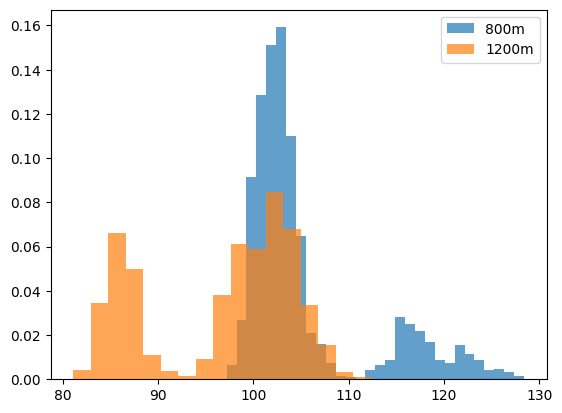

In [902]:
plt.hist(data_1400['경주기록(초)'],bins=30,label='800m',density=True,alpha=0.7)
plt.hist(data_1200['경주기록(초)'],bins=20,label='1200m',density=True,alpha=0.7)
plt.legend()
plt.show()

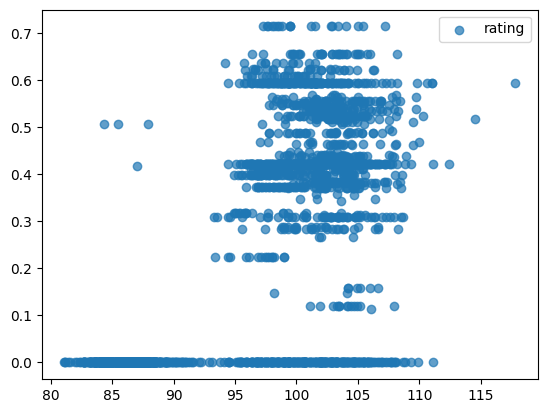

In [832]:
#plt.scatter(data_1200['경주기록(초)'],data_1200['마필연령'],label='age',alpha=0.7)
#plt.scatter(data_1200['경주기록(초)'],data_1200['강수량(mm)'],label='rain',alpha=0.7)
#plt.scatter(data_1200['경주기록(초)'],data_1200['혈통'],label='parent',alpha=0.7)
plt.scatter(data_1200['경주기록(초)'],data_1200['max_post'],label='rating',alpha=0.7)
plt.legend()
plt.show()


(array([0.01795498, 0.15306618, 0.17147003, 0.20378899, 0.25989829,
        0.29221725, 0.34563331, 0.36089504, 0.36942365, 0.37301465,
        0.43944807, 0.52159209, 0.50992135, 0.52024546, 0.59520749,
        0.56019529, 0.55256442, 0.49061975, 0.42194196, 0.40533361,
        0.31196773, 0.22219284, 0.14633306, 0.09875237, 0.05476268,
        0.03097234, 0.02019935, 0.01167074, 0.00269325, 0.00269325]),
 array([-5.64579409, -5.52768389, -5.40957369, -5.2914635 , -5.1733533 ,
        -5.0552431 , -4.9371329 , -4.81902271, -4.70091251, -4.58280231,
        -4.46469212, -4.34658192, -4.22847172, -4.11036152, -3.99225133,
        -3.87414113, -3.75603093, -3.63792073, -3.51981054, -3.40170034,
        -3.28359014, -3.16547995, -3.04736975, -2.92925955, -2.81114935,
        -2.69303916, -2.57492896, -2.45681876, -2.33870857, -2.22059837,
        -2.10248817]),
 <BarContainer object of 30 artists>)

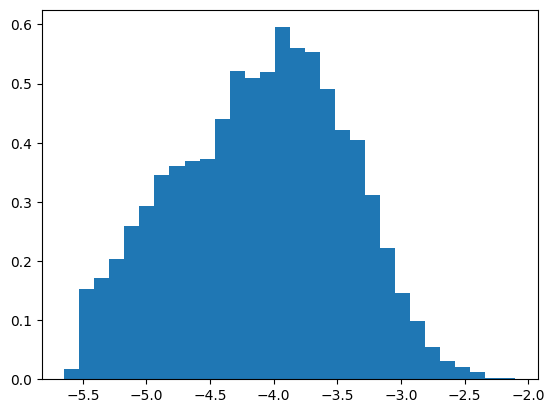

In [989]:
#레이팅 결측치 채우기
a=data[data['레이팅']!=0]
b=np.log((a['부담중량']+a['마체중'])/(a['레이팅']*a['마체중']*np.log(a['마필연령'])))
plt.hist(b,bins=30,density=True)

In [984]:
keys=data_1200['key'].unique()
a=data_1200[data_1200['key']==keys[10]]
print((a['부담중량']+a['마체중'])/(a['레이팅']*a['마체중']))
#print((a['부담중량']/a['레이팅']))
a[['경주기록(초)','마필연령','부담중량','레이팅','마체중','key','말최근승률','등급']]
#data_1200[data_1200['레이팅']==0]

1000    0.013240
1001    0.013324
1002    0.012500
1003    0.014578
1004    0.014426
1005    0.013747
1006    0.012465
1007    0.013962
1008    0.012020
1009    0.013417
dtype: float64


,경주기록(초),마필연령,부담중량,레이팅,마체중,key,말최근승률,등급
1000,100.1,5,55.0,90,287,103,0.342857,2.0
1001,101.0,9,56.0,92,248,103,0.258065,2.0
1002,101.5,5,58.0,96,290,103,0.303030,2.0
1003,101.6,10,51.0,82,261,103,0.121212,2.0
1004,101.8,8,51.5,83,261,103,0.051282,2.0
1005,101.9,16,53.5,87,273,103,0.105263,2.0
1006,102.6,13,58.0,96,295,103,0.080000,2.0
1007,103.3,8,53.0,86,264,103,0.139535,2.0
1008,104.2,8,60.0,100,297,103,0.085106,2.0
1009,105.6,6,55.0,90,265,103,0.133333,2.0


In [ ]:
rating_1200['age_under9']=0
rating_1200['rain_over8']=0
rating_1200.loc[rating_1200['마필연령']<9,'age_under9']=1
rating_1200.loc[rating_1200['강수량(mm)']>8,'rain_over8']=1
rating_1200


In [955]:
data_1200

,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,주로상태_함수율,혈통,등급,레이팅,max_post,기온(°C),강수량(mm),풍속(m/s),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화,key
146,20230623,9,1200,1,5,3,1,104.8,55.0,10,23,10543,408,649,5,0,0,5,6,4,17.7,0.0,0.0,55.6,49.2,73.7,15.8,283,6,1,2.0,91,0.000000,23.9,0.0,3.0,75,0.0,47.2,20230623,25.475,0.242391,0.243421,0.244238,0.240196,0.666667,0.666667,0.269646,-0.020761,15
147,20230623,9,1200,2,4,5,0,104.8,52.5,13,5,1841,432,631,3,0,0,4,4,2,17.7,0.0,0.0,55.5,49.3,73.5,15.9,296,6,1,2.0,86,0.555556,23.9,0.0,3.0,75,0.0,47.2,20230623,25.475,0.193023,0.139303,0.231939,0.245370,0.337349,0.243902,0.245642,-0.006711,15
148,20230623,9,1200,3,3,8,0,105.0,51.0,3,27,10781,350,442,6,0,0,6,5,6,17.9,0.0,0.0,55.8,49.2,73.6,15.8,264,6,1,2.0,0,0.000000,23.9,0.0,3.0,75,0.0,47.2,20230623,25.475,0.199170,0.211538,0.196921,0.260000,0.178771,0.102564,0.230769,-0.032967,15
149,20230623,9,1200,4,2,4,0,105.1,51.0,3,27,10161,321,367,2,0,0,2,2,3,17.4,0.0,0.0,55.3,49.8,73.4,16.2,295,6,1,2.0,85,0.555556,23.9,0.0,3.0,75,0.0,47.2,20230623,25.475,0.175676,0.171429,0.273792,0.249221,0.425532,0.372093,0.370572,0.003401,15
150,20230623,9,1200,5,6,4,-1,105.4,58.0,6,12,4705,343,420,8,0,0,10,10,7,18.2,0.0,0.0,56.2,49.2,74.0,16.0,275,6,1,2.0,97,0.411765,23.9,0.0,3.0,75,0.0,47.2,20230623,25.475,0.275086,0.295455,0.286079,0.265306,0.509804,0.410256,0.311905,0.014760,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28638,20190111,5,1200,5,4,4,1,89.1,56.5,20,5,1841,432,892,8,0,0,8,9,9,16.0,0.0,0.0,45.2,43.9,60.1,14.7,302,8,0,3.0,35,0.000000,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.233681,0.000000,0.231939,0.245370,0.065934,0.181818,0.219731,-0.025806,2863
28639,20190111,5,1200,6,5,5,1,89.3,54.5,20,19,7231,367,608,3,0,0,4,5,5,15.6,0.0,0.0,44.5,44.8,59.5,15.3,294,8,0,3.0,31,0.000000,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.242372,0.000000,0.197760,0.182561,0.110236,0.181818,0.144737,0.003413,2863
28640,20190111,5,1200,7,3,5,1,89.4,58.0,24,12,4705,343,1244,5,0,0,3,3,6,15.7,0.0,0.0,44.5,44.9,59.4,15.3,285,8,0,3.0,38,0.000000,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.264384,0.177885,0.286079,0.265306,0.061856,0.181818,0.277331,-0.003497,2863
28641,20190111,5,1200,8,6,4,-1,89.4,55.0,12,27,10161,321,1317,4,0,0,2,2,4,15.6,0.0,0.0,44.3,45.1,59.1,15.4,299,8,0,3.0,32,0.000000,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.256319,0.262530,0.273792,0.249221,0.133333,0.181818,0.250569,0.000000,2863


In [515]:
data_1200_1=data_1200[data_1200['출주번호']==1]
data_1200_2=data_1200[data_1200['출주번호']==2]
data_1200_3=data_1200[data_1200['출주번호']==3]
data_1200_4=data_1200[data_1200['출주번호']==4]
data_1200_5=data_1200[data_1200['출주번호']==5]
data_1200_6=data_1200[data_1200['출주번호']==6]
data_1200_7=data_1200[data_1200['출주번호']==7]
data_1200_8=data_1200[data_1200['출주번호']==8]

In [597]:
data_1000

,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,주로상태_함수율,혈통,등급,레이팅,max_post,기온(°C),강수량(mm),풍속(m/s),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화,key
10,20230624,2,1000,1,7,3,0,87.1,55.5,6,12,4705,343,420,2,0,0,2,2,2,17.8,0.0,0.0,35.4,51.7,52.3,18.0,275,4,1,5.0,26,0.567568,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.275086,0.295455,0.286079,0.265306,0.240000,0.240000,0.311905,0.003650,1
11,20230624,2,1000,2,6,8,-1,87.5,55.0,7,13,5448,445,943,6,0,0,5,5,6,18.4,0.0,0.0,35.9,51.6,53.1,17.4,273,4,1,5.0,25,0.510204,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.173456,0.209459,0.245411,0.251685,0.165605,0.133333,0.250265,0.003676,1
12,20230624,2,1000,3,2,4,-1,87.6,55.0,3,17,6512,432,812,8,0,0,9,9,8,18.6,0.0,0.0,36.4,51.2,53.5,17.4,283,4,1,5.0,31,0.322034,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.175676,0.171429,0.210074,0.236111,0.117647,0.153846,0.274631,-0.003521,1
13,20230624,2,1000,4,8,4,1,87.6,57.5,7,27,12632,493,747,1,0,0,1,1,1,17.4,0.0,0.0,35.0,52.6,51.9,18.6,291,4,1,5.0,30,0.406593,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.175798,0.205882,0.183265,0.148073,0.204082,0.102564,0.214190,0.021053,1
14,20230624,2,1000,5,10,4,-1,87.8,56.0,9,19,7231,367,711,7,0,0,7,7,5,18.5,0.0,0.0,36.1,51.7,53.3,17.8,243,4,1,5.0,27,0.366337,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.247273,0.276029,0.197760,0.182561,0.127660,0.127660,0.202532,0.012500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28595,20190111,1,1000,6,9,4,1,88.7,57.0,7,19,7980,381,1561,2,0,0,4,4,4,17.7,0.0,0.0,35.6,53.1,52.8,18.7,282,8,1,4.0,0,0.000000,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.175798,0.205882,0.233459,0.194226,0.349206,0.181818,0.240871,0.048327,2859
28596,20190111,1,1000,7,2,3,0,88.9,54.0,27,32,12436,400,1628,4,0,0,5,5,6,18.0,0.0,0.0,35.9,53.0,53.0,18.6,285,8,1,4.0,38,0.309091,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.205697,0.138686,0.192425,0.125000,0.183908,0.117647,0.189803,0.003521,2859
28597,20190111,1,1000,8,5,5,0,89.0,53.0,33,24,8589,257,1314,9,0,0,9,9,10,18.7,0.0,0.0,36.5,52.5,53.6,18.2,253,8,1,4.0,36,0.411765,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.188811,0.000000,0.186168,0.140078,0.193548,0.181818,0.168189,0.003968,2859
28598,20190111,1,1000,9,4,6,0,89.1,55.0,6,23,10543,408,1290,5,0,0,6,6,9,18.0,0.0,0.0,35.9,53.2,53.1,18.7,279,8,1,4.0,40,0.369863,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.275086,0.295455,0.244238,0.240196,0.138365,0.181818,0.189147,0.014545,2859


(array([26., 40.,  5.,  8., 41., 55., 40.,  5.,  1.,  1.]),
 array([ 82.1 ,  85.67,  89.24,  92.81,  96.38,  99.95, 103.52, 107.09,
        110.66, 114.23, 117.8 ]),
 <BarContainer object of 10 artists>)

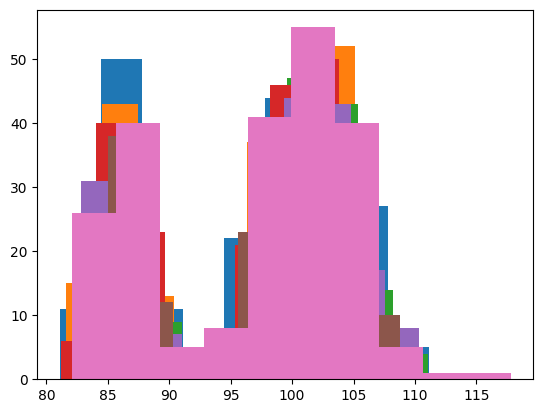

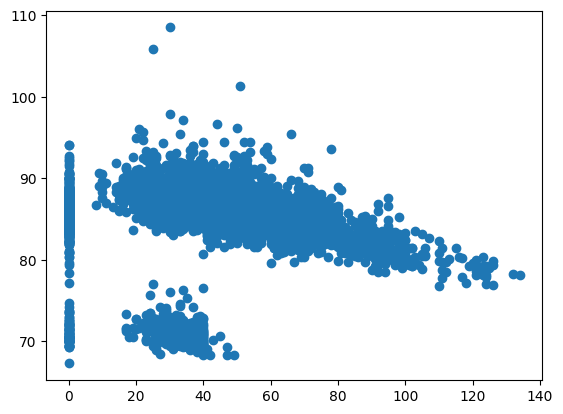

In [121]:
# plt.scatter(data_800['레이팅'],data_800['경주기록(초)'])
# plt.scatter(data_900['레이팅'],data_900['경주기록(초)'])
plt.scatter(data_1000['레이팅'],data_1000['경주기록(초)'])
# plt.scatter(data_1100['레이팅'],data_1100['경주기록(초)'])
# plt.scatter(data_1200['레이팅'],data_1200['경주기록(초)'])
# plt.scatter(data_1400['레이팅'],data_1400['경주기록(초)'])
#plt.scatter(data_1700['레이팅'],data_1700['경주기록(초)'])
#plt.scatter(data_1800['레이팅'],data_1800['경주기록(초)'])

plt.show()
#k_means

In [956]:
nankey=np.unique(data_1200[data_1200['등급'].isna()]['key'])
a=data_1200
for i in range(len(nankey)):
    a=a[a['key']!=nankey[i]]

data_test_1200=data_test[data_test['경주거리']==1200]

from sklearn.cluster import KMeans
k=2
model=KMeans(n_clusters=k,random_state=10)
model.fit(a[['경주기록(초)']])
data_1200['cluster']=model.predict(data_1200[['경주기록(초)']])
data_test_1200['cluster']=model.predict(data_test_1200[['경주기록(초)']])

data_test_1200=data_test_1200.drop(columns=['조교사최근1년간출전횟수','조교사위탁경주마출전횟수','서울,제주S1F구간통과순위(서울,제주공통)','서울,제주1코너구간통과순위(서울,제주공통)','서울,제주2코너구간통과순위(서울,제주공통)','서울,제주3코너구간통과순위(서울,제주공통)','서울,제주4코너구간통과순위(서울,제주공통)','서울,제주G1F구간통과순위(서울,제주공통)','제주S-1F통과기록','제주1코너통과기록','제주2코너통과기록','제주3코너통과기록','제주G-3F통과기록','제주4코너통과기록','제주G-1F통과기록'])
data_1200=data_1200.drop(columns=['조교사최근1년간출전횟수','조교사위탁경주마출전횟수','서울,제주S1F구간통과순위(서울,제주공통)','서울,제주1코너구간통과순위(서울,제주공통)','서울,제주2코너구간통과순위(서울,제주공통)','서울,제주3코너구간통과순위(서울,제주공통)','서울,제주4코너구간통과순위(서울,제주공통)','서울,제주G1F구간통과순위(서울,제주공통)','제주S-1F통과기록','제주1코너통과기록','제주2코너통과기록','제주3코너통과기록','제주G-3F통과기록','제주4코너통과기록','제주G-1F통과기록'])

C:\Users\wjswp\AppData\Local\Temp\ipykernel_21312\1830607911.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1200['cluster']=model.predict(data_1200[['경주기록(초)']])
C:\Users\wjswp\AppData\Local\Temp\ipykernel_21312\1830607911.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_1200['cluster']=model.predict(data_test_1200[['경주기록(초)']])


Text(0.5, 1.0, 'weight_diff')

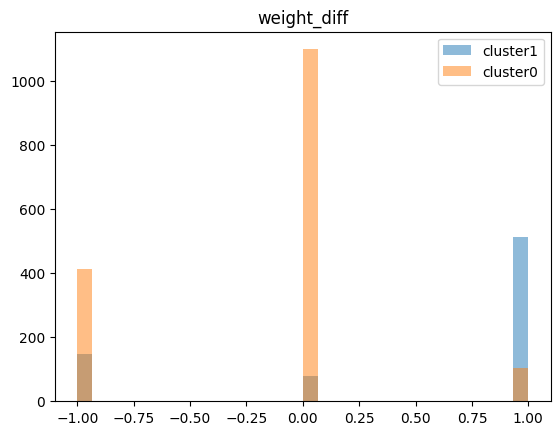

In [969]:
plt.hist(data_1200[data_1200['cluster']==1][dif_col[1]], density=False,alpha=0.5,bins=30,label='cluster1')
plt.hist(data_1200[data_1200['cluster']==0][dif_col[1]], density=False,alpha=0.5,bins=30,label='cluster0')
plt.legend()
plt.title('weight_diff')

In [962]:
dif_col_1000=['마필연령', '마필성별', '조교사통산출전횟수', '마체중', '혈통', '레이팅', 'max_post', '말통산승률', '체중변화']
dif_col=['마필연령','마필성별','조교사경력(년)','조교사통산출전횟수','마체중','혈통','레이팅','max_post','체중변화']
data_1200[data_1200['cluster']==1].describe()
#data_1000[data_1000['cluster']==0].describe()[dif_col]
#cluster0이 잘달리는 애들


,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,마체중,주로상태_함수율,혈통,등급,레이팅,max_post,기온(°C),강수량(mm),풍속(m/s),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화,key,cluster
count,7.400000e+02,740.000000,740.0,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,725.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.0,740.000000,7.400000e+02,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.0
mean,2.020378e+07,5.927027,1200.0,5.604054,5.678378,4.172973,0.490541,86.192432,55.522973,15.506757,21.254054,8553.014865,307.775676,8.955405,0.005405,2.346207,39.747297,0.003754,18.115000,0.251081,3.945811,66.681081,0.0,24.255405,2.020378e+07,17.833716,0.211043,0.172306,0.214508,0.188436,0.216809,0.183366,0.214139,0.001692,1685.239189,1.0
std,1.012502e+04,2.697179,0.0,3.057188,3.060388,1.539669,0.808391,1.892009,3.147289,8.587287,8.037315,3540.607642,15.734724,5.293488,0.073372,0.504266,22.631057,0.039853,8.540768,1.083677,1.486901,15.253418,0.0,11.801673,1.012502e+04,7.990009,0.049401,0.087553,0.032283,0.052971,0.106849,0.063180,0.041298,0.021495,656.302185,0.0
min,2.019011e+07,1.000000,1200.0,1.000000,1.000000,2.000000,-1.000000,81.100000,51.000000,3.000000,4.000000,1268.000000,260.000000,4.000000,0.000000,1.000000,0.000000,0.000000,2.100000,0.000000,1.200000,41.000000,0.0,4.200000,2.019011e+07,6.575000,0.078616,0.000000,0.171560,0.112150,0.039216,0.074074,0.139202,-0.066667,350.000000,1.0
25%,2.019113e+07,4.000000,1200.0,3.000000,3.000000,3.000000,0.000000,84.800000,53.000000,9.000000,17.000000,6512.000000,296.000000,4.000000,0.000000,2.000000,31.000000,0.000000,11.000000,0.000000,2.900000,56.000000,0.0,12.300000,2.019113e+07,10.300000,0.175579,0.133333,0.186168,0.140078,0.144928,0.173913,0.179315,-0.011731,1231.000000,1.0
50%,2.021012e+07,6.000000,1200.0,6.000000,6.000000,4.000000,1.000000,86.100000,55.500000,13.000000,23.000000,8589.000000,307.000000,7.000000,0.000000,2.000000,41.000000,0.000000,17.800000,0.000000,4.000000,64.000000,0.0,24.200000,2.021012e+07,17.300000,0.211171,0.171674,0.205966,0.182561,0.197183,0.181818,0.204677,0.000000,1595.000000,1.0
75%,2.021083e+07,8.000000,1200.0,8.000000,8.000000,5.000000,1.000000,87.300000,57.500000,24.000000,27.000000,12436.000000,319.000000,12.000000,0.000000,3.000000,53.000000,0.000000,24.600000,0.000000,4.900000,78.000000,0.0,33.200000,2.021083e+07,25.425000,0.256319,0.243421,0.236254,0.240196,0.278481,0.181818,0.245658,0.012539,2145.000000,1.0
max,2.022122e+07,11.000000,1200.0,12.000000,12.000000,13.000000,1.000000,93.800000,66.000000,33.000000,32.000000,13727.000000,358.000000,20.000000,1.000000,3.000000,157.000000,0.506173,35.500000,7.600000,7.800000,99.000000,0.0,50.400000,2.022122e+07,31.475000,0.288581,0.295455,0.286079,0.265306,0.792453,0.560000,0.345178,0.098976,2863.000000,1.0


(array([ 4.,  1.,  2.,  9., 11., 20., 30., 53., 78., 40., 75., 61., 71.,
        61., 55., 47., 39., 27., 12., 11.,  6.,  7.,  5.,  4.,  3.,  1.,
         1.,  1.,  2.,  3.]),
 array([81.1       , 81.52333333, 81.94666667, 82.37      , 82.79333333,
        83.21666667, 83.64      , 84.06333333, 84.48666667, 84.91      ,
        85.33333333, 85.75666667, 86.18      , 86.60333333, 87.02666667,
        87.45      , 87.87333333, 88.29666667, 88.72      , 89.14333333,
        89.56666667, 89.99      , 90.41333333, 90.83666667, 91.26      ,
        91.68333333, 92.10666667, 92.53      , 92.95333333, 93.37666667,
        93.8       ]),
 <BarContainer object of 30 artists>)

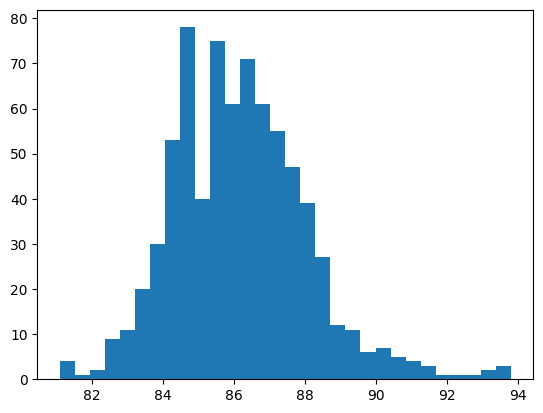

In [968]:
plt.hist(data_1200[data_1200['cluster']==1]['경주기록(초)'],bins=30)

In [599]:
data_1000_1=data_1000[(data_1000['출주번호']==1)&(data_1000['cluster']==0)]
data_1000_2=data_1000[(data_1000['출주번호']==2)&(data_1000['cluster']==0)]
data_1000_3=data_1000[(data_1000['출주번호']==3)&(data_1000['cluster']==0)]
data_1000_4=data_1000[(data_1000['출주번호']==4)&(data_1000['cluster']==0)]
data_1000_5=data_1000[(data_1000['출주번호']==5)&(data_1000['cluster']==0)]
data_1000_6=data_1000[(data_1000['출주번호']==6)&(data_1000['cluster']==0)]
data_1000_7=data_1000[(data_1000['출주번호']==7)&(data_1000['cluster']==0)]
data_1000_8=data_1000[(data_1000['출주번호']==8)&(data_1000['cluster']==0)]

In [609]:
data_1000=data_1000.reset_index(drop=True)

In [617]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
scale_col=['부담중량','마체중','혈통','레이팅','max_post','말통산승률','말최근승률','체중변화']
scaler=StandardScaler()
scaler.fit(data_1000[scale_col])
data_1000_scaled=scaler.transform(data_1000[scale_col])

data_1000_scaled=pd.DataFrame(data_1000_scaled,columns=scale_col)
non_scale_1000=data_1000.drop(columns=scale_col)

from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca.fit(data_1000_scaled)

df_pca=pca.transform(data_1000_scaled)
df_pca=pd.DataFrame(df_pca)
df_pca
print(sum(pca.explained_variance_ratio_))
a=pd.concat([non_scale_1000,df_pca],axis=1)
a


0.7136357645153849


,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),기수경력(년),조교사경력(년),조교사통산출전횟수,주로상태_함수율,등급,기온(°C),강수량(mm),풍속(m/s),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,조교사위탁승률,key,cluster,0,1,2,3
0,20230624,2,1000,1,7,3,0,87.1,6,12,4705,4,5.0,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.275086,0.295455,0.286079,0.265306,0.311905,1,0,0.714404,-0.234867,0.691096,0.380120
1,20230624,2,1000,2,6,8,-1,87.5,7,13,5448,4,5.0,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.173456,0.209459,0.245411,0.251685,0.250265,1,0,-0.389604,-1.002075,-0.090271,0.326846
2,20230624,2,1000,3,2,4,-1,87.6,3,17,6512,4,5.0,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.175676,0.171429,0.210074,0.236111,0.274631,1,0,-0.825493,-0.524503,-0.149411,-0.020779
3,20230624,2,1000,4,8,4,1,87.6,7,27,12632,4,5.0,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.175798,0.205882,0.183265,0.148073,0.214190,1,0,-0.108119,-0.291412,-1.322062,0.305844
4,20230624,2,1000,5,10,4,-1,87.8,9,19,7231,4,5.0,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.247273,0.276029,0.197760,0.182561,0.202532,1,0,-1.080075,-1.498477,-0.031870,0.146060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,20190111,1,1000,6,9,4,1,88.7,7,19,7980,8,4.0,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.175798,0.205882,0.233459,0.194226,0.240871,2859,0,-0.744079,1.533764,-0.042745,1.371528
7990,20190111,1,1000,7,2,3,0,88.9,27,32,12436,8,4.0,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.205697,0.138686,0.192425,0.125000,0.189803,2859,0,-0.552240,-0.469757,-0.359152,0.403870
7991,20190111,1,1000,8,5,5,0,89.0,33,24,8589,8,4.0,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.188811,0.000000,0.186168,0.140078,0.168189,2859,0,-0.327023,-1.039725,0.819668,0.664627
7992,20190111,1,1000,9,4,6,0,89.1,6,23,10543,8,4.0,7.6,0.0,1.9,64,0.0,12.0,20190111,7.875,0.275086,0.295455,0.244238,0.240196,0.189147,2859,0,-0.276624,-0.453440,-0.378767,0.625832


In [646]:
a['real_in5']=0
a['real_in3']=0
a.loc[(a['착순']<=5),'real_in5']=1
a.loc[(a['착순']<=3),'real_in3']=1

In [648]:
a_train=a[a['경주일자']<=20220632].reset_index(drop=True)
a_test=a[a['경주일자']>20220632].reset_index(drop=True)

In [733]:
a_test

,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),기수경력(년),조교사경력(년),조교사통산출전횟수,주로상태_함수율,등급,기온(°C),강수량(mm),풍속(m/s),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,조교사위탁승률,key,cluster,0,1,2,3,real_in5,real_in3
0,20230624,2,1000,1,7,3,0,87.1,6,12,4705,4,5.0,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.275086,0.295455,0.286079,0.265306,0.311905,1,0,0.714404,-0.234867,0.691096,0.380120,1,1
1,20230624,2,1000,2,6,8,-1,87.5,7,13,5448,4,5.0,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.173456,0.209459,0.245411,0.251685,0.250265,1,0,-0.389604,-1.002075,-0.090271,0.326846,1,1
2,20230624,2,1000,3,2,4,-1,87.6,3,17,6512,4,5.0,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.175676,0.171429,0.210074,0.236111,0.274631,1,0,-0.825493,-0.524503,-0.149411,-0.020779,1,1
3,20230624,2,1000,4,8,4,1,87.6,7,27,12632,4,5.0,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.175798,0.205882,0.183265,0.148073,0.214190,1,0,-0.108119,-0.291412,-1.322062,0.305844,1,0
4,20230624,2,1000,5,10,4,-1,87.8,9,19,7231,4,5.0,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.247273,0.276029,0.197760,0.182561,0.202532,1,0,-1.080075,-1.498477,-0.031870,0.146060,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,20220701,7,1000,6,6,3,1,84.4,6,5,1841,4,4.0,31.7,0.0,3.8,69,0.0,44.6,20220701,30.500,0.275086,0.295455,0.231939,0.245370,0.234424,686,0,1.452183,1.166402,0.449275,1.151249,0,0
2533,20220701,7,1000,7,5,5,1,84.5,18,21,7375,4,4.0,31.7,0.0,3.8,69,0.0,44.6,20220701,30.500,0.177685,0.060241,0.205966,0.112150,0.208852,686,0,0.304622,-0.398554,-1.545234,0.331493,0,0
2534,20220701,7,1000,8,2,4,-1,84.7,31,29,12538,4,4.0,31.7,0.0,3.8,69,0.0,44.6,20220701,30.500,0.175579,0.131313,0.201308,0.113703,0.191558,686,0,1.286689,0.351909,0.152764,0.012632,0,0
2535,20220701,7,1000,9,10,5,0,84.8,18,26,9818,4,4.0,31.7,0.0,3.8,69,0.0,44.6,20220701,30.500,0.193132,0.101523,0.176614,0.138037,0.178905,686,0,-0.716030,-0.496812,1.351778,-0.478795,0,0


In [741]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train=a_train.drop(columns=['경주일자','경주번호','key','착순','real_in3','real_in5','등급'])
X_test=a_test.drop(columns=['경주일자','경주번호','착순','real_in3','real_in5','등급'])
Y_train=a_train['real_in5']
Y_test=a_test['real_in5']

keys=np.unique(X_test['key'])

classifier=LogisticRegression().fit(X_train,Y_train)

#착순으로 되어있으므로, 초반 1,2,3을 1로 찍으면 +1
count=0
for i in range(len(keys)):
    y=classifier.predict_proba(X_test[X_test['key']==keys[i]].drop(columns=['key']))
    y=y[:,1]
    threshold=np.partition(y,-5)[-5]
    result= (y>=threshold).astype(int)
    if result[:3].sum()==3:
        count=count+1
    else:
        count=count
count/len(keys)

# y_pred=pd.DataFrame()
# for i in range(len(keys)):
#     y=classifier.predict_proba(X_test[X_test['key']==keys[i]].drop(columns=['key']))
#     y=y[:,1]
#     threshold=np.partition(y,-5)[-5]
#     result= (y>=threshold).astype(int)
#     b=pd.DataFrame(result,columns=['pred_in5'])
#     y_pred=pd.concat([y_pred,b],axis=0)
# y_pred=y_pred.reset_index(drop=True)
# y_pred=pd.concat([y_pred,X_test['key']],axis=1)
# y_pred

c:\Users\wjswp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\wjswp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\wjswp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\wjswp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got 

0.09716599190283401

c:\Users\wjswp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\wjswp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\wjswp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\wjswp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got 

0.09716599190283401

In [729]:
y_pred

,pred_in5
0,1
1,1
2,1
3,0
4,1
...,...
5,1
6,1
7,0
8,0


In [726]:
X_test

,경주일자,경주번호,경주거리,출주번호,마필연령,마필성별,경주기록(초),기수경력(년),조교사경력(년),조교사통산출전횟수,주로상태_함수율,기온(°C),강수량(mm),풍속(m/s),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,조교사위탁승률,key,cluster,0,1,2,3
0,20230624,2,1000,7,3,0,87.1,6,12,4705,4,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.275086,0.295455,0.286079,0.265306,0.311905,1,0,0.714404,-0.234867,0.691096,0.380120
1,20230624,2,1000,6,8,-1,87.5,7,13,5448,4,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.173456,0.209459,0.245411,0.251685,0.250265,1,0,-0.389604,-1.002075,-0.090271,0.326846
2,20230624,2,1000,2,4,-1,87.6,3,17,6512,4,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.175676,0.171429,0.210074,0.236111,0.274631,1,0,-0.825493,-0.524503,-0.149411,-0.020779
3,20230624,2,1000,8,4,1,87.6,7,27,12632,4,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.175798,0.205882,0.183265,0.148073,0.214190,1,0,-0.108119,-0.291412,-1.322062,0.305844
4,20230624,2,1000,10,4,-1,87.8,9,19,7231,4,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.247273,0.276029,0.197760,0.182561,0.202532,1,0,-1.080075,-1.498477,-0.031870,0.146060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,20220701,7,1000,6,3,1,84.4,6,5,1841,4,31.7,0.0,3.8,69,0.0,44.6,20220701,30.500,0.275086,0.295455,0.231939,0.245370,0.234424,686,0,1.452183,1.166402,0.449275,1.151249
2533,20220701,7,1000,5,5,1,84.5,18,21,7375,4,31.7,0.0,3.8,69,0.0,44.6,20220701,30.500,0.177685,0.060241,0.205966,0.112150,0.208852,686,0,0.304622,-0.398554,-1.545234,0.331493
2534,20220701,7,1000,2,4,-1,84.7,31,29,12538,4,31.7,0.0,3.8,69,0.0,44.6,20220701,30.500,0.175579,0.131313,0.201308,0.113703,0.191558,686,0,1.286689,0.351909,0.152764,0.012632
2535,20220701,7,1000,10,5,0,84.8,18,26,9818,4,31.7,0.0,3.8,69,0.0,44.6,20220701,30.500,0.193132,0.101523,0.176614,0.138037,0.178905,686,0,-0.716030,-0.496812,1.351778,-0.478795


(array([  4.,   8.,  14.,  31.,  58., 114., 112., 136., 102.,  74.,  31.,
         22.,   7.,   3.,   6.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 79.2       ,  80.17666667,  81.15333333,  82.13      ,
         83.10666667,  84.08333333,  85.06      ,  86.03666667,
         87.01333333,  87.99      ,  88.96666667,  89.94333333,
         90.92      ,  91.89666667,  92.87333333,  93.85      ,
         94.82666667,  95.80333333,  96.78      ,  97.75666667,
         98.73333333,  99.71      , 100.68666667, 101.66333333,
        102.64      , 103.61666667, 104.59333333, 105.57      ,
        106.54666667, 107.52333333, 108.5       ]),
 <BarContainer object of 30 artists>)

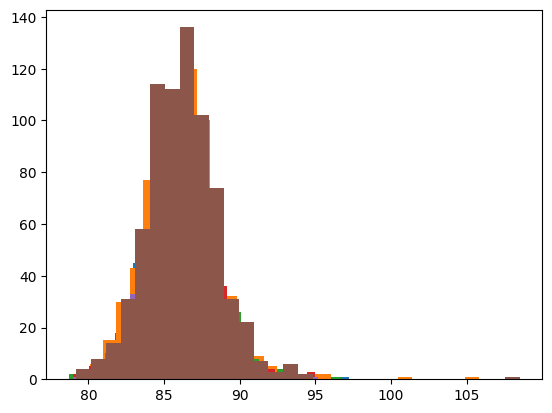

In [562]:
plt.hist(data_1000_1['경주기록(초)'],bins=30)
plt.hist(data_1000_2['경주기록(초)'],bins=30)
plt.hist(data_1000_3['경주기록(초)'],bins=30)
plt.hist(data_1000_4['경주기록(초)'],bins=30)
plt.hist(data_1000_5['경주기록(초)'],bins=30)
plt.hist(data_1000_6['경주기록(초)'],bins=30)


In [563]:
print(np.mean(data_1000_1['경주기록(초)']))
print(np.mean(data_1000_2['경주기록(초)']))
print(np.mean(data_1000_3['경주기록(초)']))
print(np.mean(data_1000_4['경주기록(초)']))
print(np.mean(data_1000_5['경주기록(초)']))
print(np.mean(data_1000_6['경주기록(초)']))
print(np.mean(data_1000_7['경주기록(초)']))
print(np.mean(data_1000_8['경주기록(초)']))


86.06698762035764
86.13282967032967
86.1884561891516
86.12607489597781
86.10331950207468
86.23655172413793
86.22044198895028
86.19667590027701


In [567]:
data_1000_2['경주기록(초)'].describe()

count    728.000000
mean      86.132830
std        2.538828
min       79.200000
25%       84.600000
50%       86.100000
75%       87.500000
max      105.800000
Name: 경주기록(초), dtype: float64

In [566]:
data_1000_4['경주기록(초)'].describe()

count    721.000000
mean      86.126075
std        2.276300
min       79.000000
25%       84.700000
50%       86.000000
75%       87.400000
max       95.000000
Name: 경주기록(초), dtype: float64

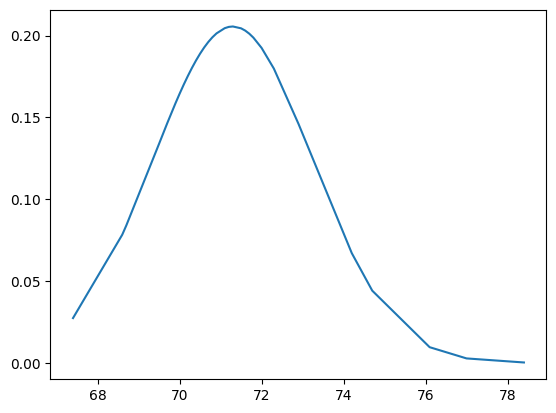

In [558]:
import scipy.stats as stats
data_out=data_1000_1['경주기록(초)']
data_mean=np.mean(data_out)
data_std=np.std(data_out)
pdf=stats.norm.pdf(np.sort(data_out),data_mean,data_std)

plt.figure()
plt.plot(np.sort(data_out),pdf)

C:\Users\wjswp\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjswp\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjswp\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjswp\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjswp\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO})

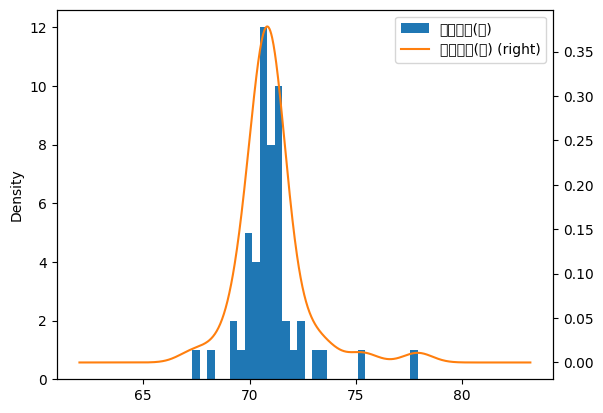

In [556]:
kde_data=data_1000_7['경주기록(초)'].reset_index(drop=True)
df=pd.DataFrame(kde_data)
ax=df.plot.hist(bins=30)
df.plot.kde(ax=ax,secondary_y=True)
plt.show()

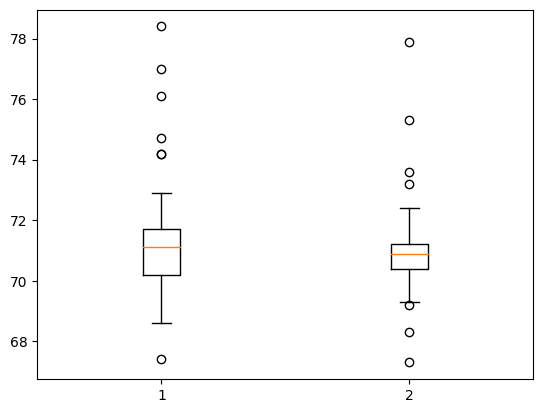

In [534]:
fix, ax=plt.subplots()
ax.boxplot([data_1000_1['경주기록(초)'],data_1000_7['경주기록(초)']])

plt.show()

In [568]:
data_1000_1

,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,마체중,주로상태_함수율,혈통,등급,레이팅,max_post,기온(°C),강수량(mm),풍속(m/s),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화,key,cluster
19,20230624,2,1000,10,1,6,1,89.0,54.5,24,7,2366,272,4,1,5.0,24,0.309091,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.211171,0.222222,0.250634,0.208723,0.117647,0.129032,0.228512,-0.007299,1,0
26,20230624,3,1000,7,1,6,1,86.6,57.0,7,27,9087,274,4,1,5.0,37,0.223529,27.9,0.0,4.8,56,0.0,46.2,20230624,26.275,0.173456,0.209459,0.218554,0.172414,0.100840,0.117647,0.200608,0.014815,2,0
110,20230623,5,1000,3,1,5,0,86.1,54.5,3,5,1841,284,8,1,5.0,39,0.406593,23.9,0.0,3.0,75,0.0,47.2,20230623,25.475,0.175676,0.171429,0.231939,0.245370,0.219178,0.133333,0.245642,-0.010453,11,0
177,20230617,3,1000,4,1,5,0,86.2,53.0,10,19,7231,292,4,1,5.0,21,0.529412,26.0,0.0,5.1,57,0.0,50.5,20230617,25.425,0.242391,0.243421,0.197760,0.182561,0.133333,0.133333,0.200311,-0.006803,18,0
189,20230617,4,1000,6,1,3,0,83.3,51.5,6,17,6512,287,4,1,4.0,43,0.377049,26.0,0.0,5.1,57,0.0,50.5,20230617,25.425,0.144030,0.170833,0.210074,0.236111,0.482759,0.482759,0.277518,0.000000,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28341,20190119,2,1000,11,1,5,1,84.7,53.0,13,29,12538,297,7,1,2.0,74,0.488372,10.5,0.0,1.7,71,0.0,10.5,20190119,7.175,0.163769,0.120000,0.201308,0.113703,0.240964,0.181818,0.221012,-0.003356,2833,0
28367,20190119,5,1000,5,1,4,0,88.8,53.0,9,13,5448,289,7,1,4.0,36,0.300971,10.5,0.0,1.7,71,0.0,10.5,20190119,7.175,0.247273,0.276029,0.245411,0.251685,0.149533,0.181818,0.256012,0.000000,2836,0
28427,20190118,2,1000,9,1,5,0,88.0,51.0,10,15,5820,291,7,1,4.0,32,0.384615,8.0,0.0,2.1,55,0.0,18.1,20190118,6.725,0.242391,0.243421,0.236254,0.216710,0.225564,0.181818,0.236726,0.013937,2842,0
28514,20190112,2,1000,5,1,5,0,87.1,57.0,7,19,7980,282,14,1,4.0,48,0.422680,8.5,0.5,3.1,75,0.0,11.8,20190112,8.825,0.175798,0.205882,0.233459,0.194226,0.162963,0.181818,0.240871,0.010753,2851,0


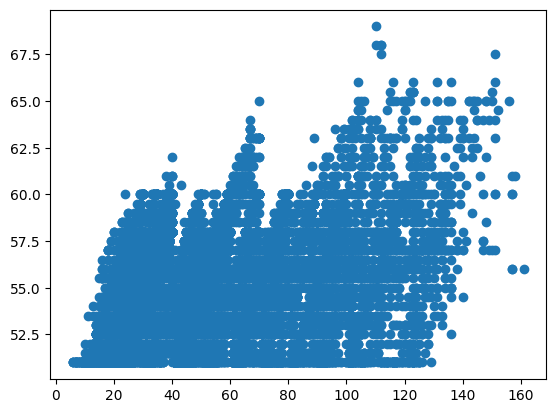

In [430]:
a=data[data['레이팅']!=0]
plt.scatter(a['레이팅'],a['부담중량'])

In [435]:
a[(a['레이팅']==69)&(a['부담중량']>=62.5)].head(40)

,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,주로상태_함수율,혈통,등급,레이팅,max_post,기온(°C),강수량(mm),풍속(m/s),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화,key
6617,20220715,4,1400,2,5,4,-1,98.8,63.0,6,27,12632,493,922,5,0,0,3,3,2,15.6,0.0,15.6,57.1,41.7,71.0,14.0,317,20,0,2.0,69,0.0,26.8,0.8,1.9,95,0.0,28.9,20220715,29.700,0.170375,0.164524,0.183265,0.148073,0.338462,0.296296,0.200651,-0.015528,656
7412,20220604,6,1400,10,9,12,1,104.5,63.0,12,19,7231,367,756,8,0,0,9,7,10,15.5,0.0,15.5,60.3,44.2,74.4,15.8,314,4,0,2.0,69,0.0,26.1,0.0,6.7,64,0.0,36.5,20220604,25.300,0.256319,0.262530,0.197760,0.182561,0.195745,0.181818,0.178571,0.039735,735
10219,20211225,5,1200,11,5,11,1,87.8,63.0,12,27,10781,350,830,11,0,0,12,12,12,15.8,0.0,0.0,44.0,43.8,57.9,15.4,302,7,0,2.0,69,0.0,2.1,0.0,7.2,69,0.0,4.2,20211225,8.825,0.256319,0.262530,0.196921,0.260000,0.195745,0.181818,0.232530,-0.032051,1021
23453,20190830,5,1200,2,3,3,-1,84.2,63.0,18,13,5448,445,1242,8,0,0,4,4,2,15.8,0.0,0.0,42.5,41.7,56.7,13.8,317,8,0,2.0,69,0.0,27.9,0.0,3.0,59,0.0,35.7,20190830,25.825,0.288581,0.283410,0.245411,0.251685,0.444444,0.181818,0.249597,-0.018576,2347


In [569]:
data_1000_first=data_1000[(data_1000['출주번호']==1)&(data_1000['cluster']==0)].reset_index(drop=True)
data_1000_first_test=data_1000_first[data_1000_first['경주일자']>=20220632]
data_1000_first_train=data_1000_first[data_1000_first['경주일자']<20220632]


In [570]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
scale_col=['기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','3시간신적설(cm)','지면온도(°C)','주로상태_함수율','avg_temp']
scaler=StandardScaler()
scaler.fit(data_1000_first[scale_col])
data_1000_scaled=scaler.transform(data_1000_first[scale_col])

data_1000_scaled=pd.DataFrame(data_1000_scaled,columns=scale_col)
non_scale_1000=data_1000_first.drop(columns=scale_col)

from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca.fit(data_1000_scaled)

df_pca=pca.transform(data_1000_scaled)
df_pca=pd.DataFrame(df_pca)
df_pca
print(sum(pca.explained_variance_ratio_))
a=pd.concat([non_scale_1000,df_pca],axis=1)


0.8301679762086617


In [572]:
a=a.drop(columns=['날짜'])
a=a.drop(columns=['출주번호'])
a=a.drop(columns=['경주거리'])
a=a[a['등급']!=0]

In [582]:
a=pd.get_dummies(data=a, columns=['마필성별','혈통','등급','cluster'])

KeyError: "['마필성별', '혈통', '등급'] not in index"

In [583]:
a

,경주일자,경주번호,착순,경주기록(초),max_post,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화,key,cluster,0,1,2,3,마필성별_-1,마필성별_0,마필성별_1,혈통_1,등급_1.0,등급_2.0,등급_3.0,등급_4.0,등급_5.0,마필연령,기수경력(년),부담중량,조교사경력(년),조교사통산출전횟수,마체중,레이팅
0,20230624,2,10,89.0,0.309091,0.211171,0.222222,0.250634,0.208723,0.117647,0.129032,0.228512,-0.007299,1,0,-2.301489,-0.772797,0.618264,0.312063,0,0,1,1,0,0,0,0,1,0.671822,1.025827,-0.146272,-1.511072,-1.520773,-0.366783,-0.814073
1,20230624,3,7,86.6,0.223529,0.173456,0.209459,0.218554,0.172414,0.100840,0.117647,0.200608,0.014815,2,0,-2.301489,-0.772797,0.618264,0.312063,0,0,1,1,0,0,0,0,1,0.671822,-0.909776,0.836536,0.783788,0.265157,-0.271974,-0.188459
2,20230623,5,3,86.1,0.406593,0.175676,0.171429,0.231939,0.245370,0.219178,0.133333,0.245642,-0.010453,11,0,-1.944857,0.319573,-0.633355,0.196943,0,1,0,1,0,0,0,0,1,0.031698,-1.365212,-0.146272,-1.740558,-1.660278,0.202073,-0.092210
3,20230617,3,4,86.2,0.529412,0.242391,0.243421,0.197760,0.182561,0.133333,0.133333,0.200311,-0.006803,18,0,-2.317893,-0.792191,0.792672,0.311391,0,1,0,1,0,0,0,0,1,0.031698,-0.568199,-0.735957,-0.134156,-0.228026,0.581311,-0.958446
4,20230617,4,6,83.3,0.377049,0.144030,0.170833,0.210074,0.236111,0.482759,0.482759,0.277518,0.000000,19,0,-2.317893,-0.792191,0.792672,0.311391,0,1,0,1,0,0,0,1,0,-1.248549,-1.023635,-1.325642,-0.363642,-0.419082,0.344287,0.100286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,20190119,2,11,84.7,0.488372,0.163769,0.120000,0.201308,0.113703,0.240964,0.181818,0.221012,-0.003356,2833,0,2.076319,-0.439628,-1.673323,-0.070732,0,0,1,1,0,1,0,0,0,0.031698,-0.226622,-0.735957,1.013274,1.182171,0.818334,1.592136
723,20190119,5,5,88.8,0.300971,0.247273,0.276029,0.245411,0.251685,0.149533,0.181818,0.256012,0.000000,2836,0,2.076319,-0.439628,-1.673323,-0.070732,0,1,0,1,0,0,0,1,0,-0.608426,-0.682058,-0.735957,-0.822614,-0.701812,0.439097,-0.236583
724,20190118,2,9,88.0,0.384615,0.242391,0.243421,0.236254,0.216710,0.225564,0.181818,0.236726,0.013937,2842,0,2.004718,-1.212435,-1.292232,0.073182,0,1,0,1,0,0,0,1,0,0.031698,-0.568199,-1.522204,-0.593128,-0.602963,0.533906,-0.429080
725,20190112,2,5,87.1,0.422680,0.175798,0.205882,0.233459,0.194226,0.162963,0.181818,0.240871,0.010753,2851,0,2.402025,0.862505,-0.786035,-0.384953,0,1,0,1,0,0,0,1,0,0.031698,-0.909776,0.836536,-0.134156,-0.028999,0.107264,0.340907


In [577]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
scale_col=['마필연령','기수경력(년)','부담중량','조교사경력(년)','조교사통산출전횟수','마체중','레이팅']
scaler=StandardScaler()
scaler.fit(a[scale_col])
data_1000_scaled=scaler.transform(a[scale_col])

data_1000_scaled=pd.DataFrame(data_1000_scaled,columns=scale_col)
non_scale_1000=a.drop(columns=scale_col)

In [580]:
a=pd.concat([non_scale_1000,data_1000_scaled],axis=1)

In [587]:
a=pd.get_dummies(data=a, columns=['cluster'])

In [593]:
a

,경주일자,경주번호,착순,경주기록(초),max_post,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화,key,0,1,2,3,마필성별_-1,마필성별_0,마필성별_1,혈통_1,등급_1.0,등급_2.0,등급_3.0,등급_4.0,등급_5.0,마필연령,기수경력(년),부담중량,조교사경력(년),조교사통산출전횟수,마체중,레이팅,cluster_0
0,20230624,2,10,89.0,0.309091,0.211171,0.222222,0.250634,0.208723,0.117647,0.129032,0.228512,-0.007299,1,-2.301489,-0.772797,0.618264,0.312063,0,0,1,1,0,0,0,0,1,0.671822,1.025827,-0.146272,-1.511072,-1.520773,-0.366783,-0.814073,1
1,20230624,3,7,86.6,0.223529,0.173456,0.209459,0.218554,0.172414,0.100840,0.117647,0.200608,0.014815,2,-2.301489,-0.772797,0.618264,0.312063,0,0,1,1,0,0,0,0,1,0.671822,-0.909776,0.836536,0.783788,0.265157,-0.271974,-0.188459,1
2,20230623,5,3,86.1,0.406593,0.175676,0.171429,0.231939,0.245370,0.219178,0.133333,0.245642,-0.010453,11,-1.944857,0.319573,-0.633355,0.196943,0,1,0,1,0,0,0,0,1,0.031698,-1.365212,-0.146272,-1.740558,-1.660278,0.202073,-0.092210,1
3,20230617,3,4,86.2,0.529412,0.242391,0.243421,0.197760,0.182561,0.133333,0.133333,0.200311,-0.006803,18,-2.317893,-0.792191,0.792672,0.311391,0,1,0,1,0,0,0,0,1,0.031698,-0.568199,-0.735957,-0.134156,-0.228026,0.581311,-0.958446,1
4,20230617,4,6,83.3,0.377049,0.144030,0.170833,0.210074,0.236111,0.482759,0.482759,0.277518,0.000000,19,-2.317893,-0.792191,0.792672,0.311391,0,1,0,1,0,0,0,1,0,-1.248549,-1.023635,-1.325642,-0.363642,-0.419082,0.344287,0.100286,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,20190119,2,11,84.7,0.488372,0.163769,0.120000,0.201308,0.113703,0.240964,0.181818,0.221012,-0.003356,2833,2.076319,-0.439628,-1.673323,-0.070732,0,0,1,1,0,1,0,0,0,0.031698,-0.226622,-0.735957,1.013274,1.182171,0.818334,1.592136,1
723,20190119,5,5,88.8,0.300971,0.247273,0.276029,0.245411,0.251685,0.149533,0.181818,0.256012,0.000000,2836,2.076319,-0.439628,-1.673323,-0.070732,0,1,0,1,0,0,0,1,0,-0.608426,-0.682058,-0.735957,-0.822614,-0.701812,0.439097,-0.236583,1
724,20190118,2,9,88.0,0.384615,0.242391,0.243421,0.236254,0.216710,0.225564,0.181818,0.236726,0.013937,2842,2.004718,-1.212435,-1.292232,0.073182,0,1,0,1,0,0,0,1,0,0.031698,-0.568199,-1.522204,-0.593128,-0.602963,0.533906,-0.429080,1
725,20190112,2,5,87.1,0.422680,0.175798,0.205882,0.233459,0.194226,0.162963,0.181818,0.240871,0.010753,2851,2.402025,0.862505,-0.786035,-0.384953,0,1,0,1,0,0,0,1,0,0.031698,-0.909776,0.836536,-0.134156,-0.028999,0.107264,0.340907,1


In [590]:
a_test=a[(a['경주일자']>=20220632)].reset_index(drop=True)
a_train=a[(a['경주일자']<20220632)].reset_index(drop=True)

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
X_train = a_train.drop(['착순','경주번호','경주일자',"경주기록(초)","key"], axis=1)
X_test = a_test.drop(['착순','경주번호','경주일자',"경주기록(초)","key"], axis=1) 
y_train = a_train["경주기록(초)"]
y_test = a_test["경주기록(초)"]

params = {
    'max_depth':5,
    'reg_lambda':1,
    'learning_rate': 0.1,
    'n_estimators': 100
}
xgb_reg = XGBRegressor(params = params)
xgb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test)
np.mean(np.abs(y_pred-y_test))

[03:06:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "params" } are not used.



1.497603398510534

In [591]:
y_pred

array([86.74798 , 87.10246 , 87.15729 , 86.68363 , 84.009026, 88.00964 ,
       86.70977 , 87.110344, 85.598816, 83.67282 , 90.29721 , 88.80044 ,
       84.57624 , 84.97844 , 87.41291 , 88.27302 , 85.02289 , 87.06761 ,
       86.164444, 88.87031 , 83.47018 , 87.53775 , 85.730385, 84.98015 ,
       87.0633  , 88.34265 , 88.10375 , 85.09891 , 84.58815 , 88.320045,
       86.28361 , 86.978775, 85.86819 , 85.905106, 87.145134, 87.22427 ,
       88.476616, 85.071724, 84.659035, 83.27538 , 89.720116, 87.6476  ,
       84.75594 , 86.89509 , 84.658936, 84.49806 , 88.28064 , 86.6967  ,
       85.022285, 86.98793 , 85.702446, 87.69009 , 84.61014 , 86.72416 ,
       83.32515 , 87.925735, 85.46407 , 86.87546 , 86.61232 , 86.92493 ,
       84.353874, 87.944275, 85.87203 , 87.23556 , 87.41599 , 87.129974,
       85.51628 , 87.316315, 87.81418 , 83.561935, 83.70621 , 87.12859 ,
       88.00252 , 89.38227 , 86.67574 , 85.78172 , 88.47626 , 87.934074,
       89.69152 , 85.511734, 86.05929 , 86.60287 , 

In [592]:
y_test

0      89.0
1      86.6
2      86.1
3      86.2
4      83.3
       ... 
229    82.9
230    85.4
231    84.8
232    84.4
233    84.1
Name: 경주기록(초), Length: 234, dtype: float64

In [466]:
scale_col=['마필연령','부담중량','기수경력(년)','조교사경력(년)','조교사통산출전횟수','마체중','혈통','등급','레이팅','max_post','기수통산승률','기수최근승률','조교사통산승률','조교사최근승률','말통산승률','말최근승률','조교사위탁승률','체중변화']
scaler=StandardScaler()
scaler.fit(a[scale_col])
data_1000_scaled=scaler.transform(a[scale_col])

data_1000_scaled=pd.DataFrame(data_1000_scaled,columns=scale_col)
non_scale_1000=a.drop(columns=scale_col)
a=pd.concat([non_scale_1000,data_1000_scaled],axis=1)
a

,경주일자,경주번호,마필성별,경주기록(초),key,cluster,0,1,2,3,마필연령,부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,마체중,혈통,등급,레이팅,max_post,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화
0,20230624,2,1,89.0,1,0,-2.301489,-0.772797,0.618264,0.312063,0.671822,-0.146272,1.025827,-1.511072,-1.520773,-0.366783,0.0,0.999803,-0.814073,-0.151118,0.014795,0.506420,0.974593,0.292496,-1.079351,-0.606349,0.059498,-0.302717
1,20230624,3,1,86.6,2,0,-2.301489,-0.772797,0.618264,0.312063,0.671822,0.836536,-0.909776,0.783788,0.265157,-0.271974,0.0,0.999803,-0.188459,-0.636077,-0.743924,0.341145,-0.021670,-0.423592,-1.251284,-0.753760,-0.579923,0.791379
2,20230623,5,0,86.1,11,0,-1.944857,0.319573,-0.633355,0.196943,0.031698,-0.146272,-1.365212,-1.740558,-1.660278,0.202073,0.0,0.999803,-0.092210,0.401523,-0.699270,-0.151347,0.394014,1.015263,-0.040688,-0.550661,0.452045,-0.458746
3,20230617,3,0,86.2,18,0,-2.317893,-0.792191,0.792672,0.311391,0.031698,-0.735957,-0.568199,-0.134156,-0.228026,0.581311,0.0,0.999803,-0.958446,1.097652,0.642830,0.780941,-0.667450,-0.223462,-0.918881,-0.550661,-0.586736,-0.278150
4,20230617,4,0,83.3,19,0,-2.317893,-0.792191,0.792672,0.311391,-1.248549,-1.325642,-1.023635,-0.363642,-0.419082,0.344287,0.0,-0.158289,0.100286,0.234067,-1.335887,-0.159055,-0.285030,0.832651,2.655742,3.973545,1.182487,0.058415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,20190119,2,1,84.7,2833,0,2.076319,-0.439628,-1.673323,-0.070732,0.031698,-0.735957,-0.226622,1.013274,1.182171,0.818334,0.0,-2.474472,1.592136,0.865041,-0.938797,-0.817337,-0.557253,-1.581499,0.182180,0.077100,-0.112364,-0.107608
723,20190119,5,0,88.8,2836,0,2.076319,-0.439628,-1.673323,-0.070732,-0.608426,-0.735957,-0.682058,-0.822614,-0.701812,0.439097,0.0,-0.158289,-0.236583,-0.197142,0.741041,1.203208,0.812395,1.139808,-0.753161,0.077100,0.689690,0.058415
724,20190118,2,0,88.0,2842,0,2.004718,-1.212435,-1.292232,0.073182,0.031698,-1.522204,-0.568199,-0.593128,-0.602963,0.533906,0.0,-0.158289,-0.429080,0.276952,0.642830,0.780941,0.528023,0.450025,0.024639,0.077100,0.247728,0.747963
725,20190112,2,0,87.1,2851,0,2.402025,0.862505,-0.786035,-0.384953,0.031698,0.836536,-0.909776,-0.134156,-0.028999,0.107264,0.0,-0.158289,0.340907,0.492703,-0.696815,0.294822,0.441203,0.006584,-0.615769,0.077100,0.342725,0.590405


In [471]:
a_test=a[(a['경주일자']>=20220632)&(a['cluster']==0)].reset_index(drop=True)
a_train=a[(a['경주일자']<20220632)&(a['cluster']==0)].reset_index(drop=True)
a_test

,경주일자,경주번호,마필성별,경주기록(초),key,cluster,0,1,2,3,마필연령,부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,마체중,혈통,등급,레이팅,max_post,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화
0,20230624,2,1,89.0,1,0,-2.301489,-0.772797,0.618264,0.312063,0.671822,-0.146272,1.025827,-1.511072,-1.520773,-0.366783,0.0,0.999803,-0.814073,-0.151118,0.014795,0.506420,0.974593,0.292496,-1.079351,-0.606349,0.059498,-0.302717
1,20230624,3,1,86.6,2,0,-2.301489,-0.772797,0.618264,0.312063,0.671822,0.836536,-0.909776,0.783788,0.265157,-0.271974,0.0,0.999803,-0.188459,-0.636077,-0.743924,0.341145,-0.021670,-0.423592,-1.251284,-0.753760,-0.579923,0.791379
2,20230623,5,0,86.1,11,0,-1.944857,0.319573,-0.633355,0.196943,0.031698,-0.146272,-1.365212,-1.740558,-1.660278,0.202073,0.0,0.999803,-0.092210,0.401523,-0.699270,-0.151347,0.394014,1.015263,-0.040688,-0.550661,0.452045,-0.458746
3,20230617,3,0,86.2,18,0,-2.317893,-0.792191,0.792672,0.311391,0.031698,-0.735957,-0.568199,-0.134156,-0.228026,0.581311,0.0,0.999803,-0.958446,1.097652,0.642830,0.780941,-0.667450,-0.223462,-0.918881,-0.550661,-0.586736,-0.278150
4,20230617,4,0,83.3,19,0,-2.317893,-0.792191,0.792672,0.311391,-1.248549,-1.325642,-1.023635,-0.363642,-0.419082,0.344287,0.0,-0.158289,0.100286,0.234067,-1.335887,-0.159055,-0.285030,0.832651,2.655742,3.973545,1.182487,0.058415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,20220702,5,1,82.9,678,0,-2.328930,0.555565,1.424861,-0.040162,0.671822,-0.342834,-0.682058,0.439559,0.132827,-1.646710,0.0,-0.158289,0.292783,0.166223,0.273596,1.130604,-1.027424,-1.061325,-0.751860,-0.057420,-1.298094,-1.315892
230,20220701,3,1,85.4,682,0,-2.881042,-0.071164,-0.077643,0.306475,-1.248549,0.639974,-0.340481,0.783788,0.715294,0.486501,0.0,0.999803,-0.332831,0.849976,0.923021,1.028396,-0.693510,1.303790,1.634993,2.370841,1.104995,-0.111602
231,20220701,4,0,84.8,683,0,-2.881042,-0.071164,-0.077643,0.306475,1.311945,0.836536,-1.023635,-1.855301,-1.812538,0.960548,0.0,0.999803,-0.140335,-0.077757,1.300551,1.454764,0.367101,0.398241,-0.898369,-1.072578,0.213421,0.058415
232,20220701,6,0,84.4,685,0,-2.881042,-0.071164,-0.077643,0.306475,1.952069,0.639974,-0.568199,-0.363642,-0.419082,1.766428,0.0,-0.158289,0.533404,0.723583,0.642830,0.780941,-0.285030,0.832651,-0.382225,-0.550661,0.400770,0.214982


In [476]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
X_train = a_train.drop(['경주번호','경주일자',"경주기록(초)","key"], axis=1)
X_test = a_test.drop(['경주번호','경주일자',"경주기록(초)","key"], axis=1) 
y_train = a_train["경주기록(초)"]
y_test = a_test["경주기록(초)"]

params = {
    'max_depth':5,
    'reg_lambda':1,
    'learning_rate': 0.1,
    'n_estimators': 100
}
xgb_reg = XGBRegressor(params = params)
xgb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test)
np.mean(np.abs(y_pred-y_test))


[02:03:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "params" } are not used.



1.440453801603399

In [477]:
y_test.head(30)

0     89.0
1     86.6
2     86.1
3     86.2
4     83.3
5     86.4
6     85.6
7     86.0
8     85.5
9     82.4
10    86.4
11    86.4
12    86.1
13    83.3
14    86.7
15    85.1
16    83.4
17    86.9
18    86.8
19    87.3
20    83.0
21    86.0
22    85.9
23    88.3
24    86.7
25    86.9
26    86.8
27    83.2
28    83.0
29    85.5
Name: 경주기록(초), dtype: float64

In [478]:
y_pred

array([87.95285 , 87.0623  , 86.92463 , 86.864426, 85.24718 , 87.048096,
       86.62444 , 86.849205, 85.251854, 84.73877 , 91.2406  , 87.659294,
       84.78045 , 84.29482 , 89.11619 , 88.00584 , 84.60721 , 85.65138 ,
       86.171326, 89.81616 , 82.07652 , 87.64195 , 84.711914, 85.57193 ,
       87.13267 , 87.647224, 86.94731 , 85.80946 , 83.30045 , 88.05365 ,
       84.961624, 87.48251 , 87.28943 , 85.06444 , 86.96842 , 85.68701 ,
       87.606544, 85.15134 , 83.026   , 82.40651 , 88.97621 , 87.076866,
       84.592735, 86.979805, 86.17138 , 83.55265 , 87.50345 , 87.02374 ,
       86.04918 , 87.01117 , 85.3601  , 87.76686 , 84.79699 , 86.99106 ,
       83.94304 , 88.59047 , 84.19585 , 87.161   , 88.3876  , 86.93178 ,
       84.57898 , 86.645874, 85.429245, 87.04925 , 87.23891 , 86.42181 ,
       86.14018 , 87.18201 , 86.89114 , 86.16115 , 84.07366 , 87.334366,
       87.99167 , 88.98389 , 86.304214, 86.26397 , 88.00125 , 88.537025,
       89.45772 , 86.64555 , 86.47276 , 85.98024 , 

In [337]:
data_1000
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
scale_col=['기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','3시간신적설(cm)','지면온도(°C)','주로상태_함수율']
scaler=StandardScaler()
scaler.fit(data_1000[scale_col])
data_1000_scaled=scaler.transform(data_1000[scale_col])

data_1000_scaled=pd.DataFrame(data_1000_scaled,columns=scale_col)
non_scale_1000=data_1000.drop(columns=scale_col)


In [347]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca.fit(data_1000_scaled)

df_pca=pca.transform(data_1000_scaled)
df_pca=pd.DataFrame(df_pca)
df_pca
print(sum(pca.explained_variance_ratio_))
a=pd.concat([non_scale_1000,df_pca],axis=1)

0.8190201175981063


In [382]:
a_test=a[(a['경주일자']>=20220632)&(a['cluster']==1)].reset_index(drop=True)
a_train=a[(a['경주일자']<20220632)&(a['cluster']==1)].reset_index(drop=True)

# data_test=data[data['경주일자']>=20220632]
# data_train=data[data['경주일자']<20220632]

In [383]:
a_train

,경주일자,경주번호,경주거리,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,마체중,혈통,등급,레이팅,max_post,날짜,avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화,key,cluster,0,1,2,3
0,20220624,2,1000,5,5,0,69.9,54.0,6,32,13727,331,0,3.0,0,0.0,20220624,26.350,0.144030,0.170833,0.171560,0.166667,0.228571,0.173913,0.182747,0.000000,696,1,1.126078,2.685097,0.379859,-0.663547
1,20220624,2,1000,4,5,1,70.0,57.0,6,12,4705,299,0,3.0,34,0.0,20220624,26.350,0.275086,0.295455,0.286079,0.265306,0.119403,0.074074,0.350694,0.052817,696,1,1.126078,2.685097,0.379859,-0.663547
2,20220624,2,1000,8,3,1,70.0,57.5,27,4,1268,310,0,3.0,0,0.0,20220624,26.350,0.205697,0.138686,0.231073,0.214085,0.325581,0.275862,0.235023,-0.006410,696,1,1.126078,2.685097,0.379859,-0.663547
3,20220624,2,1000,9,3,1,70.1,53.0,6,27,12632,307,0,3.0,26,0.0,20220624,26.350,0.170375,0.164524,0.183265,0.148073,0.114286,0.086957,0.201448,-0.019169,696,1,1.126078,2.685097,0.379859,-0.663547
4,20220624,2,1000,3,3,1,70.6,55.0,18,21,7375,274,0,3.0,30,0.0,20220624,26.350,0.177685,0.060241,0.205966,0.112150,0.040816,0.074074,0.196581,0.003663,696,1,1.126078,2.685097,0.379859,-0.663547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,20190112,8,1000,2,3,1,70.5,54.5,20,5,1841,297,0,4.0,0,0.0,20190112,8.825,0.233681,0.000000,0.231939,0.245370,0.258065,0.181818,0.219731,0.010204,2857,1,1.977075,-0.015073,-0.804533,-0.456747
398,20190112,8,1000,3,4,1,70.6,55.5,31,32,13727,270,0,4.0,0,0.0,20190112,8.825,0.227930,0.171674,0.171560,0.166667,0.156863,0.181818,0.167478,-0.010989,2857,1,1.977075,-0.015073,-0.804533,-0.456747
399,20190112,8,1000,6,3,-1,70.8,51.0,7,23,10543,303,0,4.0,0,0.0,20190112,8.825,0.113320,0.117021,0.244238,0.240196,0.173913,0.181818,0.189147,-0.003289,2857,1,1.977075,-0.015073,-0.804533,-0.456747
400,20190112,8,1000,7,3,-1,71.3,54.0,24,21,7375,309,0,4.0,0,0.0,20190112,8.825,0.211171,0.222222,0.205966,0.112150,0.251969,0.095238,0.234127,0.006515,2857,1,1.977075,-0.015073,-0.804533,-0.456747


In [384]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
X_train = a_train.drop(["경주기록(초)","key"], axis=1)
X_test = a_test.drop(["경주기록(초)","key"], axis=1) 
y_train = a_train["경주기록(초)"]
y_test = a_test["경주기록(초)"]

params = {
    'max_depth':5,
    'reg_lambda':1,
    'learning_rate': 0.1,
    'n_estimators': 100
}
xgb_reg = XGBRegressor(params = params)
xgb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test)


pred_key = pd.concat([a_test["key"], pd.DataFrame(y_pred)], axis=1)
pred_key.columns=["key",	"y_pred"]

true_key = pd.concat([a_test["key"], pd.DataFrame(y_test)], axis=1)
true_key.columns=["key",	"y_test"]

pred_key["in5"] = 0
for i in pred_key["key"].unique():
    index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
    pred_key.loc[index,"in5"]=1

true_key["in3"] = 0
for i in true_key["key"].unique():
    index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
    true_key.loc[index,"in3"]=1

count = 0
for key in true_key["key"].unique():
    num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
    if num==3:
        count+=1

count/len(true_key["key"].unique())

[00:43:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "params" } are not used.



0.3076923076923077

In [385]:
pred_key.head(50)

,key,y_pred,in5
0,368,70.250290,1
1,368,72.395836,0
2,368,71.904144,0
3,368,71.435913,1
4,368,71.512039,1
5,368,71.542648,1
6,368,71.249176,1
7,388,70.581261,1
8,388,72.274193,1
9,388,72.711525,1


In [164]:
nankey=np.unique(data_1200[data_1200['등급'].isna()]['key'])
a=data_1200
for i in range(len(nankey)):
    a=a[a['key']!=nankey[i]]

data_test_1200=data_test[data_test['경주거리']==1200]

from sklearn.cluster import KMeans
k=2
model=KMeans(n_clusters=k,random_state=10)
model.fit(a[['경주기록(초)']])
data_1200['cluster']=model.predict(data_1200[['경주기록(초)']])
data_test_1200['cluster']=model.predict(data_test_1200[['경주기록(초)']])

data_test_1200=data_test_1200.drop(columns=['착순','조교사최근1년간출전횟수','조교사위탁경주마출전횟수','서울,제주S1F구간통과순위(서울,제주공통)','서울,제주1코너구간통과순위(서울,제주공통)','서울,제주2코너구간통과순위(서울,제주공통)','서울,제주3코너구간통과순위(서울,제주공통)','서울,제주4코너구간통과순위(서울,제주공통)','서울,제주G1F구간통과순위(서울,제주공통)','제주S-1F통과기록','제주1코너통과기록','제주2코너통과기록','제주3코너통과기록','제주G-3F통과기록','제주4코너통과기록','제주G-1F통과기록'])
data_1200=data_1200.drop(columns=['착순','조교사최근1년간출전횟수','조교사위탁경주마출전횟수','서울,제주S1F구간통과순위(서울,제주공통)','서울,제주1코너구간통과순위(서울,제주공통)','서울,제주2코너구간통과순위(서울,제주공통)','서울,제주3코너구간통과순위(서울,제주공통)','서울,제주4코너구간통과순위(서울,제주공통)','서울,제주G1F구간통과순위(서울,제주공통)','제주S-1F통과기록','제주1코너통과기록','제주2코너통과기록','제주3코너통과기록','제주G-3F통과기록','제주4코너통과기록','제주G-1F통과기록'])

C:\Users\wjswp\AppData\Local\Temp\ipykernel_21312\3898882215.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1200['cluster']=model.predict(data_1200[['경주기록(초)']])
C:\Users\wjswp\AppData\Local\Temp\ipykernel_21312\3898882215.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_1200['cluster']=model.predict(data_test_1200[['경주기록(초)']])


,경주번호,경주거리,착순,출주번호,마필연령,마필성별,부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,주로상태_함수율,혈통,레이팅,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화
6939,1,800,1,5,3,1,56.0,13,27,12632,493,829,1,0,0,1,1,1,18.1,0.0,0.0,18.1,48.8,33.7,17.4,264,10,1,0,0.223529,31.2,0.0,3.7,140,62,0.0,35.0,27.425,0.163769,0.120000,0.183265,0.148073,0.258065,0.086957,0.201448,-0.003774
6940,1,800,2,4,3,-1,55.0,24,7,2366,321,754,5,0,0,5,4,2,18.7,0.0,0.0,18.7,48.3,34.4,16.8,248,10,1,0,0.406593,31.2,0.0,3.7,140,62,0.0,35.0,27.425,0.264384,0.177885,0.250634,0.208723,0.206897,0.190476,0.245358,-0.019763
6941,1,800,3,7,3,-1,55.0,18,4,1268,355,868,9,0,0,9,7,5,19.0,0.0,0.0,19.0,48.9,34.9,16.9,268,10,1,0,0.565217,31.2,0.0,3.7,140,62,0.0,35.0,27.425,0.288581,0.283410,0.231073,0.214085,0.102564,0.129032,0.235023,-0.025455
6942,1,800,4,10,3,1,54.0,6,12,4705,343,864,6,0,0,6,6,6,18.7,0.0,0.0,18.7,49.3,34.7,16.9,293,10,1,0,0.567568,31.2,0.0,3.7,140,62,0.0,35.0,27.425,0.275086,0.295455,0.286079,0.265306,0.243902,0.270270,0.350694,-0.029801
6943,1,800,5,8,4,0,56.0,10,27,12632,493,829,10,0,0,10,10,9,19.3,0.0,0.0,19.3,49.6,35.5,17.2,263,10,1,0,0.402985,31.2,0.0,3.7,140,62,0.0,35.0,27.425,0.242391,0.243421,0.183265,0.148073,0.051282,0.105263,0.201448,-0.022305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,9,900,6,8,3,1,54.5,10,19,7980,381,1561,2,0,0,2,2,3,14.7,0.0,0.0,21.4,42.7,34.9,15.0,308,8,0,0,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,7.875,0.167857,0.000000,0.233459,0.194226,0.292683,0.181818,0.240871,0.016502
28679,9,900,7,3,4,1,57.0,18,17,6512,432,1151,4,0,0,4,4,4,15.2,0.0,0.0,21.9,42.3,35.2,14.9,311,8,0,0,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,7.875,0.288581,0.283410,0.210074,0.236111,0.074074,0.181818,0.212858,-0.006390
28680,9,900,8,1,3,1,53.0,26,27,10781,350,1174,8,0,0,6,6,10,15.6,0.0,0.0,22.3,42.2,35.6,14.8,282,8,0,0,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,7.875,0.191764,0.000000,0.196921,0.260000,0.204082,0.181818,0.183986,-0.013986
28681,9,900,9,4,4,1,54.0,31,32,13727,360,1027,9,0,0,9,8,9,15.7,0.0,0.0,22.5,42.1,35.9,14.9,316,8,0,0,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,7.875,0.227930,0.171674,0.171560,0.166667,0.095238,0.181818,0.167478,0.012821


In [219]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
X_train = data.drop(["경주기록(초)","key",'등급','경주일자','날짜'], axis=1)
X_test = data_test.drop(["경주기록(초)","key",'등급','경주일자','날짜'], axis=1) 
y_train = data["경주기록(초)"]
y_test = data_test["경주기록(초)"]

params = {
    'max_depth':5,
    'reg_lambda':1,
    'learning_rate': 0.1,
    'n_estimators': 100
}
xgb_reg = XGBRegressor(max_depth=5,reg_lambda=1,learning_rate=0.1,n_estimators=100)
xgb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test)


pred_key = pd.concat([data_test["key"], pd.DataFrame(y_pred)], axis=1)
pred_key.columns=["key",	"y_pred"]

true_key = pd.concat([data_test["key"], pd.DataFrame(y_test)], axis=1)
true_key.columns=["key",	"y_test"]

pred_key["in5"] = 0
for i in pred_key["key"].unique():
    index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
    pred_key.loc[index,"in5"]=1

true_key["in3"] = 0
for i in true_key["key"].unique():
    index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
    true_key.loc[index,"in3"]=1

count = 0
for key in true_key["key"].unique():
    num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
    print(key)
    if num==3:
        count+=1
        # print(count)
count/len(true_key["key"].unique())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

0.9593023255813954

In [220]:
X_train

,경주번호,경주거리,착순,출주번호,마필연령,마필성별,부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,주로상태_함수율,혈통,레이팅,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화
6939,1,800,1,5,3,1,56.0,13,27,12632,493,829,1,0,0,1,1,1,18.1,0.0,0.0,18.1,48.8,33.7,17.4,264,10,1,0,0.223529,31.2,0.0,3.7,140,62,0.0,35.0,27.425,0.163769,0.120000,0.183265,0.148073,0.258065,0.086957,0.201448,-0.003774
6940,1,800,2,4,3,-1,55.0,24,7,2366,321,754,5,0,0,5,4,2,18.7,0.0,0.0,18.7,48.3,34.4,16.8,248,10,1,0,0.406593,31.2,0.0,3.7,140,62,0.0,35.0,27.425,0.264384,0.177885,0.250634,0.208723,0.206897,0.190476,0.245358,-0.019763
6941,1,800,3,7,3,-1,55.0,18,4,1268,355,868,9,0,0,9,7,5,19.0,0.0,0.0,19.0,48.9,34.9,16.9,268,10,1,0,0.565217,31.2,0.0,3.7,140,62,0.0,35.0,27.425,0.288581,0.283410,0.231073,0.214085,0.102564,0.129032,0.235023,-0.025455
6942,1,800,4,10,3,1,54.0,6,12,4705,343,864,6,0,0,6,6,6,18.7,0.0,0.0,18.7,49.3,34.7,16.9,293,10,1,0,0.567568,31.2,0.0,3.7,140,62,0.0,35.0,27.425,0.275086,0.295455,0.286079,0.265306,0.243902,0.270270,0.350694,-0.029801
6943,1,800,5,8,4,0,56.0,10,27,12632,493,829,10,0,0,10,10,9,19.3,0.0,0.0,19.3,49.6,35.5,17.2,263,10,1,0,0.402985,31.2,0.0,3.7,140,62,0.0,35.0,27.425,0.242391,0.243421,0.183265,0.148073,0.051282,0.105263,0.201448,-0.022305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,9,900,6,8,3,1,54.5,10,19,7980,381,1561,2,0,0,2,2,3,14.7,0.0,0.0,21.4,42.7,34.9,15.0,308,8,0,0,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,7.875,0.167857,0.000000,0.233459,0.194226,0.292683,0.181818,0.240871,0.016502
28679,9,900,7,3,4,1,57.0,18,17,6512,432,1151,4,0,0,4,4,4,15.2,0.0,0.0,21.9,42.3,35.2,14.9,311,8,0,0,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,7.875,0.288581,0.283410,0.210074,0.236111,0.074074,0.181818,0.212858,-0.006390
28680,9,900,8,1,3,1,53.0,26,27,10781,350,1174,8,0,0,6,6,10,15.6,0.0,0.0,22.3,42.2,35.6,14.8,282,8,0,0,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,7.875,0.191764,0.000000,0.196921,0.260000,0.204082,0.181818,0.183986,-0.013986
28681,9,900,9,4,4,1,54.0,31,32,13727,360,1027,9,0,0,9,8,9,15.7,0.0,0.0,22.5,42.1,35.9,14.9,316,8,0,0,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,7.875,0.227930,0.171674,0.171560,0.166667,0.095238,0.181818,0.167478,0.012821


In [182]:
pred_key["key"].unique()

array([ 15.,  22.,  30.,  31.,  47.,  53.,  54.,  76.,  82.,  90., 103.,
       109., 110., 129., 143., 150., 170., 184., 191., 198., 204., 219.,
       226., 232., 233., 253., 259., 267., 273., 295., 301., 309., 329.,
       337., 344., 350., 378., 379., 386., 404., 414., 434., 441., 465.,
       495., 503., 510., 525., 555., 561., 568., 593., 605., 616., 638.,
       664., 679.,  nan])

In [176]:
data_test_1200

,경주일자,경주번호,경주거리,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,마체중,주로상태_함수율,혈통,등급,레이팅,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화,key,cluster
146,20230623,9,1200,5,3,1,104.8,55.0,10,23,10543,283,6,1,2.0,91,0.000000,23.9,0.0,3.0,50,75,0.0,47.2,20230623,25.475,0.242391,0.243421,0.244238,0.240196,0.666667,0.666667,0.269646,-0.020761,15,0
147,20230623,9,1200,4,5,0,104.8,52.5,13,5,1841,296,6,1,2.0,86,0.555556,23.9,0.0,3.0,50,75,0.0,47.2,20230623,25.475,0.193023,0.139303,0.231939,0.245370,0.337349,0.243902,0.245642,-0.006711,15,0
148,20230623,9,1200,3,8,0,105.0,51.0,3,27,10781,264,6,1,2.0,0,0.000000,23.9,0.0,3.0,50,75,0.0,47.2,20230623,25.475,0.199170,0.211538,0.196921,0.260000,0.178771,0.102564,0.230769,-0.032967,15,0
149,20230623,9,1200,2,4,0,105.1,51.0,3,27,10161,295,6,1,2.0,85,0.555556,23.9,0.0,3.0,50,75,0.0,47.2,20230623,25.475,0.175676,0.171429,0.273792,0.249221,0.425532,0.372093,0.370572,0.003401,15,0
150,20230623,9,1200,6,4,-1,105.4,58.0,6,12,4705,275,6,1,2.0,97,0.411765,23.9,0.0,3.0,50,75,0.0,47.2,20230623,25.475,0.275086,0.295455,0.286079,0.265306,0.509804,0.410256,0.311905,0.014760,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6855,20220702,6,1200,11,6,0,102.1,55.0,13,29,12538,296,4,1,2.0,90,0.534247,27.8,0.0,6.4,50,82,0.0,38.8,20220702,30.075,0.193023,0.139303,0.201308,0.113703,0.178344,0.042553,0.191558,-0.003367,679,0
6856,20220702,6,1200,10,4,-1,102.7,54.0,12,15,5820,261,4,1,2.0,88,0.441441,27.8,0.0,6.4,50,82,0.0,38.8,20220702,30.075,0.256319,0.262530,0.236254,0.216710,0.519481,0.307692,0.258065,-0.003817,679,0
6857,20220702,6,1200,1,7,0,103.6,51.5,18,32,12436,279,4,1,2.0,83,0.000000,27.8,0.0,6.4,50,82,0.0,38.8,20220702,30.075,0.113647,0.027027,0.192425,0.125000,0.242424,0.177778,0.187448,0.018248,679,0
6858,20220702,6,1200,5,13,0,103.9,58.5,33,32,12436,282,4,1,2.0,97,0.593220,27.8,0.0,6.4,50,82,0.0,38.8,20220702,30.075,0.271929,0.155172,0.192425,0.125000,0.180392,0.105263,0.187448,0.056180,679,0


In [163]:
#1200m

,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,주로상태_함수율,혈통,등급,레이팅,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화,key
7276,20220611,7,1200,1,8,5,1,93.5,56.0,10,23,10543,408,1068,5,0,0,2,2,1,16.8,0.0,0.0,46.9,46.6,62.0,16.3,326,12,1,NaN,157,0.309091,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.242391,0.243421,0.244238,0.240196,0.792453,0.526316,0.267790,-0.009119,34
7277,20220611,7,1200,2,1,5,0,94.4,57.0,24,23,10543,408,1068,4,0,0,5,7,4,16.8,0.0,0.0,47.8,46.6,63.5,15.7,293,12,1,NaN,151,0.000000,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.264384,0.177885,0.244238,0.240196,0.754098,0.133333,0.267790,0.006873,34
7278,20220611,7,1200,3,4,5,-1,94.9,57.0,33,32,12436,400,1125,1,0,0,1,1,2,16.0,0.0,0.0,46.6,48.3,61.5,17.5,302,12,1,NaN,138,0.317647,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.271929,0.155172,0.192425,0.125000,0.482759,0.413793,0.193778,-0.038217,34
7279,20220611,7,1200,4,2,6,0,96.0,57.0,7,19,7980,381,854,2,0,0,3,3,3,16.5,0.0,0.0,47.2,48.8,62.7,17.3,306,12,1,NaN,0,0.000000,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.175798,0.205882,0.233459,0.194226,0.475248,0.518519,0.245902,-0.019231,34
7280,20220611,7,1200,5,10,8,0,96.0,57.0,13,15,5820,383,993,10,0,0,10,8,8,17.5,0.0,0.0,48.3,47.7,63.6,16.6,271,12,1,NaN,0,0.000000,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.193023,0.139303,0.236254,0.216710,0.347305,0.173913,0.240685,-0.035587,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28638,20190111,5,1200,5,4,4,1,89.1,56.5,20,5,1841,432,892,8,0,0,8,9,9,16.0,0.0,0.0,45.2,43.9,60.1,14.7,302,8,0,3.0,35,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,20190111,7.875,0.233681,0.000000,0.231939,0.245370,0.065934,0.181818,0.219731,-0.025806,2175
28639,20190111,5,1200,6,5,5,1,89.3,54.5,20,19,7231,367,608,3,0,0,4,5,5,15.6,0.0,0.0,44.5,44.8,59.5,15.3,294,8,0,3.0,31,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,20190111,7.875,0.242372,0.000000,0.197760,0.182561,0.110236,0.181818,0.144737,0.003413,2175
28640,20190111,5,1200,7,3,5,1,89.4,58.0,24,12,4705,343,1244,5,0,0,3,3,6,15.7,0.0,0.0,44.5,44.9,59.4,15.3,285,8,0,3.0,38,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,20190111,7.875,0.264384,0.177885,0.286079,0.265306,0.061856,0.181818,0.277331,-0.003497,2175
28641,20190111,5,1200,8,6,4,-1,89.4,55.0,12,27,10161,321,1317,4,0,0,2,2,4,15.6,0.0,0.0,44.3,45.1,59.1,15.4,299,8,0,3.0,32,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,20190111,7.875,0.256319,0.262530,0.273792,0.249221,0.133333,0.181818,0.250569,0.000000,2175


In [13]:
#출주번호별 1등전략
#S1F지점: 출발지점에서 200m 지점까지의 통과기록
#3코너: 결승전 810m 지점  즉, 출발로 부터 390m
#4코너, 결승전 530m 지점 즉, 출발로부터 670m
#G1F지점: 결승전 200m 지점, 출발로부터 1000m지점
data_first_start=data_1200_first[data_1200_first['출주번호']==1]
data_fifth_start=data_1200_first[data_1200_first['출주번호']==5]

In [21]:
data_first_start[data_first_start['제주S-1F통과기록']-data_first_start['제주G-1F통과기록']>0]
#

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
212,212,20230617,7,1200,1,1,8,0,97.8,52.0,13,5,1841,432,617,5,0,0,5,5,3,17.4,0.0,0.0,49.7,48.1,65.6,16.4,295,-9,0.093869,0.099154,0.064677,0.074627,0.117328,0.114612,0.136574,0.108796,0.136143,0.113452,4,1,1.0,101,0.52,0.30,29.0,17.0,56.0,56.0,0.296000,0.488000,0.488000,26.0,0.0,5.1,50,57,0.0,50.5,20230617,25.425,0.169811,0.069182,0.161290,0.032258
871,871,20230519,7,1200,1,1,4,-1,101.5,54.0,6,12,4705,343,397,6,0,0,6,6,3,18.2,0.0,0.0,53.2,48.3,69.6,16.3,268,1,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.186398,0.113350,16,1,2.0,87,0.50,1.00,4.0,2.0,8.0,2.0,0.411765,0.379310,0.411765,20.4,0.0,1.8,50,76,0.0,26.5,20230519,20.575,0.411765,0.098039,0.282051,0.128205
1060,1060,20230506,6,1200,1,1,3,1,99.5,58.0,10,23,10543,408,696,2,0,0,3,3,1,17.6,0.0,0.0,50.8,48.7,67.2,16.3,290,-1,0.123409,0.118982,0.129386,0.114035,0.126150,0.118088,0.132353,0.107843,0.155172,0.122126,12,1,3.0,76,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,20.6,0.0,5.7,290,80,0.0,31.8,20230506,20.200,0.481481,0.185185,0.481481,0.185185
1468,1468,20230415,7,1200,1,1,4,0,98.2,55.5,24,23,10543,408,858,4,0,0,4,3,3,17.1,0.0,0.0,49.7,48.5,65.9,16.5,307,-8,0.135445,0.128938,0.091346,0.086538,0.126150,0.118088,0.132353,0.107843,0.141026,0.131702,14,1,1.0,111,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,16.3,0.0,4.0,290,85,0.0,21.2,20230415,16.825,0.548387,0.032258,0.294118,0.058824
2903,2903,20230203,6,1200,1,1,5,-1,102.9,53.5,9,27,10161,321,624,4,0,0,4,5,1,18.0,0.0,0.0,53.0,49.9,70.1,17.0,282,0,0.135868,0.111405,0.154964,0.121065,0.152249,0.121543,0.149533,0.099688,0.203526,0.128205,7,1,2.0,87,1.00,0.45,8.0,19.0,8.0,42.0,0.422680,0.655172,0.655172,6.2,0.0,4.4,340,57,0.0,10.8,20230203,7.400,0.192982,0.298246,0.121951,0.219512
3766,3766,20221203,6,1200,1,1,4,1,84.8,51.0,3,32,12436,400,985,4,0,0,4,3,2,15.8,0.0,0.0,43.7,41.1,57.3,13.6,315,-3,0.082988,0.116183,0.091346,0.120192,0.093358,0.099067,0.047500,0.077500,0.091371,0.099492,10,0,2.0,44,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,11.2,0.0,1.9,160,88,0.0,12.5,20221203,11.700,0.084746,0.084746,0.238095,0.047619
12635,12635,20210806,9,1200,1,1,5,1,85.8,51.0,7,17,6512,432,920,1,0,0,1,1,1,15.1,0.0,0.0,43.3,42.5,57.4,14.4,327,-7,0.076460,0.099338,0.108824,0.097059,0.102273,0.107801,0.125000,0.111111,0.114130,0.095652,4,0,3.0,22,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,31.1,0.0,5.2,50,67,0.0,43.9,20210806,29.575,0.042254,0.042254,0.076923,0.076923
12756,12756,20210731,9,1200,1,1,3,-1,85.9,58.0,6,12,4705,343,772,1,0,0,1,1,1,15.2,0.0,0.0,42.7,43.2,57.0,14.8,335,-3,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.152850,0.133420,20,0,3.0,40,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,28.5,0.0,2.0,20,88,0.0,32.9,20210731,29.425,0.259259,0.259259,0.090909,0.090909
13381,13381,20210702,7,1200,1,1,6,0,101.1,56.0,31,32,13727,360,709,3,0,0,4,3,1,17.1,0.0,0.0,51.4,49.7,68.8,16.3,261,-2,0.110809,0.117121,0.094421,0.077253,0.078531,0.093028,0.091667,0.075000,0.102962,0.088858,4,1,2.0,92,0.67,0.45,12.0,19.0,18.0,42.0,0.422680,0.551020,0.551020,25.6,0.0,4.0,90,77,0.0,29.7,20210702,26.550,0.218045,0.097744,0.161290,0.032258
13496,13496,20210625,11,1200,1,1,5,1,85.3,55.0,6,17,6512,432,871,1,0,0,1,1,1,15.1,0.0,0.0,42.6,42.7,56.9,14.5,315,3,0.1517

In [35]:
data_1200_first[data_1200_first['서울,제주G1F구간통과순위(서울,제주공통)']<3]

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
289,289,20230616,8,1200,1,6,4,0,106.0,51.0,3,27,10781,350,462,6,0,0,6,6,1,19.1,0.0,0.0,57.2,48.8,74.8,15.7,283,1,0.082988,0.116183,0.091346,0.120192,0.094704,0.102217,0.117143,0.142857,0.136364,0.112554,4,1,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,24.1,0.0,4.2,50,68,0.0,47.8,20230616,25.425,0.186441,0.152542,0.162791,0.162791
297,297,20230616,9,1200,1,9,3,1,100.3,58.5,18,17,6512,432,854,1,0,0,1,1,1,16.6,0.0,0.0,50.4,49.9,66.9,17.0,326,-6,0.156444,0.132137,0.158986,0.124424,0.102273,0.107801,0.125000,0.111111,0.155738,0.121780,4,1,2.0,95,NaN,0.37,NaN,15.0,NaN,41.0,0.347368,0.000000,0.347368,24.1,0.0,4.2,50,68,0.0,47.8,20230616,25.425,0.481481,0.185185,0.481481,0.185185
453,453,20230609,9,1200,1,6,3,0,103.1,51.0,6,5,1841,432,598,4,0,0,5,3,1,17.6,0.0,0.0,54.0,49.1,70.3,17.1,261,-2,0.073134,0.070896,0.091667,0.079167,0.117328,0.114612,0.136574,0.108796,0.135452,0.108696,5,1,2.0,81,NaN,0.44,NaN,17.0,NaN,39.0,0.406593,0.000000,0.406593,24.9,0.0,4.0,340,70,0.0,40.0,20230609,24.025,0.440000,0.120000,0.440000,0.120000
512,512,20230603,6,1200,1,7,3,-1,101.6,53.0,31,17,6512,432,745,1,0,0,1,1,1,16.8,0.0,0.0,49.7,51.9,66.6,18.1,300,5,0.078035,0.097544,0.060606,0.070707,0.102273,0.107801,0.125000,0.111111,0.151678,0.118121,7,1,3.0,66,0.59,NaN,16.0,NaN,27.0,NaN,0.000000,0.522388,0.522388,23.4,0.0,3.5,320,71,0.0,36.5,20230603,24.075,0.314286,0.085714,0.314286,0.085714
734,734,20230526,7,1200,1,9,3,1,101.7,51.0,10,17,6512,432,745,1,0,0,1,1,1,17.6,0.0,0.0,52.2,49.5,69.5,16.4,332,4,0.123409,0.118982,0.129386,0.114035,0.102273,0.107801,0.125000,0.111111,0.151678,0.118121,4,1,2.0,82,NaN,0.37,NaN,15.0,NaN,41.0,0.347368,0.000000,0.347368,24.3,0.0,4.2,50,76,0.0,41.4,20230526,22.825,0.481481,0.185185,0.481481,0.185185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27930,27930,20190215,7,1200,1,1,3,1,86.5,61.0,18,7,2366,321,888,5,0,0,3,3,1,15.9,0.0,0.0,44.2,42.3,58.4,13.9,319,-4,0.094252,0.098880,0.045685,0.055838,0.135672,0.114962,0.112150,0.096573,0.113739,0.102477,8,0,3.0,38,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,7.1,0.0,3.0,270,79,0.0,8.0,20190215,7.275,0.419355,0.032258,0.090909,0.090909
28001,28001,20190202,5,1200,1,5,3,1,83.2,57.5,7,23,10543,408,1414,2,0,0,2,2,2,15.1,0.0,0.0,41.6,41.6,55.0,14.4,307,2,0.053678,0.059642,0.031915,0.085106,0.126150,0.118088,0.132353,0.107843,0.094059,0.105375,18,0,2.0,63,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,9.4,0.0,2.6,20,53,0.0,19.4,20190202,7.225,0.314286,0.142857,0.090909,0.090909
28092,28092,20190201,5,1200,1,1,4,-1,83.5,51.0,9,13,5448,445,1454,1,0,0,2,2,1,15.2,0.0,0.0,41.7,41.8,55.3,14.5,327,5,0.135868,0.111405,0.154964,0.121065,0.122981,0.122430,0.141573,0.110112,0.124484,0.114856,20,0,2.0,41,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,6.1,0.0,5.0,290,50,0.0,12.4,20190201,6.575,0.126214,0.087379,0.076923,0.076923
28260,28260,20190125,4,1200,1,6,11,0,101.5,58.0,27,32,12436,400,1855,2,0,0,1,1,1,17.5,0.0,0.0,50.9,50.6,68.3,16.8,325,2,0.105547,0.100150,0.065693,0.072993,0.093358,0.099067,0.047500,0.077500,0.082480,0.106739,4,1,2.0,86,NaN,0.

In [36]:
data_1200[(data_1200['경주일자']==20190201)&(data_1200['경주번호']==5)]

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
28092,28092,20190201,5,1200,1,1,4,-1,83.5,51.0,9,13,5448,445,1454,1,0,0,2,2,1,15.2,0.0,0.0,41.7,41.8,55.3,14.5,327,5,0.135868,0.111405,0.154964,0.121065,0.122981,0.122430,0.141573,0.110112,0.124484,0.114856,20,0,2.0,41,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,6.1,0.0,5.0,290,50,0.0,12.4,20190201,6.575,0.126214,0.087379,0.076923,0.076923
28093,28093,20190201,5,1200,2,8,4,0,83.7,56.0,26,27,10781,350,1037,2,0,0,1,1,2,15.2,0.0,0.0,41.3,42.4,55.1,14.7,332,-2,0.086402,0.105361,0.000000,0.000000,0.094704,0.102217,0.117143,0.142857,0.090646,0.095468,20,0,2.0,54,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,6.1,0.0,5.0,290,50,0.0,12.4,20190201,6.575,0.122807,0.157895,0.090909,0.090909
28094,28094,20190201,5,1200,3,2,3,1,84.5,61.0,24,12,4705,343,1147,3,0,0,3,3,3,15.4,0.0,0.0,41.9,42.6,55.3,15.3,293,-2,0.135445,0.128938,0.091346,0.086538,0.158980,0.127099,0.157434,0.107872,0.155187,0.128160,20,0,2.0,64,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,6.1,0.0,5.0,290,50,0.0,12.4,20190201,6.575,0.138462,0.200000,0.090909,0.090909
28095,28095,20190201,5,1200,4,5,6,0,84.6,60.5,6,7,2366,321,1055,5,0,0,4,4,4,15.7,0.0,0.0,42.7,41.9,56.2,14.6,273,-3,0.151738,0.123348,0.170455,0.125000,0.135672,0.114962,0.112150,0.096573,0.130806,0.108057,20,0,2.0,63,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,6.1,0.0,5.0,290,50,0.0,12.4,20190201,6.575,0.070866,0.039370,0.090909,0.090909
28096,28096,20190201,5,1200,5,6,4,1,84.6,54.0,31,27,12632,493,1288,7,0,0,6,5,5,15.9,0.0,0.0,43.1,41.5,56.6,14.3,308,2,0.110809,0.117121,0.094421,0.077253,0.082014,0.101251,0.048682,0.099391,0.071429,0.080745,20,0,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,6.1,0.0,5.0,290,50,0.0,12.4,20190201,6.575,0.028571,0.085714,0.090909,0.090909
28097,28097,20190201,5,1200,6,7,5,1,84.8,56.0,6,27,12632,493,1288,6,0,0,7,6,6,15.7,0.0,0.0,43.1,41.7,56.7,14.5,303,-1,0.080102,0.090273,0.071979,0.092545,0.082014,0.101251,0.048682,0.099391,0.071429,0.080745,20,0,2.0,60,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,6.1,0.0,5.0,290,50,0.0,12.4,20190201,6.575,0.050505,0.090909,0.090909,0.090909
28098,28098,20190201,5,1200,7,3,7,1,87.1,63.0,27,32,12436,400,1879,8,0,0,8,8,8,16.1,0.0,0.0,44.1,43.0,58.0,14.9,307,1,0.062718,0.083873,0.000000,0.068182,0.093358,0.099067,0.047500,0.077500,0.084087,0.106440,20,0,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,6.1,0.0,5.0,290,50,0.0,12.4,20190201,6.575,0.092437,0.126050,0.090909,0.090909
28099,28099,20190201,5,1200,8,4,3,1,88.8,51.0,18,5,1841,432,907,4,0,0,5,7,7,15.4,0.0,0.0,43.0,45.8,57.1,16.6,282,-6,0.094252,0.098880,0.045685,0.055838,0.117328,0.114612,0.136574,0.108796,0.109151,0.119074,20,0,2.0,41,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,6.1,0.0,5.0,290,50,0.0,12.4,20190201,6.575,0.172414,0.034483,0.090909,0.090909


In [33]:
data_1200[(data_1200['경주일자']==20230217)&(data_1200['경주번호']==6)]

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
2627,2627,20230217,6,1200,1,10,12,0,103.3,51.0,6,4,1268,355,534,9,0,0,10,9,8,18.6,0.0,0.0,55.6,47.7,72.0,15.5,292,-3,0.089397,0.081081,0.088608,0.025316,0.122240,0.108833,0.118310,0.095775,0.181648,0.110487,13,1,2.0,81,NaN,0.45,NaN,19.0,NaN,42.0,0.422680,0.000000,0.422680,11.7,0.0,2.9,50,74,0.0,15.1,20230217,8.275,0.124464,0.090129,0.212121,0.090909
2628,2628,20230217,6,1200,2,7,5,-1,103.4,57.0,6,27,10161,321,537,5,0,0,5,5,5,17.7,0.0,0.0,54.2,49.2,71.4,16.3,278,-4,0.080102,0.090273,0.071979,0.092545,0.152249,0.121543,0.149533,0.099688,0.193669,0.111732,13,1,2.0,93,1.00,0.45,8.0,19.0,8.0,42.0,0.422680,0.655172,0.655172,11.7,0.0,2.9,50,74,0.0,15.1,20230217,8.275,0.192982,0.298246,0.121951,0.219512
2629,2629,20230217,6,1200,3,4,11,0,103.5,59.0,18,13,5448,445,984,8,0,0,8,7,6,18.1,0.0,0.0,54.6,48.9,71.7,16.2,299,-13,0.156444,0.132137,0.158986,0.124424,0.122981,0.122430,0.141573,0.110112,0.172764,0.135163,13,1,2.0,97,0.36,0.45,13.0,19.0,36.0,42.0,0.422680,0.341176,0.422680,11.7,0.0,2.9,50,74,0.0,15.1,20230217,8.275,0.130045,0.103139,0.066667,0.066667
2630,2630,20230217,6,1200,4,6,8,0,103.5,59.0,6,12,4705,343,678,1,0,0,3,3,2,17.0,0.0,0.0,53.7,49.8,71.0,16.7,297,3,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.202065,0.122419,13,1,2.0,97,1.00,0.30,8.0,17.0,8.0,56.0,0.296000,0.655172,0.655172,11.7,0.0,2.9,50,74,0.0,15.1,20230217,8.275,0.182482,0.065693,0.090909,0.030303
2631,2631,20230217,6,1200,5,3,10,0,103.6,52.5,24,5,1841,432,775,3,0,0,2,2,3,17.2,0.0,0.0,53.4,50.2,70.9,16.7,256,-2,0.142249,0.117298,0.092896,0.098361,0.117328,0.114612,0.136574,0.108796,0.134194,0.101935,13,1,2.0,84,0.34,0.45,22.0,19.0,65.0,42.0,0.422680,0.328671,0.422680,11.7,0.0,2.9,50,74,0.0,15.1,20230217,8.275,0.200000,0.147826,0.076923,0.128205
2632,2632,20230217,6,1200,6,9,8,0,103.6,52.5,3,27,10781,350,625,7,0,0,6,8,7,18.0,0.0,0.0,54.5,49.1,71.8,16.2,283,6,0.082988,0.116183,0.091346,0.120192,0.094704,0.102217,0.117143,0.142857,0.132800,0.120000,13,1,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,11.7,0.0,2.9,50,74,0.0,15.1,20230217,8.275,0.094972,0.083799,0.076923,0.025641
2633,2633,20230217,6,1200,7,2,4,1,103.8,55.5,10,23,10543,408,1102,4,0,0,4,4,1,17.3,0.0,0.0,54.2,49.6,71.3,17.1,294,3,0.123409,0.118982,0.129386,0.114035,0.126150,0.118088,0.132353,0.107843,0.158802,0.127949,13,1,2.0,90,NaN,0.45,NaN,19.0,NaN,42.0,0.422680,0.000000,0.422680,11.7,0.0,2.9,50,74,0.0,15.1,20230217,8.275,0.435897,0.128205,0.333333,0.111111
2634,2634,20230217,6,1200,8,8,14,0,104.1,58.5,24,23,10543,408,1102,2,0,0,1,1,4,17.0,0.0,0.0,53.2,50.9,70.6,17.1,297,-9,0.135445,0.128938,0.091346,0.086538,0.126150,0.118088,0.132353,0.107843,0.158802,0.127949,13,1,2.0,96,NaN,0.70,NaN,16.0,NaN,23.0,0.593220,0.000000,0.593220,11.7,0.0,2.9,50,74,0.0,15.1,20230217,8.275,0.151292,0.143911,0.076923,0.076923
2635,2635,20230217,6,1200,9,5,7,0,108.1,52.0,13,5,1841,432,775,6,0,0,7,6,9,17.8,0.0,0.0,54.6,53.5,71.7,19.3,269,-11,0.093869,0.099154,0.064677,0.074627,0.117328,0.114612,0.136574,0.108796,0.134194,0.101935,13,1,2.0,83,0.65,0.45,17.0,19.0,26.0,42.0,0.422680,0.569231,0.569231,11.7,0.0,2.9,50,74,0.0,15.1,20230217,8.275,0.171171,0.117117,0.058824,0.058824
2636,2636,20230217,6,1200,10,1,5,0,108.4,55.5,9,27,10161,321,537,10,0,0,9,10,10,18.9,0.0,0.0,55.2,53.2,72.

In [31]:
np.mean(np.unique(data_1200['기수통산1착승률']))
#np.mean(np.unique(data_1200['기수통산2착승률']))

0.0931383367488681

In [ ]:
#주로상태와 역전의 가능성

In [56]:
data_1200_first[data_1200_first['주로상태_함수율']>=20]
#np.mean(data_1200_first[data_1200_first['주로상태_함수율']<5]['출주번호'])

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
871,871,20230519,7,1200,1,1,4,-1,101.5,54.0,6,12,4705,343,397,6,0,0,6,6,3,18.2,0.0,0.0,53.2,48.3,69.6,16.3,268,1,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.186398,0.113350,16,1,2.0,87,0.50,1.00,4.0,2.0,8.0,2.0,0.411765,0.379310,0.411765,20.4,0.0,1.8,50,76,0.0,26.5,20230519,20.575,0.411765,0.098039,0.282051,0.128205
1877,1877,20230325,7,1200,1,2,6,1,94.4,61.0,10,23,10543,408,999,4,0,0,3,3,2,16.9,0.0,0.0,48.9,45.5,64.5,15.0,320,1,0.123409,0.118982,0.129386,0.114035,0.126150,0.118088,0.132353,0.107843,0.148148,0.126126,15,1,NaN,157,NaN,0.33,NaN,7.0,NaN,21.0,0.309091,0.000000,0.309091,13.0,0.0,3.3,90,83,0.0,14.6,20230325,14.050,0.773585,0.018868,0.473684,0.052632
2547,2547,20230218,5,1200,1,4,5,-1,99.4,56.5,7,15,5820,383,723,10,0,0,10,8,2,17.7,0.0,0.0,50.4,49.0,66.6,17.0,263,-7,0.076460,0.099338,0.108824,0.097059,0.120790,0.115464,0.104439,0.112272,0.127248,0.135546,15,1,1.0,101,0.47,0.45,23.0,19.0,49.0,42.0,0.422680,0.441441,0.441441,16.2,0.0,3.7,290,74,0.0,17.0,20230218,10.400,0.376623,0.142857,0.179487,0.128205
2963,2963,20230128,5,1200,1,8,8,0,102.8,52.0,18,32,13727,360,1010,10,0,0,10,10,4,18.7,0.0,0.0,51.8,51.0,68.7,17.5,258,-5,0.094252,0.098880,0.045685,0.055838,0.078531,0.093028,0.091667,0.075000,0.099010,0.097030,20,1,1.0,103,0.67,0.45,12.0,19.0,18.0,42.0,0.422680,0.551020,0.551020,1.8,0.0,3.2,50,65,0.0,4.4,20230128,5.225,0.218045,0.097744,0.161290,0.032258
3042,3042,20230127,6,1200,1,10,8,0,104.8,56.0,6,12,4705,343,663,1,0,0,3,3,1,17.0,0.0,0.0,50.8,54.0,68.8,18.4,294,1,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.214178,0.135747,20,1,2.0,92,1.00,0.30,8.0,17.0,8.0,56.0,0.296000,0.655172,0.655172,1.7,0.2,8.9,360,88,0.0,4.2,20230127,6.325,0.182482,0.065693,0.090909,0.030303
3324,3324,20221224,7,1200,1,4,4,0,106.1,56.5,12,15,5820,383,523,6,0,0,7,8,3,17.8,0.0,0.0,54.1,52.0,72.1,17.5,309,-1,0.135450,0.120868,0.124105,0.138425,0.120790,0.115464,0.104439,0.112272,0.147228,0.099426,20,1,1.0,112,NaN,0.45,NaN,19.0,NaN,42.0,0.422680,0.000000,0.422680,3.8,0.5,5.5,360,80,0.0,3.7,20221224,5.800,0.432836,0.134328,0.257143,0.142857
3403,3403,20221223,7,1200,1,9,4,0,106.9,52.0,9,27,10161,321,674,10,0,0,10,10,5,19.4,0.0,0.0,54.1,52.8,71.2,18.7,295,2,0.135868,0.111405,0.154964,0.121065,0.152249,0.121543,0.149533,0.099688,0.194362,0.124629,20,1,2.0,84,0.69,0.64,11.0,7.0,16.0,11.0,0.485714,0.555556,0.555556,2.5,0.0,9.9,340,73,0.0,1.6,20221223,6.500,0.204819,0.132530,0.121951,0.121951
3467,3467,20221217,6,1200,1,12,2,1,83.0,53.0,24,7,2366,321,701,1,0,0,1,1,1,15.3,0.0,0.0,41.6,41.4,54.8,14.7,313,-3,0.114352,0.096819,0.126126,0.096096,0.135672,0.114962,0.112150,0.096573,0.105563,0.125535,17,0,2.0,58,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.7,0.2,7.1,320,65,0.0,7.3,20221217,8.900,0.238095,0.238095,0.238095,0.238095
5017,5017,20221008,7,1200,1,3,5,1,93.3,56.0,10,23,10543,408,957,4,0,0,4,4,1,16.5,0.0,0.0,48.0,45.3,63.3,15.3,328,2,0.123409,0.118982,0.129386,0.114035,0.126150,0.118088,0.132353,0.107843,0.138976,0.120167,20,1,NaN,157,NaN,0.33,NaN,7.0,NaN,21.0,0.309091,0.000000,0.309091,18.0,0.7,5.8,90,91,0.0,20.3,20221008,21.200,0.773585,0.018868,0.473684,0.052632
5103,5103,20221007,8,1200,1,10,3,1,101.6,52.5,24,7,2366,321,666,6,0,0,3,3,1,17.8,0.0,0.0,50.5,51.1,67.2,18.1,3

In [55]:
data_1200_first[data_1200_first['주로상태_함수율']<10].head(50)

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
146,146,20230623,9,1200,1,5,3,1,104.8,55.0,10,23,10543,408,649,5,0,0,5,6,4,17.7,0.0,0.0,55.6,49.2,73.7,15.8,283,-6,0.123409,0.118982,0.129386,0.114035,0.126150,0.118088,0.132353,0.107843,0.151002,0.118644,6,1,2.0,91,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,23.9,0.0,3.0,50,75,0.0,47.2,20230623,25.475,0.481481,0.185185,0.481481,0.185185
212,212,20230617,7,1200,1,1,8,0,97.8,52.0,13,5,1841,432,617,5,0,0,5,5,3,17.4,0.0,0.0,49.7,48.1,65.6,16.4,295,-9,0.093869,0.099154,0.064677,0.074627,0.117328,0.114612,0.136574,0.108796,0.136143,0.113452,4,1,1.0,101,0.52,0.30,29.0,17.0,56.0,56.0,0.296000,0.488000,0.488000,26.0,0.0,5.1,50,57,0.0,50.5,20230617,25.425,0.169811,0.069182,0.161290,0.032258
289,289,20230616,8,1200,1,6,4,0,106.0,51.0,3,27,10781,350,462,6,0,0,6,6,1,19.1,0.0,0.0,57.2,48.8,74.8,15.7,283,1,0.082988,0.116183,0.091346,0.120192,0.094704,0.102217,0.117143,0.142857,0.136364,0.112554,4,1,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,24.1,0.0,4.2,50,68,0.0,47.8,20230616,25.425,0.186441,0.152542,0.162791,0.162791
297,297,20230616,9,1200,1,9,3,1,100.3,58.5,18,17,6512,432,854,1,0,0,1,1,1,16.6,0.0,0.0,50.4,49.9,66.9,17.0,326,-6,0.156444,0.132137,0.158986,0.124424,0.102273,0.107801,0.125000,0.111111,0.155738,0.121780,4,1,2.0,95,NaN,0.37,NaN,15.0,NaN,41.0,0.347368,0.000000,0.347368,24.1,0.0,4.2,50,68,0.0,47.8,20230616,25.425,0.481481,0.185185,0.481481,0.185185
453,453,20230609,9,1200,1,6,3,0,103.1,51.0,6,5,1841,432,598,4,0,0,5,3,1,17.6,0.0,0.0,54.0,49.1,70.3,17.1,261,-2,0.073134,0.070896,0.091667,0.079167,0.117328,0.114612,0.136574,0.108796,0.135452,0.108696,5,1,2.0,81,NaN,0.44,NaN,17.0,NaN,39.0,0.406593,0.000000,0.406593,24.9,0.0,4.0,340,70,0.0,40.0,20230609,24.025,0.440000,0.120000,0.440000,0.120000
512,512,20230603,6,1200,1,7,3,-1,101.6,53.0,31,17,6512,432,745,1,0,0,1,1,1,16.8,0.0,0.0,49.7,51.9,66.6,18.1,300,5,0.078035,0.097544,0.060606,0.070707,0.102273,0.107801,0.125000,0.111111,0.151678,0.118121,7,1,3.0,66,0.59,NaN,16.0,NaN,27.0,NaN,0.000000,0.522388,0.522388,23.4,0.0,3.5,320,71,0.0,36.5,20230603,24.075,0.314286,0.085714,0.314286,0.085714
522,522,20230603,7,1200,1,8,12,0,97.1,56.5,6,12,4705,343,530,5,0,0,6,6,4,18.3,0.0,0.0,51.2,45.9,66.9,15.4,313,-2,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.216981,0.128302,7,1,1.0,133,NaN,0.22,NaN,8.0,NaN,36.0,0.223529,0.000000,0.223529,23.4,0.0,3.5,320,71,0.0,36.5,20230603,24.075,0.286385,0.136150,0.238095,0.047619
734,734,20230526,7,1200,1,9,3,1,101.7,51.0,10,17,6512,432,745,1,0,0,1,1,1,17.6,0.0,0.0,52.2,49.5,69.5,16.4,332,4,0.123409,0.118982,0.129386,0.114035,0.102273,0.107801,0.125000,0.111111,0.151678,0.118121,4,1,2.0,82,NaN,0.37,NaN,15.0,NaN,41.0,0.347368,0.000000,0.347368,24.3,0.0,4.2,50,76,0.0,41.4,20230526,22.825,0.481481,0.185185,0.481481,0.185185
793,793,20230520,6,1200,1,8,5,-1,103.4,53.5,13,27,10781,350,575,2,0,0,2,2,1,17.9,0.0,0.0,53.0,50.4,69.9,17.6,267,-2,0.093869,0.099154,0.064677,0.074627,0.094704,0.102217,0.117143,0.142857,0.137391,0.109565,9,1,3.0,62,0.27,1.00,8.0,2.0,30.0,2.0,0.411765,0.260274,0.411765,21.5,0.0,5.6,50,70,0.0,31.6,20230520,21.675,0.157895,0.157895,0.161290,0.161290
1000,1000,20230512,7,1200,1,5,5,0,100.1,55.0,6,12,4705,343,426,6,0,0,8,6,1,18.1,0.0,0.0,52.1,48.0,68.4,16.1,287,-3,0.151738,0.123348,0.17045

In [59]:
data_1200_first[data_1200_first['제주G-1F통과기록']>16]

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
212,212,20230617,7,1200,1,1,8,0,97.8,52.0,13,5,1841,432,617,5,0,0,5,5,3,17.4,0.0,0.0,49.7,48.1,65.6,16.4,295,-9,0.093869,0.099154,0.064677,0.074627,0.117328,0.114612,0.136574,0.108796,0.136143,0.113452,4,1,1.0,101,0.52,0.30,29.0,17.0,56.0,56.0,0.296000,0.488000,0.488000,26.0,0.0,5.1,50,57,0.0,50.5,20230617,25.425,0.169811,0.069182,0.161290,0.032258
297,297,20230616,9,1200,1,9,3,1,100.3,58.5,18,17,6512,432,854,1,0,0,1,1,1,16.6,0.0,0.0,50.4,49.9,66.9,17.0,326,-6,0.156444,0.132137,0.158986,0.124424,0.102273,0.107801,0.125000,0.111111,0.155738,0.121780,4,1,2.0,95,NaN,0.37,NaN,15.0,NaN,41.0,0.347368,0.000000,0.347368,24.1,0.0,4.2,50,68,0.0,47.8,20230616,25.425,0.481481,0.185185,0.481481,0.185185
453,453,20230609,9,1200,1,6,3,0,103.1,51.0,6,5,1841,432,598,4,0,0,5,3,1,17.6,0.0,0.0,54.0,49.1,70.3,17.1,261,-2,0.073134,0.070896,0.091667,0.079167,0.117328,0.114612,0.136574,0.108796,0.135452,0.108696,5,1,2.0,81,NaN,0.44,NaN,17.0,NaN,39.0,0.406593,0.000000,0.406593,24.9,0.0,4.0,340,70,0.0,40.0,20230609,24.025,0.440000,0.120000,0.440000,0.120000
512,512,20230603,6,1200,1,7,3,-1,101.6,53.0,31,17,6512,432,745,1,0,0,1,1,1,16.8,0.0,0.0,49.7,51.9,66.6,18.1,300,5,0.078035,0.097544,0.060606,0.070707,0.102273,0.107801,0.125000,0.111111,0.151678,0.118121,7,1,3.0,66,0.59,NaN,16.0,NaN,27.0,NaN,0.000000,0.522388,0.522388,23.4,0.0,3.5,320,71,0.0,36.5,20230603,24.075,0.314286,0.085714,0.314286,0.085714
734,734,20230526,7,1200,1,9,3,1,101.7,51.0,10,17,6512,432,745,1,0,0,1,1,1,17.6,0.0,0.0,52.2,49.5,69.5,16.4,332,4,0.123409,0.118982,0.129386,0.114035,0.102273,0.107801,0.125000,0.111111,0.151678,0.118121,4,1,2.0,82,NaN,0.37,NaN,15.0,NaN,41.0,0.347368,0.000000,0.347368,24.3,0.0,4.2,50,76,0.0,41.4,20230526,22.825,0.481481,0.185185,0.481481,0.185185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26965,26965,20190323,4,1200,1,1,7,0,97.5,54.5,24,21,7375,107,1281,6,0,0,6,4,3,17.0,0.0,0.0,49.0,48.5,64.7,16.7,292,-3,0.114352,0.096819,0.126126,0.096096,0.104678,0.101288,0.046729,0.065421,0.094457,0.126464,9,1,1.0,97,NaN,0.40,NaN,17.0,NaN,43.0,0.373737,0.000000,0.373737,10.7,0.0,4.2,320,45,0.0,32.7,20190323,11.775,0.143969,0.089494,0.037037,0.185185
27542,27542,20190301,4,1200,1,1,7,0,101.4,53.5,24,21,7375,107,1228,7,0,0,7,5,3,17.7,0.0,0.0,51.2,50.2,67.7,17.1,248,-3,0.114352,0.096819,0.126126,0.096096,0.104678,0.101288,0.046729,0.065421,0.096091,0.118078,6,1,2.0,71,0.42,0.45,41.0,19.0,98.0,42.0,0.422680,0.406699,0.422680,11.1,0.0,2.7,340,51,0.0,23.5,20190301,10.525,0.082353,0.152941,0.066667,0.200000
28080,28080,20190201,4,1200,1,12,7,0,102.7,54.0,9,13,5448,445,1454,7,0,0,6,6,5,17.3,0.0,0.0,51.7,51.0,69.2,16.9,301,3,0.135868,0.111405,0.154964,0.121065,0.122981,0.122430,0.141573,0.110112,0.124484,0.114856,20,1,2.0,78,0.36,0.45,13.0,19.0,36.0,42.0,0.422680,0.341176,0.422680,6.1,0.0,5.0,290,50,0.0,12.4,20190201,6.575,0.130045,0.103139,0.066667,0.066667
28260,28260,20190125,4,1200,1,6,11,0,101.5,58.0,27,32,12436,400,1855,2,0,0,1,1,1,17.5,0.0,0.0,50.9,50.6,68.3,16.8,325,2,0.105547,0.100150,0.065693,0.072993,0.093358,0.099067,0.047500,0.077500,0.0

In [63]:
data_1200_first[data_1200_first['서울,제주S1F구간통과순위(서울,제주공통)']-data_1200_first['서울,제주G1F구간통과순위(서울,제주공통)']>4]

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
289,289,20230616,8,1200,1,6,4,0,106.0,51.0,3,27,10781,350,462,6,0,0,6,6,1,19.1,0.0,0.0,57.2,48.8,74.8,15.7,283,1,0.082988,0.116183,0.091346,0.120192,0.094704,0.102217,0.117143,0.142857,0.136364,0.112554,4,1,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,24.1,0.0,4.2,50,68,0.0,47.8,20230616,25.425,0.186441,0.152542,0.162791,0.162791
1000,1000,20230512,7,1200,1,5,5,0,100.1,55.0,6,12,4705,343,426,6,0,0,8,6,1,18.1,0.0,0.0,52.1,48.0,68.4,16.1,287,-3,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.220657,0.133803,4,1,2.0,90,1.00,0.45,8.0,19.0,8.0,42.0,0.422680,0.655172,0.655172,19.7,0.0,3.2,290,67,0.0,25.1,20230512,20.550,0.272727,0.200000,0.142857,0.200000
1259,1259,20230428,7,1200,1,5,5,0,101.3,58.5,6,12,4705,343,429,9,0,0,9,7,2,18.3,0.0,0.0,52.7,48.6,69.3,16.2,296,3,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.212121,0.139860,5,1,2.0,95,NaN,0.45,NaN,19.0,NaN,42.0,0.422680,0.000000,0.422680,22.6,0.0,3.7,290,64,0.0,34.9,20230428,17.775,0.295775,0.154930,0.151515,0.151515
1807,1807,20230331,7,1200,1,4,5,-1,103.3,54.0,27,4,1268,355,778,9,0,0,6,6,4,18.2,0.0,0.0,54.6,48.7,72.0,15.6,261,-5,0.105547,0.100150,0.065693,0.072993,0.122240,0.108833,0.118310,0.095775,0.167095,0.110540,4,1,2.0,87,0.53,NaN,9.0,NaN,17.0,NaN,0.000000,0.446809,0.446809,18.6,0.0,1.9,20,62,0.0,33.1,20230331,16.275,0.411765,0.176471,0.272727,0.212121
2218,2218,20230310,7,1200,1,6,10,0,102.3,55.5,18,19,7231,367,814,9,0,0,8,6,3,18.9,0.0,0.0,54.4,47.9,70.9,16.1,283,-1,0.156444,0.132137,0.158986,0.124424,0.099710,0.098050,0.073569,0.108992,0.087224,0.109337,4,1,2.0,91,0.45,NaN,5.0,NaN,11.0,NaN,0.000000,0.371429,0.371429,16.1,0.0,2.7,20,78,0.0,27.2,20230310,13.750,0.146497,0.121019,0.259259,0.037037
2488,2488,20230224,6,1200,1,10,4,-1,102.1,52.0,6,12,4705,343,618,8,0,0,8,8,2,18.3,0.0,0.0,51.5,50.6,68.7,16.9,269,-5,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.208738,0.122977,14,1,2.0,71,0.50,1.00,4.0,2.0,8.0,2.0,0.411765,0.379310,0.411765,10.2,0.0,4.3,20,54,0.0,14.5,20230224,9.125,0.411765,0.098039,0.282051,0.128205
2547,2547,20230218,5,1200,1,4,5,-1,99.4,56.5,7,15,5820,383,723,10,0,0,10,8,2,17.7,0.0,0.0,50.4,49.0,66.6,17.0,263,-7,0.076460,0.099338,0.108824,0.097059,0.120790,0.115464,0.104439,0.112272,0.127248,0.135546,15,1,1.0,101,0.47,0.45,23.0,19.0,49.0,42.0,0.422680,0.441441,0.441441,16.2,0.0,3.7,290,74,0.0,17.0,20230218,10.400,0.376623,0.142857,0.179487,0.128205
2686,2686,20230211,5,1200,1,7,8,0,99.3,55.5,6,32,13727,360,814,9,0,0,9,8,4,19.4,0.0,0.0,51.4,47.9,68.0,15.7,252,-6,0.073134,0.070896,0.091667,0.079167,0.078531,0.093028,0.091667,0.075000,0.104423,0.098280,12,1,1.0,110,0.67,0.45,12.0,19.0,18.0,42.0,0.422680,0.551020,0.551020,10.5,0.0,3.3,90,73,0.0,10.7,20230211,8.600,0.218045,0.097744,0.161290,0.032258
2963,2963,20230128,5,1200,1,8,8,0,102.8,52.0,18,32,13727,360,1010,10,0,0,10,10,4,18.7,0.0,0.0,51.8,51.0,68.7,17.5,258,-5,0.094252,0.098880,0.045685,0.055838,0.078531,0.093028,0.091667,0.075000,0.099010,0.097030,20,1,1.0,103,0.67,0.45,12.0,19.0,18.0,42.0,0.422680,0.551020,0.551020,1.8,0.0,3.2,50,65,0.0,4.4,20230128,5.225,0.218045,0.097744,0.161290,0.032258
3241,3241,20230106,6,1200,1,9,6,0,101.4,57.0,6,17,6512,432,1418,9,0,0,8,8,3,18.4,0.0,0.0,53.3,48.1,70.3,15.6,

In [65]:
data_1200_first[data_1200_first['서울,제주S1F구간통과순위(서울,제주공통)']-data_1200_first['서울,제주G1F구간통과순위(서울,제주공통)']<4].head(50)

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
146,146,20230623,9,1200,1,5,3,1,104.8,55.0,10,23,10543,408,649,5,0,0,5,6,4,17.7,0.0,0.0,55.6,49.2,73.7,15.8,283,-6,0.123409,0.118982,0.129386,0.114035,0.126150,0.118088,0.132353,0.107843,0.151002,0.118644,6,1,2.0,91,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,23.9,0.0,3.0,50,75,0.0,47.2,20230623,25.475,0.481481,0.185185,0.481481,0.185185
212,212,20230617,7,1200,1,1,8,0,97.8,52.0,13,5,1841,432,617,5,0,0,5,5,3,17.4,0.0,0.0,49.7,48.1,65.6,16.4,295,-9,0.093869,0.099154,0.064677,0.074627,0.117328,0.114612,0.136574,0.108796,0.136143,0.113452,4,1,1.0,101,0.52,0.30,29.0,17.0,56.0,56.0,0.296000,0.488000,0.488000,26.0,0.0,5.1,50,57,0.0,50.5,20230617,25.425,0.169811,0.069182,0.161290,0.032258
297,297,20230616,9,1200,1,9,3,1,100.3,58.5,18,17,6512,432,854,1,0,0,1,1,1,16.6,0.0,0.0,50.4,49.9,66.9,17.0,326,-6,0.156444,0.132137,0.158986,0.124424,0.102273,0.107801,0.125000,0.111111,0.155738,0.121780,4,1,2.0,95,NaN,0.37,NaN,15.0,NaN,41.0,0.347368,0.000000,0.347368,24.1,0.0,4.2,50,68,0.0,47.8,20230616,25.425,0.481481,0.185185,0.481481,0.185185
453,453,20230609,9,1200,1,6,3,0,103.1,51.0,6,5,1841,432,598,4,0,0,5,3,1,17.6,0.0,0.0,54.0,49.1,70.3,17.1,261,-2,0.073134,0.070896,0.091667,0.079167,0.117328,0.114612,0.136574,0.108796,0.135452,0.108696,5,1,2.0,81,NaN,0.44,NaN,17.0,NaN,39.0,0.406593,0.000000,0.406593,24.9,0.0,4.0,340,70,0.0,40.0,20230609,24.025,0.440000,0.120000,0.440000,0.120000
512,512,20230603,6,1200,1,7,3,-1,101.6,53.0,31,17,6512,432,745,1,0,0,1,1,1,16.8,0.0,0.0,49.7,51.9,66.6,18.1,300,5,0.078035,0.097544,0.060606,0.070707,0.102273,0.107801,0.125000,0.111111,0.151678,0.118121,7,1,3.0,66,0.59,NaN,16.0,NaN,27.0,NaN,0.000000,0.522388,0.522388,23.4,0.0,3.5,320,71,0.0,36.5,20230603,24.075,0.314286,0.085714,0.314286,0.085714
522,522,20230603,7,1200,1,8,12,0,97.1,56.5,6,12,4705,343,530,5,0,0,6,6,4,18.3,0.0,0.0,51.2,45.9,66.9,15.4,313,-2,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.216981,0.128302,7,1,1.0,133,NaN,0.22,NaN,8.0,NaN,36.0,0.223529,0.000000,0.223529,23.4,0.0,3.5,320,71,0.0,36.5,20230603,24.075,0.286385,0.136150,0.238095,0.047619
734,734,20230526,7,1200,1,9,3,1,101.7,51.0,10,17,6512,432,745,1,0,0,1,1,1,17.6,0.0,0.0,52.2,49.5,69.5,16.4,332,4,0.123409,0.118982,0.129386,0.114035,0.102273,0.107801,0.125000,0.111111,0.151678,0.118121,4,1,2.0,82,NaN,0.37,NaN,15.0,NaN,41.0,0.347368,0.000000,0.347368,24.3,0.0,4.2,50,76,0.0,41.4,20230526,22.825,0.481481,0.185185,0.481481,0.185185
793,793,20230520,6,1200,1,8,5,-1,103.4,53.5,13,27,10781,350,575,2,0,0,2,2,1,17.9,0.0,0.0,53.0,50.4,69.9,17.6,267,-2,0.093869,0.099154,0.064677,0.074627,0.094704,0.102217,0.117143,0.142857,0.137391,0.109565,9,1,3.0,62,0.27,1.00,8.0,2.0,30.0,2.0,0.411765,0.260274,0.411765,21.5,0.0,5.6,50,70,0.0,31.6,20230520,21.675,0.157895,0.157895,0.161290,0.161290
871,871,20230519,7,1200,1,1,4,-1,101.5,54.0,6,12,4705,343,397,6,0,0,6,6,3,18.2,0.0,0.0,53.2,48.3,69.6,16.3,268,1,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.186398,0.113350,16,1,2.0,87,0.50,1.00,4.0,2.0,8.0,2.0,0.411765,0.379310,0.411765,20.4,0.0,1.8,50,76,0.0,26.5,20230519,20.575,0.411765,0.098039,0.282051,0.128205
1060,1060,20230506,6,1200,1,1,3,1,99.5,58.0,10,23,10543,408,696,2,0,0,3,3,1,17.6,0.0,0.0,50.8,48.7,67.2,16.3,290,-1,0.123409,0.118982,0.

In [81]:
#복병마 고르기
data_1200[data_1200['착순']>8].head(50)

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
7284,7284,20220611,7,1200,9,3,11,0,97.0,57.0,6,17,6512,432,1251,3,0,0,4,4,7,16.5,0.0,0.0,47.5,49.5,63.2,17.6,288,1,0.151738,0.123348,0.170455,0.125000,0.102273,0.107801,0.125000,0.111111,0.120703,0.107914,12,1,NaN,123,NaN,0.45,NaN,19.0,NaN,42.0,0.422680,0.000000,0.422680,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.156398,0.137441,0.034483,0.103448
7285,7285,20220611,7,1200,10,9,6,0,98.7,57.0,24,7,2366,321,767,6,0,0,9,10,10,16.8,0.0,0.0,48.0,50.7,64.0,17.8,310,-10,0.114352,0.096819,0.126126,0.096096,0.135672,0.114962,0.112150,0.096573,0.131682,0.113429,12,1,NaN,123,NaN,0.42,NaN,23.0,NaN,55.0,0.398374,0.000000,0.398374,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.196262,0.102804,0.090909,0.090909
7353,7353,20220610,7,1200,9,1,16,0,99.2,53.0,24,17,6512,432,1251,1,0,0,1,1,2,16.4,0.0,0.0,47.7,51.5,63.6,17.8,300,7,0.114352,0.096819,0.126126,0.096096,0.102273,0.107801,0.125000,0.111111,0.120703,0.107914,4,1,1.0,105,NaN,0.70,NaN,16.0,NaN,23.0,0.593220,0.000000,0.593220,26.9,0.0,1.7,320,58,0.0,30.0,20220610,24.150,0.218462,0.113846,0.034483,0.103448
7354,7354,20220610,7,1200,10,11,6,0,100.6,59.5,31,12,4705,343,762,3,0,0,3,3,8,16.7,0.0,0.0,48.5,52.1,65.0,18.7,328,0,0.078035,0.097544,0.060606,0.070707,0.158980,0.127099,0.157434,0.107872,0.171916,0.131234,4,1,1.0,118,0.41,0.33,11.0,7.0,27.0,21.0,0.309091,0.373134,0.373134,26.9,0.0,1.7,320,58,0.0,30.0,20220610,24.150,0.190083,0.157025,0.034483,0.103448
7355,7355,20220610,7,1200,11,3,11,0,102.0,59.0,31,24,8589,257,985,11,0,0,11,11,11,17.8,0.0,0.0,50.1,51.9,66.3,18.8,299,-2,0.110809,0.117121,0.094421,0.077253,0.084410,0.101758,0.070039,0.070039,0.090355,0.088325,4,1,1.0,117,NaN,0.45,NaN,19.0,NaN,42.0,0.422680,0.000000,0.422680,26.9,0.0,1.7,320,58,0.0,30.0,20220610,24.150,0.214612,0.068493,0.037037,0.037037
7678,7678,20220521,5,1200,9,3,9,0,105.7,52.0,24,7,2366,321,1061,5,0,0,4,6,8,17.8,0.0,0.0,51.6,54.1,68.8,19.3,297,2,0.114352,0.096819,0.126126,0.096096,0.135672,0.114962,0.112150,0.096573,0.130066,0.108388,6,1,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,23.1,0.0,2.6,360,60,0.0,37.2,20220521,22.050,0.034146,0.151220,0.090909,0.090909
7679,7679,20220521,5,1200,10,10,7,0,107.2,56.5,31,29,12538,343,956,3,0,0,3,3,10,17.5,0.0,0.0,51.2,56.0,68.5,20.6,294,2,0.078035,0.097544,0.060606,0.070707,0.096586,0.104722,0.043732,0.069971,0.078452,0.104603,6,1,3.0,70,0.41,0.30,16.0,17.0,39.0,56.0,0.296000,0.384615,0.384615,23.1,0.0,2.6,360,60,0.0,37.2,20220521,22.050,0.089005,0.057592,0.073171,0.024390
8156,8156,20220429,7,1200,9,4,9,0,102.7,53.5,24,7,2366,321,850,6,0,0,6,8,7,17.3,0.0,0.0,51.6,51.1,68.2,18.1,297,6,0.114352,0.096819,0.126126,0.096096,0.135672,0.114962,0.112150,0.096573,0.123529,0.110588,16,1,2.0,87,0.54,0.33,7.0,7.0,13.0,21.0,0.309091,0.435897,0.435897,15.0,0.0,2.7,360,79,0.0,20.6,20220429,18.050,0.116022,0.116022,0.058824,0.058824
8157,8157,20220429,7,1200,10,5,10,0,102.9,52.0,13,17,6512,432,1190,7,0,0,9,10,10,17.5,0.0,0.0,51.9,51.0,68.7,17.8,289,-1,0.093869,0.099154,0.064677,0.074627,0.102273,0.107801,0.125000,0.111111,0.123529,0.103361,16,1,2.0,84,0.50,1.00,11.0,2.0,22.0,2.0,0.411765,0.438596,0.438596,15.0,0.0,2.7,360,79,0.0,20.6,20220429,18.050,0.131429,0.097143,0.090909,0.090909
8424,8424,20220415,7,1200,9,1,7,0,103.1,51.0,3,13,5448,445,1289,4,0,0,3,3,7,17.4,0.0,0

In [82]:
data_1200[(data_1200['경주일자']==20220610)&(data_1200['경주번호']==7)]

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
7345,7345,20220610,7,1200,1,5,10,-1,97.8,51.0,10,26,9818,326,772,10,0,0,10,9,5,17.6,0.0,0.0,49.3,48.5,65.6,16.4,259,-2,0.123409,0.118982,0.129386,0.114035,0.081890,0.094724,0.055215,0.082822,0.103627,0.097150,4,1,1.0,101,0.78,0.45,7.0,19.0,9.0,42.0,0.422680,0.548387,0.548387,26.9,0.0,1.7,320,58,0.0,30.0,20220610,24.15,0.182320,0.060773,0.047619,0.047619
7346,7346,20220610,7,1200,2,12,12,-1,97.9,58.0,13,27,10161,321,810,4,0,0,6,6,6,16.8,0.0,0.0,48.8,49.1,65.3,16.3,285,-1,0.093869,0.099154,0.064677,0.074627,0.152249,0.121543,0.149533,0.099688,0.181481,0.118519,4,1,1.0,115,NaN,0.70,NaN,16.0,NaN,23.0,0.593220,0.000000,0.593220,26.9,0.0,1.7,320,58,0.0,30.0,20220610,24.15,0.154717,0.162264,0.047619,0.142857
7347,7347,20220610,7,1200,3,8,5,0,98.0,58.0,33,17,6512,432,1251,2,0,0,2,2,1,16.4,0.0,0.0,48.0,50.0,64.1,16.9,291,-5,0.151363,0.120566,0.025862,0.129310,0.102273,0.107801,0.125000,0.111111,0.120703,0.107914,4,1,1.0,115,NaN,0.45,NaN,19.0,NaN,42.0,0.422680,0.000000,0.422680,26.9,0.0,1.7,320,58,0.0,30.0,20220610,24.15,0.284211,0.052632,0.161290,0.032258
7348,7348,20220610,7,1200,4,10,4,-1,98.1,54.0,6,13,5448,445,1345,8,0,0,5,5,4,17.2,0.0,0.0,48.6,49.5,65.1,16.7,328,2,0.080102,0.090273,0.071979,0.092545,0.122981,0.122430,0.141573,0.110112,0.143494,0.132342,4,1,1.0,107,0.71,0.45,20.0,19.0,28.0,42.0,0.422680,0.623188,0.623188,26.9,0.0,1.7,320,58,0.0,30.0,20220610,24.15,0.442623,0.114754,0.120000,0.120000
7349,7349,20220610,7,1200,5,2,10,0,98.2,59.5,12,27,10781,350,782,5,0,0,8,8,7,17.1,0.0,0.0,49.0,49.2,65.5,16.6,304,-7,0.135450,0.120868,0.124105,0.138425,0.094704,0.102217,0.117143,0.142857,0.130435,0.126598,4,1,1.0,118,NaN,0.40,NaN,17.0,NaN,43.0,0.373737,0.000000,0.373737,26.9,0.0,1.7,320,58,0.0,30.0,20220610,24.15,0.143969,0.089494,0.037037,0.185185
7350,7350,20220610,7,1200,6,7,7,0,98.6,60.5,6,12,4705,343,762,6,0,0,4,4,3,17.1,0.0,0.0,48.6,50.0,65.0,17.2,316,-3,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.171916,0.131234,4,1,1.0,120,NaN,0.45,NaN,19.0,NaN,42.0,0.422680,0.000000,0.422680,26.9,0.0,1.7,320,58,0.0,30.0,20220610,24.15,0.200000,0.056000,0.130435,0.043478
7351,7351,20220610,7,1200,7,4,13,0,99.0,53.0,18,19,7980,381,854,9,0,0,9,10,9,17.5,0.0,0.0,49.3,49.7,65.7,17.1,289,-4,0.156444,0.132137,0.158986,0.124424,0.116165,0.117293,0.102362,0.091864,0.118267,0.127635,4,1,1.0,105,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,26.9,0.0,1.7,320,58,0.0,30.0,20220610,24.15,0.090465,0.114914,0.025641,0.179487
7352,7352,20220610,7,1200,8,9,9,0,99.1,53.5,24,23,10543,408,1068,7,0,0,7,7,10,17.2,0.0,0.0,48.9,50.2,65.4,17.2,266,3,0.135445,0.128938,0.091346,0.086538,0.126150,0.118088,0.132353,0.107843,0.138577,0.129213,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,26.9,0.0,1.7,320,58,0.0,30.0,20220610,24.15,0.087179,0.107692,0.030303,0.030303
7353,7353,20220610,7,1200,9,1,16,0,99.2,53.0,24,17,6512,432,1251,1,0,0,1,1,2,16.4,0.0,0.0,47.7,51.5,63.6,17.8,300,7,0.114352,0.096819,0.126126,0.096096,0.102273,0.107801,0.125000,0.111111,0.120703,0.107914,4,1,1.0,105,NaN,0.70,NaN,16.0,NaN,23.0,0.593220,0.000000,0.593220,26.9,0.0,1.7,320,58,0.0,30.0,20220610,24.15,0.218462,0.113846,0.034483,0.103448
7354,7354,20220610,7,1200,10,11,6,0,100.6,59.5,31,12,4705,343,762,3,0,0,3,3,8,16.7,0.0,0.0,48.5,52.1,65.0,

In [92]:
data_1200[(data_1200['착순']==1)&(data_1200['제주S-1F통과기록']-data_1200['제주G-1F통과기록']>0.8)&(data_1200['출주번호']>5)].head(50)

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
8990,8990,20220312,7,1200,1,8,4,0,99.7,56.5,33,23,10543,408,901,8,0,0,9,7,2,17.9,0.0,0.0,51.4,48.3,67.5,16.1,281,-1,0.151363,0.120566,0.025862,0.129310,0.126150,0.118088,0.132353,0.107843,0.180910,0.130966,4,1,1.0,112,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,20.3,0.0,4.3,50,60,0.0,26.2,20220312,12.725,0.509434,0.132075,0.052632,0.052632
9813,9813,20220122,7,1200,1,9,4,0,99.1,56.5,10,23,10543,408,965,10,0,0,8,6,4,18.3,0.0,0.0,51.1,48.0,67.0,16.6,282,2,0.123409,0.118982,0.129386,0.114035,0.126150,0.118088,0.132353,0.107843,0.153368,0.129534,8,1,2.0,93,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,12.9,0.0,3.5,140,60,0.0,12.2,20220122,7.250,0.509434,0.132075,0.052632,0.052632
10490,10490,20211211,5,1200,1,7,3,-1,84.8,56.0,6,12,4705,343,822,2,0,0,2,2,1,15.2,0.0,0.0,42.2,42.6,56.2,14.1,314,-8,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.143552,0.139903,4,0,3.0,35,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,12.7,0.0,2.8,20,70,0.0,12.1,20211211,12.425,0.090909,0.236364,0.043478,0.130435
10565,10565,20211210,7,1200,1,10,3,0,102.8,54.5,10,23,10543,408,1164,9,0,0,4,2,1,18.2,0.0,0.0,52.8,50.0,70.0,16.9,280,-1,0.123409,0.118982,0.129386,0.114035,0.126150,0.118088,0.132353,0.107843,0.135739,0.135739,6,1,2.0,88,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,15.3,0.0,3.8,320,73,0.0,14.9,20211210,12.175,0.509434,0.132075,0.052632,0.052632
10594,10594,20211204,2,1200,1,7,2,-1,85.3,56.0,13,29,12538,343,685,3,0,0,4,3,2,15.4,0.0,0.0,42.2,43.1,56.6,14.2,333,0,0.093869,0.099154,0.064677,0.074627,0.096586,0.104722,0.043732,0.069971,0.064234,0.132847,8,0,3.0,35,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,13.5,0.0,3.1,320,51,0.0,15.9,20211204,11.875,0.142857,0.028571,0.090909,0.090909
10885,10885,20211120,4,1200,1,9,2,1,84.7,58.0,6,12,4705,343,824,2,0,0,1,1,1,15.2,0.0,0.0,42.2,42.5,56.6,13.9,294,-1,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.156553,0.139563,4,0,3.0,40,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,18.7,0.0,3.7,50,67,0.0,19.6,20211120,14.250,0.333333,0.185185,0.090909,0.090909
11684,11684,20211009,5,1200,1,9,2,-1,83.9,57.0,24,21,7375,107,822,4,0,0,3,3,1,15.2,0.0,0.0,42.0,41.9,55.9,14.0,318,5,0.114352,0.096819,0.126126,0.096096,0.104678,0.101288,0.046729,0.065421,0.125304,0.110706,4,0,3.0,40,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,24.3,0.4,2.1,110,96,0.0,26.7,20211009,25.425,0.575758,0.030303,0.090909,0.090909
13050,13050,20210717,5,1200,1,11,4,0,83.5,51.5,6,27,12632,493,949,4,0,0,2,2,2,15.0,0.0,0.0,41.6,41.9,55.3,14.1,333,3,0.080102,0.090273,0.071979,0.092545,0.082014,0.101251,0.048682,0.099391,0.084299,0.081138,7,0,2.0,47,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,28.0,0.0,6.3,50,78,0.0,40.6,20210717,28.975,0.148936,0.063830,0.090909,0.090909
13866,13866,20210604,11,1200,1,11,7,-1,102.1,57.5,18,27,10781,350,919,12,0,0,12,12,7,18.5,0.0,0.0,52.6,49.5,69.8,16.5,242,-1,0.156444,0.132137,0.158986,0.124424,0.094704,0.102217,0.117143,0.142857,0.122960,0.097933,6,1,2.0,95,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,22.6,0.0,3.3,290,66,0.0,28.2,20210604,23.175,0.132948,0.075145,0.032258,0.225806
14363,14363,20210507,11,1200,1,12,3,1,99.0,57.5,27,4,1268,355,1149,3,0,0,3,3,1,17.2,0.0,0.0,51.0,48.0,67.6,15.8,287,0,0.1

In [93]:
data_1200[(data_1200['착순']==1)&(data_1200['서울,제주S1F구간통과순위(서울,제주공통)']<=2)&(data_1200['출주번호']>5)].head(50)

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
8274,8274,20220422,6,1200,1,8,3,1,104.1,60.0,24,7,2366,321,837,1,0,0,1,1,1,17.2,0.0,0.0,53.9,50.2,71.5,16.5,350,0,0.135445,0.128938,0.091346,0.086538,0.135672,0.114962,0.112150,0.096573,0.136201,0.109916,5,1,3.0,80,NaN,0.12,NaN,3.0,NaN,24.0,0.147541,0.000000,0.147541,21.3,0.0,3.7,50,53,0.0,28.0,20220422,17.400,0.515152,0.151515,0.090909,0.090909
9951,9951,20220115,7,1200,1,10,6,0,95.3,62.0,7,19,7980,381,956,1,0,0,1,1,1,16.8,0.0,0.0,48.3,47.0,63.5,16.4,318,1,0.076460,0.099338,0.108824,0.097059,0.116165,0.117293,0.102362,0.091864,0.137029,0.122385,15,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.267327,0.207921,0.185185,0.333333
10209,10209,20211225,5,1200,1,9,3,-1,84.0,57.5,24,5,1841,432,882,2,0,0,4,3,1,14.9,0.0,0.0,42.2,41.8,55.5,14.7,342,-6,0.142249,0.117298,0.092896,0.098361,0.117328,0.114612,0.136574,0.108796,0.105442,0.126984,7,0,2.0,58,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.1,0.0,7.2,340,69,0.0,4.2,20211225,8.825,0.169811,0.132075,0.090909,0.090909
10490,10490,20211211,5,1200,1,7,3,-1,84.8,56.0,6,12,4705,343,822,2,0,0,2,2,1,15.2,0.0,0.0,42.2,42.6,56.2,14.1,314,-8,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.143552,0.139903,4,0,3.0,35,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,12.7,0.0,2.8,20,70,0.0,12.1,20211211,12.425,0.090909,0.236364,0.043478,0.130435
10885,10885,20211120,4,1200,1,9,2,1,84.7,58.0,6,12,4705,343,824,2,0,0,1,1,1,15.2,0.0,0.0,42.2,42.5,56.6,13.9,294,-1,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.156553,0.139563,4,0,3.0,40,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,18.7,0.0,3.7,50,67,0.0,19.6,20211120,14.250,0.333333,0.185185,0.090909,0.090909
10895,10895,20211120,5,1200,1,8,5,0,103.5,57.0,6,7,2366,321,819,1,0,0,1,1,1,17.2,0.0,0.0,52.1,51.4,70.0,16.6,292,6,0.151738,0.123348,0.170455,0.125000,0.135672,0.114962,0.112150,0.096573,0.170940,0.113553,4,1,2.0,93,0.00,NaN,0.0,NaN,6.0,NaN,0.000000,0.120000,0.120000,18.7,0.0,3.7,50,67,0.0,19.6,20211120,14.250,0.158879,0.196262,0.043478,0.043478
10984,10984,20211119,8,1200,1,6,5,0,98.4,60.5,7,19,7980,381,999,2,0,0,2,2,1,16.5,0.0,0.0,48.8,49.6,65.3,17.5,315,11,0.076460,0.099338,0.108824,0.097059,0.116165,0.117293,0.102362,0.091864,0.123123,0.128128,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,18.5,0.0,3.3,20,59,0.0,19.8,20211119,14.075,0.267327,0.207921,0.185185,0.333333
11960,11960,20210918,6,1200,1,7,4,0,99.8,55.5,3,12,4705,343,811,1,0,0,2,2,1,16.8,0.0,0.0,48.7,51.1,65.4,17.7,320,2,0.067308,0.084615,0.076555,0.100478,0.158980,0.127099,0.157434,0.107872,0.151665,0.123305,10,1,1.0,114,NaN,0.45,NaN,19.0,NaN,42.0,0.422680,0.000000,0.422680,27.1,0.0,4.4,70,75,0.0,33.2,20210918,24.350,0.284211,0.052632,0.161290,0.032258
13728,13728,20210611,10,1200,1,8,3,-1,84.1,60.5,24,5,1841,432,808,1,0,0,3,3,2,15.1,0.0,0.0,42.0,42.1,55.9,14.3,336,-5,0.142249,0.117298,0.092896,0.098361,0.117328,0.114612,0.136574,0.108796,0.125000,0.115099,20,0,2.0,43,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,21.9,7.6,1.9,360,99,0.0,24.2,20210611,23.150,0.169811,0.132075,0.090909,0.090909
15293,15293,20210312,8,1200,1,8,3,1,83.5,60.5,18,27,9087,145,827,1,0,0,1,1,1,14.7,0.0,0.0,41.2,42.3,54.6,14.8,338,-4,0.156444,0.132137,0.15898

In [94]:
data_1200[(data_1200['경주일자']==20220115)&(data_1200['경주번호']==7)]

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
9951,9951,20220115,7,1200,1,10,6,0,95.3,62.0,7,19,7980,381,956,1,0,0,1,1,1,16.8,0.0,0.0,48.3,47.0,63.5,16.4,318,1,0.076460,0.099338,0.108824,0.097059,0.116165,0.117293,0.102362,0.091864,0.137029,0.122385,15,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.267327,0.207921,0.185185,0.333333
9952,9952,20220115,7,1200,2,5,5,0,95.5,60.5,24,23,10543,408,980,7,0,0,6,6,2,17.4,0.0,0.0,49.2,46.3,64.6,15.7,306,5,0.135445,0.128938,0.091346,0.086538,0.126150,0.118088,0.132353,0.107843,0.147959,0.132653,15,1,1.0,132,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.344262,0.409836,0.066667,0.066667
9953,9953,20220115,7,1200,3,2,5,1,95.8,52.0,24,21,7375,107,805,8,0,0,9,7,4,17.6,0.0,0.0,49.5,46.3,64.8,15.9,279,-5,0.114352,0.096819,0.126126,0.096096,0.104678,0.101288,0.046729,0.065421,0.119255,0.106832,15,1,1.0,115,0.75,0.33,15.0,7.0,20.0,21.0,0.309091,0.622642,0.622642,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.333333,0.137255,0.090909,0.090909
9954,9954,20220115,7,1200,4,12,8,0,95.9,61.5,13,15,5820,383,855,11,0,0,11,10,7,17.9,0.0,0.0,49.8,46.1,65.0,15.5,285,22,0.093869,0.099154,0.064677,0.074627,0.120790,0.115464,0.104439,0.112272,0.135673,0.123977,15,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.209581,0.137725,0.130435,0.043478
9955,9955,20220115,7,1200,5,1,7,0,96.0,51.0,6,12,4705,343,933,2,0,0,3,3,5,17.0,0.0,0.0,48.8,47.2,64.4,16.1,314,-6,0.080102,0.090273,0.071979,0.092545,0.158980,0.127099,0.157434,0.107872,0.148982,0.125402,15,1,1.0,112,NaN,0.45,NaN,19.0,NaN,42.0,0.422680,0.000000,0.422680,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.200000,0.056000,0.130435,0.043478
9956,9956,20220115,7,1200,6,6,6,0,96.2,53.0,12,27,9087,145,854,10,0,0,10,11,6,17.7,0.0,0.0,49.5,46.7,65.0,16.0,321,0,0.135450,0.120868,0.124105,0.138425,0.106196,0.112358,0.027586,0.144828,0.113583,0.092506,15,1,1.0,117,NaN,0.42,NaN,23.0,NaN,55.0,0.398374,0.000000,0.398374,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.196262,0.102804,0.090909,0.090909
9957,9957,20220115,7,1200,7,4,9,-1,97.2,56.5,6,27,10161,321,761,4,0,0,2,2,3,17.0,0.0,0.0,48.3,48.9,63.7,17.4,327,-6,0.151738,0.123348,0.170455,0.125000,0.152249,0.121543,0.149533,0.099688,0.177398,0.135348,15,1,1.0,124,NaN,0.42,NaN,23.0,NaN,55.0,0.398374,0.000000,0.398374,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.300546,0.049180,0.052632,0.052632
9958,9958,20220115,7,1200,8,9,12,-1,97.7,51.0,9,27,10161,321,761,6,0,0,7,8,9,17.3,0.0,0.0,49.2,48.5,64.8,17.2,314,-15,0.119728,0.104308,0.152113,0.118310,0.152249,0.121543,0.149533,0.099688,0.177398,0.135348,15,1,1.0,113,NaN,0.70,NaN,16.0,NaN,23.0,0.593220,0.000000,0.593220,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.154717,0.162264,0.047619,0.142857
9959,9959,20220115,7,1200,9,11,8,0,97.7,64.0,18,13,5448,445,1112,12,0,0,12,12,12,18.1,0.0,0.0,49.8,47.9,65.3,16.8,317,-5,0.156444,0.132137,0.158986,0.124424,0.122981,0.122430,0.141573,0.110112,0.178957,0.151079,15,1,1.0,139,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.192982,0.076023,0.034483,0.034483
9960,9960,20220115,7,1200,10,3,4,1,98.1,56.0,27,4,1268,355,680,3,0,0,4,4,8,17.0,0.0,0.0,48.8,49.3,64.4,17.7,296,3,0.105547,0.10

In [95]:
data_1200[data_1200['체중증감']>17]

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
8872,8872,20220319,7,1200,11,5,5,-1,97.7,63.0,12,32,12436,400,1038,1,0,0,1,1,1,16.6,0.0,0.0,47.7,50.0,62.7,18.5,328,31,0.135450,0.120868,0.124105,0.138425,0.093358,0.099067,0.047500,0.077500,0.084778,0.101156,20,1,1.0,140,NaN,0.33,NaN,12.0,NaN,36.0,0.317647,0.000000,0.317647,7.9,0.1,7.7,320,81,0.0,9.3,20220319,11.800,0.310345,0.172414,0.172414,0.241379
9065,9065,20220311,7,1200,8,4,9,0,106.5,51.0,6,23,10543,408,901,6,0,0,8,7,9,18.4,0.0,0.0,54.3,52.2,71.3,18.0,297,34,0.080102,0.090273,0.071979,0.092545,0.126150,0.118088,0.132353,0.107843,0.180910,0.130966,4,1,3.0,61,0.00,0.45,0.0,19.0,1.0,42.0,0.422680,0.200000,0.422680,19.7,0.0,3.0,50,55,0.0,19.3,20220311,11.775,0.123153,0.093596,0.130435,0.130435
9067,9067,20220311,7,1200,10,7,9,-1,111.1,53.5,7,17,6512,432,1327,2,0,0,6,10,10,17.9,0.0,0.0,54.1,57.0,71.7,20.5,250,30,0.067017,0.106439,0.087838,0.121622,0.102273,0.107801,0.125000,0.111111,0.130369,0.113037,4,1,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,19.7,0.0,3.0,50,55,0.0,19.3,20220311,11.775,0.075862,0.200000,0.043478,0.043478
9954,9954,20220115,7,1200,4,12,8,0,95.9,61.5,13,15,5820,383,855,11,0,0,11,10,7,17.9,0.0,0.0,49.8,46.1,65.0,15.5,285,22,0.093869,0.099154,0.064677,0.074627,0.120790,0.115464,0.104439,0.112272,0.135673,0.123977,15,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.209581,0.137725,0.130435,0.043478
10893,10893,20211120,4,1200,9,6,3,-1,87.3,55.5,18,12,4705,343,824,6,0,0,7,8,9,15.5,0.0,0.0,42.9,44.4,57.4,15.4,322,29,0.094252,0.098880,0.045685,0.055838,0.158980,0.127099,0.157434,0.107872,0.156553,0.139563,4,0,3.0,35,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,18.7,0.0,3.7,50,67,0.0,19.6,20211120,14.250,0.090909,0.236364,0.043478,0.130435
10989,10989,20211119,8,1200,6,7,11,-1,100.9,61.5,9,27,10161,321,999,5,0,0,5,6,5,16.8,0.0,0.0,49.5,51.4,66.4,18.1,318,21,0.119728,0.104308,0.152113,0.118310,0.152249,0.121543,0.149533,0.099688,0.181181,0.114114,4,1,1.0,124,NaN,0.70,NaN,16.0,NaN,23.0,0.593220,0.000000,0.593220,18.5,0.0,3.3,20,59,0.0,19.8,20211119,14.075,0.154717,0.162264,0.047619,0.142857
12064,12064,20210911,5,1200,12,11,5,0,92.9,57.5,9,27,10161,321,992,5,0,0,4,6,12,15.1,0.0,0.0,42.6,50.3,57.5,19.2,322,29,0.119728,0.104308,0.152113,0.118310,0.152249,0.121543,0.149533,0.099688,0.151210,0.109879,11,0,3.0,39,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,27.7,0.0,4.2,50,79,0.0,33.6,20210911,26.850,0.098039,0.019608,0.090909,0.090909
13618,13618,20210618,11,1200,3,3,7,0,102.5,57.5,26,27,12632,493,854,4,0,0,5,4,5,16.9,0.0,0.0,49.8,52.7,67.5,17.8,272,18,0.086402,0.105361,0.000000,0.000000,0.082014,0.101251,0.048682,0.099391,0.093677,0.086651,8,1,2.0,94,0.62,NaN,16.0,NaN,26.0,NaN,0.000000,0.538462,0.538462,23.1,0.0,3.2,20,85,0.0,27.9,20210618,23.175,0.082873,0.149171,0.069767,0.116279
14612,14612,20210423,11,1200,2,1,6,-1,101.1,57.0,24,5,1841,432,841,1,0,0,1,1,2,16.5,0.0,0.0,49.2,51.9,66.3,17.6,345,19,0.142249,0.117298,0.092896,0.098361,0.117328,0.114612,0.136574,0.108796,0.120095,0.118906,4,1,2.0,94,0.75,0.33,6.0,7.0,8.0,21.0,0.309091,0.517241,0.517241,22.6,0.0,5.0,90,55,0.0,28.0,20210423,17.775,0.072626,0.150838,0.032258,0.161290
15231,15231,20210319,10,1200,6,2,10,0,101.5,58.5,33,24,8589,257,1223,12,0,0,12,12,7,17.3,0.0,0.0,49.6,

In [103]:
#돌연변이 경기, 1등말이 출주번호가 7번이고, 몸무게가 23키로 늘었는데 1등해버림 
#이유가 뭐임
#1등은 기본적으로 레이팅 대비 부담중량이 그리 큰 편이 아니였으며, 말이나 기수, 조교사 승률이 다른 말들의 비해 높음

a=data_1200[(data_1200['경주일자']==20201030)&(data_1200['경주번호']==8)]
a

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
17330,17330,20201030,8,1200,1,7,4,1,83.7,54.5,6,5,1841,432,951,1,0,0,1,1,1,15.0,0.0,0.0,41.9,41.8,55.6,14.1,312,23,0.151738,0.123348,0.170455,0.125000,0.117328,0.114612,0.136574,0.108796,0.130389,0.134595,4,0,2.0,49,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,17.8,0.0,1.8,360,41,0.0,35.8,20201030,17.3,0.176471,0.098039,0.047619,0.047619
17331,17331,20201030,8,1200,2,5,4,-1,85.4,52.0,10,23,10543,408,1200,7,0,0,5,4,2,15.6,0.0,0.0,42.5,42.9,56.0,15.3,319,-8,0.123409,0.118982,0.129386,0.114035,0.126150,0.118088,0.132353,0.107843,0.134167,0.118333,4,0,2.0,44,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,17.8,0.0,1.8,360,41,0.0,35.8,20201030,17.3,0.066667,0.200000,0.090909,0.090909
17332,17332,20201030,8,1200,3,9,4,1,85.6,55.5,13,29,12538,343,985,8,0,0,8,5,5,15.7,0.0,0.0,42.9,42.7,56.4,14.7,292,-8,0.093869,0.099154,0.064677,0.074627,0.096586,0.104722,0.043732,0.069971,0.079188,0.106599,4,0,2.0,51,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,17.8,0.0,1.8,360,41,0.0,35.8,20201030,17.3,0.030303,0.050505,0.090909,0.090909
17333,17333,20201030,8,1200,4,1,3,1,85.7,55.5,7,23,10543,408,1200,3,0,0,3,2,3,15.4,0.0,0.0,42.2,43.5,55.8,15.6,301,9,0.067017,0.106439,0.087838,0.121622,0.126150,0.118088,0.132353,0.107843,0.134167,0.118333,4,0,2.0,51,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,17.8,0.0,1.8,360,41,0.0,35.8,20201030,17.3,0.111111,0.174603,0.120000,0.120000
17334,17334,20201030,8,1200,5,8,3,1,86.1,51.0,3,19,7231,367,589,2,0,0,2,3,4,15.0,0.0,0.0,42.0,44.1,55.8,15.7,312,9,0.082988,0.116183,0.091346,0.120192,0.099710,0.098050,0.073569,0.108992,0.098472,0.098472,4,0,2.0,48,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,17.8,0.0,1.8,360,41,0.0,35.8,20201030,17.3,0.087719,0.087719,0.090909,0.090909
17335,17335,20201030,8,1200,6,10,3,0,86.1,62.0,33,21,7375,107,1171,6,0,0,7,8,6,15.5,0.0,0.0,42.8,43.3,56.6,15.2,305,23,0.151363,0.120566,0.025862,0.129310,0.104678,0.101288,0.046729,0.065421,0.087105,0.112724,4,0,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,17.8,0.0,1.8,360,41,0.0,35.8,20201030,17.3,0.148936,0.148936,0.090909,0.090909
17336,17336,20201030,8,1200,7,6,3,0,88.1,63.5,24,12,4705,343,1199,5,0,0,6,7,7,15.4,0.0,0.0,42.7,45.4,56.6,16.7,312,13,0.135445,0.128938,0.091346,0.086538,0.158980,0.127099,0.157434,0.107872,0.139283,0.134279,4,0,2.0,67,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,17.8,0.0,1.8,360,41,0.0,35.8,20201030,17.3,0.230769,0.076923,0.090909,0.090909
17337,17337,20201030,8,1200,8,3,4,0,90.1,51.0,18,27,10161,321,1085,4,0,0,4,6,8,15.4,0.0,0.0,42.2,47.9,56.4,18.5,304,14,0.087945,0.089740,0.012048,0.048193,0.152249,0.121543,0.149533,0.099688,0.165899,0.109677,4,0,2.0,41,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,17.8,0.0,1.8,360,41,0.0,35.8,20201030,17.3,0.098039,0.019608,0.090909,0.090909
17338,17338,20201030,8,1200,9,2,7,-1,92.2,63.0,7,29,12538,343,985,9,0,0,9,9,9,16.0,0.0,0.0,44.1,48.1,58.8,17.5,297,-13,0.053131,0.072106,0.033333,0.100000,0.096586,0.104722,0.043732,0.069971,0.079188,0.106599,4,0,2.0,70,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,17.8,0.0,1.8,360,41,0.0,35.8,20201030,17.3,0.053435,0.129771,0.090909,0.090909


In [107]:
data_1200_first[data_1200_first['출주번호']>=7].head(50)
#출주번호가 후순위인 말들의 경우 2가지 패턴으로 이어짐
#1. 초반에 1등을 찍고 끝까지 유지
#2. 천천히 순위를 올리는 방식

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
7276,7276,20220611,7,1200,1,8,5,1,93.5,56.0,10,23,10543,408,1068,5,0,0,2,2,1,16.8,0.0,0.0,46.9,46.6,62.0,16.3,326,-3,0.123409,0.118982,0.129386,0.114035,0.126150,0.118088,0.132353,0.107843,0.138577,0.129213,12,1,NaN,157,NaN,0.33,NaN,7.0,NaN,21.0,0.309091,0.000000,0.309091,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.773585,0.018868,0.473684,0.052632
7670,7670,20220521,5,1200,1,7,9,0,103.1,52.0,24,17,6512,432,1241,8,0,0,6,5,4,18.0,0.0,0.0,51.7,51.4,68.7,17.4,328,-12,0.142249,0.117298,0.092896,0.098361,0.102273,0.107801,0.125000,0.111111,0.124899,0.106366,6,1,3.0,61,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,23.1,0.0,2.6,360,60,0.0,37.2,20220521,22.050,0.089820,0.101796,0.090909,0.030303
7680,7680,20220521,6,1200,1,7,6,0,99.3,58.0,6,12,4705,343,806,5,0,0,3,3,3,17.3,0.0,0.0,50.2,49.1,66.6,16.6,328,7,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.191067,0.135236,6,1,1.0,113,0.41,0.33,11.0,7.0,27.0,21.0,0.309091,0.373134,0.373134,23.1,0.0,2.6,360,60,0.0,37.2,20220521,22.050,0.190083,0.157025,0.034483,0.103448
8274,8274,20220422,6,1200,1,8,3,1,104.1,60.0,24,7,2366,321,837,1,0,0,1,1,1,17.2,0.0,0.0,53.9,50.2,71.5,16.5,350,0,0.135445,0.128938,0.091346,0.086538,0.135672,0.114962,0.112150,0.096573,0.136201,0.109916,5,1,3.0,80,NaN,0.12,NaN,3.0,NaN,24.0,0.147541,0.000000,0.147541,21.3,0.0,3.7,50,53,0.0,28.0,20220422,17.400,0.515152,0.151515,0.090909,0.090909
8990,8990,20220312,7,1200,1,8,4,0,99.7,56.5,33,23,10543,408,901,8,0,0,9,7,2,17.9,0.0,0.0,51.4,48.3,67.5,16.1,281,-1,0.151363,0.120566,0.025862,0.129310,0.126150,0.118088,0.132353,0.107843,0.180910,0.130966,4,1,1.0,112,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,20.3,0.0,4.3,50,60,0.0,26.2,20220312,12.725,0.509434,0.132075,0.052632,0.052632
9354,9354,20220225,8,1200,1,7,4,-1,101.1,53.0,6,13,5448,445,1039,7,0,0,4,5,3,17.3,0.0,0.0,50.2,50.9,67.0,17.8,331,-1,0.080102,0.090273,0.071979,0.092545,0.122981,0.122430,0.141573,0.110112,0.182868,0.143407,7,1,2.0,86,0.71,0.45,20.0,19.0,28.0,42.0,0.422680,0.623188,0.623188,10.3,0.0,3.5,320,42,0.0,16.3,20220225,6.125,0.442623,0.114754,0.120000,0.120000
9813,9813,20220122,7,1200,1,9,4,0,99.1,56.5,10,23,10543,408,965,10,0,0,8,6,4,18.3,0.0,0.0,51.1,48.0,67.0,16.6,282,2,0.123409,0.118982,0.129386,0.114035,0.126150,0.118088,0.132353,0.107843,0.153368,0.129534,8,1,2.0,93,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,12.9,0.0,3.5,140,60,0.0,12.2,20220122,7.250,0.509434,0.132075,0.052632,0.052632
9951,9951,20220115,7,1200,1,10,6,0,95.3,62.0,7,19,7980,381,956,1,0,0,1,1,1,16.8,0.0,0.0,48.3,47.0,63.5,16.4,318,1,0.076460,0.099338,0.108824,0.097059,0.116165,0.117293,0.102362,0.091864,0.137029,0.122385,15,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.267327,0.207921,0.185185,0.333333
10209,10209,20211225,5,1200,1,9,3,-1,84.0,57.5,24,5,1841,432,882,2,0,0,4,3,1,14.9,0.0,0.0,42.2,41.8,55.5,14.7,342,-6,0.142249,0.117298,0.092896,0.098361,0.117328,0.114612,0.136574,0.108796,0.105442,0.126984,7,0,2.0,58,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.1,0.0,7.2,340,69,0.0,4.2,20211225,8.825,0.169811,0.132075,0.090909,0.090909
10490,10490,20211211,5,1200,1,7,3,-1,84.8,56.0,6,12,4705,343,822,2,0,0,2,2,1,15.2,0.0,0.0,42.2,42.6,56.2,14.1,314,-8,0.151738,0.12

In [110]:
#출주번호 10에서 시작해서 시작부터 1찍고 시작한 친구 예시
a=data_1200[(data_1200['경주일자']==20220115)&(data_1200['경주번호']==7)]
a

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
9951,9951,20220115,7,1200,1,10,6,0,95.3,62.0,7,19,7980,381,956,1,0,0,1,1,1,16.8,0.0,0.0,48.3,47.0,63.5,16.4,318,1,0.076460,0.099338,0.108824,0.097059,0.116165,0.117293,0.102362,0.091864,0.137029,0.122385,15,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.267327,0.207921,0.185185,0.333333
9952,9952,20220115,7,1200,2,5,5,0,95.5,60.5,24,23,10543,408,980,7,0,0,6,6,2,17.4,0.0,0.0,49.2,46.3,64.6,15.7,306,5,0.135445,0.128938,0.091346,0.086538,0.126150,0.118088,0.132353,0.107843,0.147959,0.132653,15,1,1.0,132,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.344262,0.409836,0.066667,0.066667
9953,9953,20220115,7,1200,3,2,5,1,95.8,52.0,24,21,7375,107,805,8,0,0,9,7,4,17.6,0.0,0.0,49.5,46.3,64.8,15.9,279,-5,0.114352,0.096819,0.126126,0.096096,0.104678,0.101288,0.046729,0.065421,0.119255,0.106832,15,1,1.0,115,0.75,0.33,15.0,7.0,20.0,21.0,0.309091,0.622642,0.622642,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.333333,0.137255,0.090909,0.090909
9954,9954,20220115,7,1200,4,12,8,0,95.9,61.5,13,15,5820,383,855,11,0,0,11,10,7,17.9,0.0,0.0,49.8,46.1,65.0,15.5,285,22,0.093869,0.099154,0.064677,0.074627,0.120790,0.115464,0.104439,0.112272,0.135673,0.123977,15,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.209581,0.137725,0.130435,0.043478
9955,9955,20220115,7,1200,5,1,7,0,96.0,51.0,6,12,4705,343,933,2,0,0,3,3,5,17.0,0.0,0.0,48.8,47.2,64.4,16.1,314,-6,0.080102,0.090273,0.071979,0.092545,0.158980,0.127099,0.157434,0.107872,0.148982,0.125402,15,1,1.0,112,NaN,0.45,NaN,19.0,NaN,42.0,0.422680,0.000000,0.422680,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.200000,0.056000,0.130435,0.043478
9956,9956,20220115,7,1200,6,6,6,0,96.2,53.0,12,27,9087,145,854,10,0,0,10,11,6,17.7,0.0,0.0,49.5,46.7,65.0,16.0,321,0,0.135450,0.120868,0.124105,0.138425,0.106196,0.112358,0.027586,0.144828,0.113583,0.092506,15,1,1.0,117,NaN,0.42,NaN,23.0,NaN,55.0,0.398374,0.000000,0.398374,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.196262,0.102804,0.090909,0.090909
9957,9957,20220115,7,1200,7,4,9,-1,97.2,56.5,6,27,10161,321,761,4,0,0,2,2,3,17.0,0.0,0.0,48.3,48.9,63.7,17.4,327,-6,0.151738,0.123348,0.170455,0.125000,0.152249,0.121543,0.149533,0.099688,0.177398,0.135348,15,1,1.0,124,NaN,0.42,NaN,23.0,NaN,55.0,0.398374,0.000000,0.398374,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.300546,0.049180,0.052632,0.052632
9958,9958,20220115,7,1200,8,9,12,-1,97.7,51.0,9,27,10161,321,761,6,0,0,7,8,9,17.3,0.0,0.0,49.2,48.5,64.8,17.2,314,-15,0.119728,0.104308,0.152113,0.118310,0.152249,0.121543,0.149533,0.099688,0.177398,0.135348,15,1,1.0,113,NaN,0.70,NaN,16.0,NaN,23.0,0.593220,0.000000,0.593220,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.154717,0.162264,0.047619,0.142857
9959,9959,20220115,7,1200,9,11,8,0,97.7,64.0,18,13,5448,445,1112,12,0,0,12,12,12,18.1,0.0,0.0,49.8,47.9,65.3,16.8,317,-5,0.156444,0.132137,0.158986,0.124424,0.122981,0.122430,0.141573,0.110112,0.178957,0.151079,15,1,1.0,139,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,9.3,0.0,3.0,20,62,0.0,10.8,20220115,7.025,0.192982,0.076023,0.034483,0.034483
9960,9960,20220115,7,1200,10,3,4,1,98.1,56.0,27,4,1268,355,680,3,0,0,4,4,8,17.0,0.0,0.0,48.8,49.3,64.4,17.7,296,3,0.105547,0.10

In [ ]:
#출주번호가 8번이상인 말들은 평균적으로 1등을 하기 위해 초반 속도를 많이냄
#초반 속도를 내다가 후반에 속도를 못내서 내려감

In [228]:
data_1200_in3=data_1200[data_1200['착순']<=3]
data_1200_in3

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률
7276,7276,20220611,7,1200,1,8,5,1,93.5,56.0,10,23,10543,408,1068,5,0,0,2,2,1,16.8,0.0,0.0,46.9,46.6,62.0,16.3,326,-3,0.138577,0.129213,12,1,NaN,157,NaN,0.33,NaN,7.0,NaN,21.0,0.309091,0.000000,0.309091,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.242391,0.243421,0.244238,0.240196,0.792453,0.526316
7277,7277,20220611,7,1200,2,1,5,0,94.4,57.0,24,23,10543,408,1068,4,0,0,5,7,4,16.8,0.0,0.0,47.8,46.6,63.5,15.7,293,2,0.138577,0.129213,12,1,NaN,151,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.264384,0.177885,0.244238,0.240196,0.754098,0.133333
7278,7278,20220611,7,1200,3,4,5,-1,94.9,57.0,33,32,12436,400,1125,1,0,0,1,1,2,16.0,0.0,0.0,46.6,48.3,61.5,17.5,302,-12,0.085333,0.108444,12,1,NaN,138,NaN,0.33,NaN,12.0,NaN,36.0,0.317647,0.000000,0.317647,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.271929,0.155172,0.192425,0.125000,0.482759,0.413793
7345,7345,20220610,7,1200,1,5,10,-1,97.8,51.0,10,26,9818,326,772,10,0,0,10,9,5,17.6,0.0,0.0,49.3,48.5,65.6,16.4,259,-2,0.103627,0.097150,4,1,1.0,101,0.78,0.45,7.0,19.0,9.0,42.0,0.422680,0.548387,0.548387,26.9,0.0,1.7,320,58,0.0,30.0,20220610,24.150,0.242391,0.243421,0.176614,0.138037,0.243094,0.095238
7346,7346,20220610,7,1200,2,12,12,-1,97.9,58.0,13,27,10161,321,810,4,0,0,6,6,6,16.8,0.0,0.0,48.8,49.1,65.3,16.3,285,-1,0.181481,0.118519,4,1,1.0,115,NaN,0.70,NaN,16.0,NaN,23.0,0.593220,0.000000,0.593220,26.9,0.0,1.7,320,58,0.0,30.0,20220610,24.150,0.193023,0.139303,0.273792,0.249221,0.316981,0.190476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28442,28442,20190118,4,1200,2,6,7,0,99.9,52.0,6,23,10543,408,1377,3,0,0,2,2,2,17.2,0.0,0.0,49.9,50.0,66.5,17.2,339,2,0.092229,0.100944,7,1,1.0,93,NaN,1.00,NaN,2.0,NaN,2.0,0.411765,0.000000,0.411765,8.0,0.0,2.1,360,55,0.0,18.1,20190118,6.725,0.275086,0.295455,0.244238,0.240196,0.251163,0.148148
28443,28443,20190118,4,1200,3,7,6,-1,100.1,56.0,20,17,6512,432,1189,8,0,0,8,8,7,17.7,0.0,0.0,50.8,49.3,67.3,16.7,306,2,0.087468,0.118587,7,1,1.0,101,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,8.0,0.0,2.1,360,55,0.0,18.1,20190118,6.725,0.233681,0.000000,0.210074,0.236111,0.241546,0.193548
28634,28634,20190111,5,1200,1,1,4,1,87.7,58.0,31,27,12632,493,1327,6,0,0,7,6,2,16.0,0.0,0.0,45.0,42.7,59.8,13.8,280,8,0.075358,0.075358,8,0,3.0,38,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,20190111,7.875,0.227930,0.171674,0.183265,0.148073,0.208955,0.181818
28635,28635,20190111,5,1200,2,9,4,1,88.4,52.0,6,32,13727,360,1027,9,0,0,9,8,8,16.1,0.0,0.0,45.4,43.0,60.1,14.1,292,-4,0.072055,0.095424,8,0,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,20190111,7.875,0.144030,0.170833,0.171560,0.166667,0.147651,0.117647


In [116]:
a=data_1200_in3[data_1200_in3['출주번호']>=8]
a[a['서울,제주S1F구간통과순위(서울,제주공통)']<=3]
a[a['서울,제주S1F구간통과순위(서울,제주공통)']>3].head(60)

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
7276,7276,20220611,7,1200,1,8,5,1,93.5,56.0,10,23,10543,408,1068,5,0,0,2,2,1,16.8,0.0,0.0,46.9,46.6,62.0,16.3,326,-3,0.123409,0.118982,0.129386,0.114035,0.126150,0.118088,0.132353,0.107843,0.138577,0.129213,12,1,NaN,157,NaN,0.33,NaN,7.0,NaN,21.0,0.309091,0.000000,0.309091,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.773585,0.018868,0.473684,0.052632
7346,7346,20220610,7,1200,2,12,12,-1,97.9,58.0,13,27,10161,321,810,4,0,0,6,6,6,16.8,0.0,0.0,48.8,49.1,65.3,16.3,285,-1,0.093869,0.099154,0.064677,0.074627,0.152249,0.121543,0.149533,0.099688,0.181481,0.118519,4,1,1.0,115,NaN,0.70,NaN,16.0,NaN,23.0,0.593220,0.000000,0.593220,26.9,0.0,1.7,320,58,0.0,30.0,20220610,24.150,0.154717,0.162264,0.047619,0.142857
8418,8418,20220415,7,1200,3,9,9,0,101.6,57.0,10,23,10543,408,1137,8,0,0,8,8,4,17.8,0.0,0.0,50.9,50.7,67.5,17.6,259,2,0.123409,0.118982,0.129386,0.114035,0.126150,0.118088,0.132353,0.107843,0.155673,0.130167,10,1,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,16.0,0.0,3.7,70,67,0.0,22.0,20220415,16.700,0.087179,0.107692,0.030303,0.030303
8863,8863,20220319,7,1200,2,10,8,0,95.6,60.0,13,15,5820,383,927,9,0,0,9,9,10,17.3,0.0,0.0,48.6,47.0,63.8,15.9,277,-3,0.093869,0.099154,0.064677,0.074627,0.120790,0.115464,0.104439,0.112272,0.127292,0.115426,20,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,7.9,0.1,7.7,320,81,0.0,9.3,20220319,11.800,0.209581,0.137725,0.130435,0.043478
8864,8864,20220319,7,1200,3,9,11,0,95.9,51.0,10,24,8589,257,947,11,0,0,10,10,8,17.4,0.0,0.0,48.8,47.1,63.9,16.2,306,-2,0.123409,0.118982,0.129386,0.114035,0.084410,0.101758,0.070039,0.070039,0.104541,0.100317,20,1,1.0,116,NaN,0.45,NaN,19.0,NaN,42.0,0.422680,0.000000,0.422680,7.9,0.1,7.7,320,81,0.0,9.3,20220319,11.800,0.214612,0.068493,0.037037,0.037037
8990,8990,20220312,7,1200,1,8,4,0,99.7,56.5,33,23,10543,408,901,8,0,0,9,7,2,17.9,0.0,0.0,51.4,48.3,67.5,16.1,281,-1,0.151363,0.120566,0.025862,0.129310,0.126150,0.118088,0.132353,0.107843,0.180910,0.130966,4,1,1.0,112,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,20.3,0.0,4.3,50,60,0.0,26.2,20220312,12.725,0.509434,0.132075,0.052632,0.052632
9813,9813,20220122,7,1200,1,9,4,0,99.1,56.5,10,23,10543,408,965,10,0,0,8,6,4,18.3,0.0,0.0,51.1,48.0,67.0,16.6,282,2,0.123409,0.118982,0.129386,0.114035,0.126150,0.118088,0.132353,0.107843,0.153368,0.129534,8,1,2.0,93,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,12.9,0.0,3.5,140,60,0.0,12.2,20220122,7.250,0.509434,0.132075,0.052632,0.052632
10211,10211,20211225,5,1200,3,8,3,0,84.6,51.0,24,19,7231,367,914,10,0,0,9,7,6,15.6,0.0,0.0,43.5,41.1,56.5,14.1,307,-2,0.114352,0.096819,0.126126,0.096096,0.099710,0.098050,0.073569,0.108992,0.084245,0.095186,7,0,2.0,44,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.1,0.0,7.2,340,69,0.0,4.2,20211225,8.825,0.180328,0.147541,0.280000,0.280000
10223,10223,20211225,6,1200,3,8,5,0,98.3,52.5,10,27,9087,145,748,8,0,0,7,6,3,17.5,0.0,0.0,48.9,49.4,64.7,17.5,321,4,0.123409,0.118982,0.129386,0.114035,0.106196,0.112358,0.027586,0.144828,0.113636,0.089572,7,1,1.0,126,NaN,0.42,NaN,23.0,NaN,55.0,0.398374,0.000000,0.398374,2.1,0.0,7.2,340,69,0.0,4.2,20211225,8.825,0.196262,0.102804,0.090909,0.090909
10283,10283,20211224,6,1200,3,8,3,1,87.8,56.0,18,12,4705,343,876,5,0,0,7,5,3,15.5,0.0,0.0,43.7,44.1,58.1,14.9,310,-4,0.09

In [229]:
data_1200_in2=data_1200[data_1200['착순']<=2]
data_1200_rank=data_1200_in2[['출주번호','서울,제주S1F구간통과순위(서울,제주공통)','서울,제주3코너구간통과순위(서울,제주공통)','서울,제주4코너구간통과순위(서울,제주공통)','서울,제주G1F구간통과순위(서울,제주공통)']]
b_start_in2=data_1200_rank[data_1200_rank['출주번호']<=2]

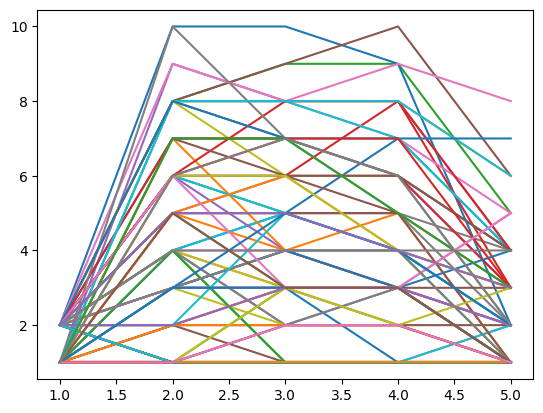

In [157]:
import matplotlib.pyplot as plt
c=[1,2,3,4,5]

for i in range(len(b_start_in2)):
    plt.plot(c,b_start_in2.iloc[i])
plt.show()

In [159]:
print(len(b_start_in3[b_start_in3['서울,제주G1F구간통과순위(서울,제주공통)']>=5])) #26개
len(b_start_in3) #176개
#3번안으로 출주하였을때, 이 순위를 지키지 못한 말들은 26/176이였다.
#2번안으로 출주하였을때, 이 순위를 지키지 못한 말들은 9/88이였다.



9


88

In [230]:
data_1200_in2=data_1200[data_1200['착순']<=2]
data_1200_rank=data_1200_in2[['출주번호','서울,제주S1F구간통과순위(서울,제주공통)','서울,제주3코너구간통과순위(서울,제주공통)','서울,제주4코너구간통과순위(서울,제주공통)','서울,제주G1F구간통과순위(서울,제주공통)','착순']]
b_start_in2=data_1200_rank[data_1200_rank['출주번호']>=7]
c=[1,2,3,4,5,6]
b_start_in2

,출주번호,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",착순
7276,8,5,2,2,1,1
7346,12,4,6,6,6,2
7670,7,8,6,5,4,1
7680,7,5,3,3,3,1
8274,8,1,1,1,1,1
...,...,...,...,...,...,...
28002,7,1,1,1,1,2
28080,12,7,6,6,5,1
28093,8,2,1,1,2,2
28170,8,8,7,7,5,2


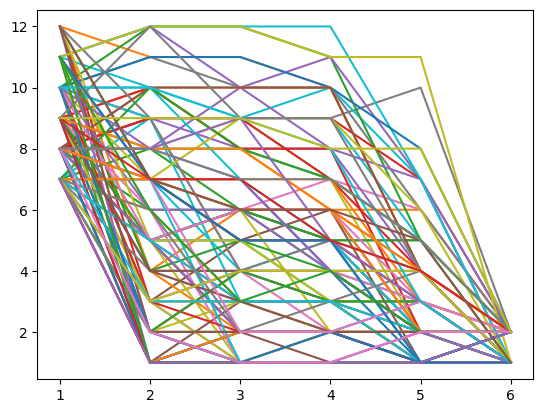

In [231]:
for i in range(len(b_start_in2)):
    plt.plot(c,b_start_in2.iloc[i])
plt.show()

In [ ]:
#목표는 출주번호가 후반부인 친구들이 상위권으로 올라갈 실력,
#출주번호가 상위권인 친구들보다 기량이 더 높아야함

In [16]:
data_1200_in2_start7=data_1200_in2[data_1200_in2['출주번호']>=7]
data_1200_in2_start7_game=data_1200_in2_start7[['경주일자','경주번호']].reset_index()

NameError: name 'data_1200_in2' is not defined

In [15]:
a=data_1200[(data_1200['경주일자'] == data_1200_in2_start7_game['경주일자'][2]) & (data_1200['경주번호'] == data_1200_in2_start7_game['경주번호'][2])]
k=a[a['착순']!=1]
k=k.mean()
k=pd.DataFrame(k,columns=['평균'])
k=k.T
k
q=a[a['착순']==1]
pd.concat([k,q])


NameError: name 'data_1200_in2_start7_game' is not defined

In [415]:
#착순7번부터 실험
#후반부 순위에서 1,2,3 상위권 순위로 올라온 말들
good_horse=data_1200[data_1200['출주번호']-data_1200['착순']>6]
total_horse=data_1200[data_1200['출주번호']>=7]
soso_horse=total_horse.drop(index=good_horse.index)
good_horse_game=good_horse[['경주일자','경주번호']]
soso_horse_game=soso_horse[['경주일자','경주번호']]
#for i in range(len(good_horse)):
#    a=data_1200[(data_1200['경주일자']==good_horse_game['경주일자'][i])&(data_1200['경주번호']==good_horse_game['경주번호'][i])]
#    a=a.mean()




In [416]:
good_horse['key']=1
soso_horse['key']=0
good_horse=good_horse.drop(columns=['Unnamed: 0','경주일자','경주번호','경주거리','착순','서울,제주S1F구간통과순위(서울,제주공통)','서울,제주1코너구간통과순위(서울,제주공통)','서울,제주2코너구간통과순위(서울,제주공통)','서울,제주3코너구간통과순위(서울,제주공통)','서울,제주4코너구간통과순위(서울,제주공통)','서울,제주G1F구간통과순위(서울,제주공통)','제주S-1F통과기록','제주1코너통과기록','제주2코너통과기록','제주3코너통과기록','제주G-3F통과기록','제주4코너통과기록','제주G-1F통과기록'])
soso_horse=soso_horse.drop(columns=['Unnamed: 0','경주일자','경주번호','경주거리','착순','서울,제주S1F구간통과순위(서울,제주공통)','서울,제주1코너구간통과순위(서울,제주공통)','서울,제주2코너구간통과순위(서울,제주공통)','서울,제주3코너구간통과순위(서울,제주공통)','서울,제주4코너구간통과순위(서울,제주공통)','서울,제주G1F구간통과순위(서울,제주공통)','제주S-1F통과기록','제주1코너통과기록','제주2코너통과기록','제주3코너통과기록','제주G-3F통과기록','제주4코너통과기록','제주G-1F통과기록'])
data_1200_train=pd.concat([good_horse,soso_horse])

C:\Users\wjswp\AppData\Local\Temp\ipykernel_36468\3910986087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_horse['key']=1


In [417]:
q=data_1200_test[data_1200_test['출주번호']-data_1200_test['착순']>6]
q['key']=1
p=data_1200_test[data_1200_test['출주번호']-data_1200_test['착순']<=6]
p['key']=0
q=q.drop(columns=['Unnamed: 0','경주일자','경주번호','경주거리','착순','서울,제주S1F구간통과순위(서울,제주공통)','서울,제주1코너구간통과순위(서울,제주공통)','서울,제주2코너구간통과순위(서울,제주공통)','서울,제주3코너구간통과순위(서울,제주공통)','서울,제주4코너구간통과순위(서울,제주공통)','서울,제주G1F구간통과순위(서울,제주공통)','제주S-1F통과기록','제주1코너통과기록','제주2코너통과기록','제주3코너통과기록','제주G-3F통과기록','제주4코너통과기록','제주G-1F통과기록'])
p=p.drop(columns=['Unnamed: 0','경주일자','경주번호','경주거리','착순','서울,제주S1F구간통과순위(서울,제주공통)','서울,제주1코너구간통과순위(서울,제주공통)','서울,제주2코너구간통과순위(서울,제주공통)','서울,제주3코너구간통과순위(서울,제주공통)','서울,제주4코너구간통과순위(서울,제주공통)','서울,제주G1F구간통과순위(서울,제주공통)','제주S-1F통과기록','제주1코너통과기록','제주2코너통과기록','제주3코너통과기록','제주G-3F통과기록','제주4코너통과기록','제주G-1F통과기록'])

data_1200_test=pd.concat([q,p])
data_1200_test

C:\Users\wjswp\AppData\Local\Temp\ipykernel_36468\3880147810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q['key']=1
C:\Users\wjswp\AppData\Local\Temp\ipykernel_36468\3880147810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['key']=0


,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,마체중,주로상태_함수율,혈통,등급,레이팅,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화,key
297,9,3,1,100.3,58.5,18,17,6512,432,854,326,4,1,2.0,95,0.347368,24.1,0.0,4.2,50,68,0.0,47.8,20230616,25.425,0.288581,0.283410,0.210074,0.236111,0.666667,0.666667,0.277518,-0.018072,1
298,10,4,-1,100.6,52.0,31,26,9818,326,708,294,4,1,2.0,82,0.397260,24.1,0.0,4.2,50,68,0.0,47.8,20230616,25.425,0.175579,0.131313,0.176614,0.138037,0.666667,0.666667,0.211864,-0.020000,1
513,10,4,1,102.5,51.5,10,27,12632,493,721,250,7,1,3.0,63,0.422680,23.4,0.0,3.5,320,71,0.0,36.5,20230603,24.075,0.242391,0.243421,0.183265,0.148073,0.296296,0.290909,0.203883,-0.027237,1
522,8,12,0,97.1,56.5,6,12,4705,343,530,313,7,1,1.0,133,0.223529,23.4,0.0,3.5,320,71,0.0,36.5,20230603,24.075,0.275086,0.295455,0.286079,0.265306,0.422535,0.285714,0.345283,-0.006349,1
734,9,3,1,101.7,51.0,10,17,6512,432,745,332,4,1,2.0,82,0.347368,24.3,0.0,4.2,50,76,0.0,41.4,20230526,22.825,0.242391,0.243421,0.210074,0.236111,0.666667,0.666667,0.269799,0.012195,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6855,11,6,0,102.1,55.0,13,29,12538,343,924,296,4,1,2.0,90,0.534247,27.8,0.0,6.4,50,82,0.0,38.8,20220702,30.075,0.193023,0.139303,0.201308,0.113703,0.178344,0.042553,0.191558,-0.003367,0
6856,10,4,-1,102.7,54.0,12,15,5820,383,930,261,4,1,2.0,88,0.441441,27.8,0.0,6.4,50,82,0.0,38.8,20220702,30.075,0.256319,0.262530,0.236254,0.216710,0.519481,0.307692,0.258065,-0.003817,0
6857,1,7,0,103.6,51.5,18,32,12436,400,1211,279,4,1,2.0,83,0.000000,27.8,0.0,6.4,50,82,0.0,38.8,20220702,30.075,0.113647,0.027027,0.192425,0.125000,0.242424,0.177778,0.187448,0.018248,0
6858,5,13,0,103.9,58.5,33,32,12436,400,1211,282,4,1,2.0,97,0.593220,27.8,0.0,6.4,50,82,0.0,38.8,20220702,30.075,0.271929,0.155172,0.192425,0.125000,0.180392,0.105263,0.187448,0.056180,0


In [419]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X_train=data_1200_train.drop(columns=['key'])
X_test=data_1200_test.drop(columns=['key'])
Y_train=data_1200_train['key']
Y_test=data_1200_test['key']

params = {
    'n_estimator':500,
    'max_depth':4,
    'learning_rate': 0.1,
    'random_state':32
}
xgb_clas=XGBClassifier(n_estimators=500, learning_rate=0.2, max_depth=4, random_state = 32)
xgb_clas.fit(X_train,Y_train)

Y_pred=xgb_clas.predict(X_test)

accuracy_score(Y_pred,Y_test)


0.9290657439446367

In [425]:
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

(array([37., 21., 16., 20., 18., 10., 13., 10., 11., 11.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

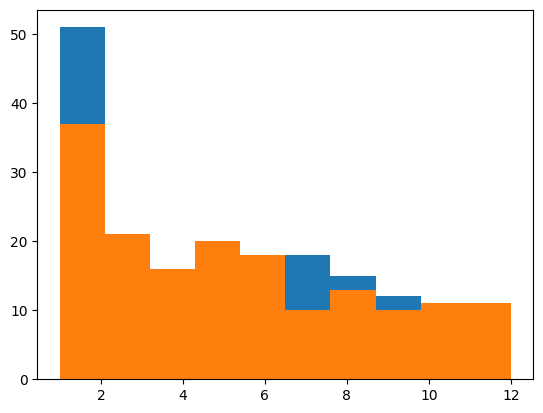

In [625]:
data_1200_first=data_1200[data_1200['착순']==1]
plt.hist(data_1200_first['출주번호'])

data_1200_second=data_1200[data_1200['착순']==2]
plt.hist(data_1200_second['출주번호'])

#data_1200_third=data_1200[data_1200['착순']==3]
#plt.hist(data_1200_third['출주번호'])

#1번은 기본적으로 선택

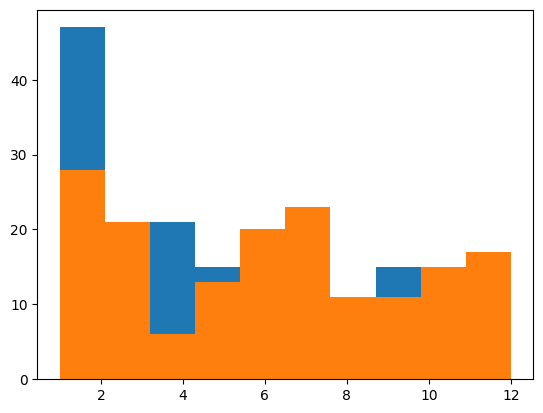

In [578]:
plt.hist(data_1200[data_1200['출주번호']==2]['착순'])
#plt.hist(data_1200[data_1200['출주번호']==1]['착순'])
plt.hist(data_1200[data_1200['출주번호']==7]['착순'])
#1,2번일때 확률이 높았으면 3,4에서 다시내려가고 5,6에서 다시 올라감 그리고 7에서부터 다시 떨어짐
prob_in3=[]
for i in range(1,12):
    prob_in3.append(len(data_1200[(data_1200['출주번호'] == i) & (data_1200['착순'].isin([1, 2, 3]))])/len(data_1200[data_1200['출주번호']==i]))

In [626]:
prob_in3
#1,2,3,6,7으로만 찍어도됨

[0.3712574850299401,
 0.3712574850299401,
 0.30952380952380953,
 0.28484848484848485,
 0.23353293413173654,
 0.2934131736526946,
 0.296969696969697,
 0.25766871165644173,
 0.2645161290322581,
 0.20270270270270271,
 0.20987654320987653]

In [18]:
unique = data_1200_test[["경주일자",	"경주번호"]].drop_duplicates()
unique = unique.reset_index()
unique

data_1200_test["key"]=0
for i in range(len(unique)):
    data_1200_test.loc[(data["경주일자"]==unique["경주일자"][i])&(data_1200_test["경주번호"]==unique["경주번호"][i]), "key"] = i

data_1200_test['in3_real']=0
data_1200_test['in5_pred']=0

data_1200_test.loc[data_1200_test['출주번호'].isin([1, 2, 3, 6, 7]), 'in5_pred'] = 1
data_1200_test.loc[data_1200_test['착순'].isin([1, 2, 3]), 'in3_real'] = 1

data_1200_test

count=0
for i in range(len(unique)):
    a=data_1200_test[data_1200_test['key']==i]
    sum_count=np.sum(a['in3_real']&a['in5_pred'])
    if sum_count>=3:
        count=count+1
    else:
        count=count
count/len(unique)

#무지성으로 1,2,3,6,7로 찍으면 8%의 확률로 1,2,3등하는 경기를 맞출 수 있음

0.08771929824561403

In [20]:
#1,2등은 고정적으로 하고 나머지 3마리를 잘 찍는 방법
#data_1200[['주로상태_함수율','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','3시간신적설(cm)','지면온도(°C)']]
a=data_1200.drop_duplicates(subset='key')
b=a[['주로상태_함수율','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','3시간신적설(cm)','지면온도(°C)']]
b.corr()

KeyError: Index(['key'], dtype='object')

In [ ]:
#마필연령, 혈통, max_post 3개로 회귀예측
from scipy.stats import boxcox
import seaborn as sns
data_1200_no_rating=data_1200[data_1200['레이팅']==0]
data_1200_rating=data_1200[data_1200['레이팅']!=0]
#300개 train, 1300개는 test
data_1200_rating_train=data_1200_rating[0:1300]
data_1200_rating_test=data_1200_rating[1301:]


In [710]:
#레이팅 채우기
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
X_train = data_1200_rating_train[['마필연령','혈통','max_post']]
X_test = data_1200_rating_test[['마필연령','혈통','max_post']]
y_train = data_1200_rating_train['레이팅']
y_test = data_1200_rating_test['레이팅']
params = {
    'max_depth':5,
    'reg_lambda':1,
    'min_child_weight':1,
    'gamma':0,
    'learning_rate': 0.5,
    'n_estimators': 1000,
    'nthread':3
}
xgb_reg = XGBRegressor(learning_rate=0.5,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,nthread=3,scale_pos_weight=1,seed=1)
xgb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test)


In [711]:
np.sqrt(np.mean((y_pred-y_test)**2))

15.266970636367274

In [648]:
#1,2등은 고정적으로 선택하고 나머지 3마리를 어떻게 고를 것이냐
game_count=len(data_1200.drop_duplicates(subset='key'))
for i in range(game_count):
    a=data_1200[data_1200['key']==i]['레이팅']
    a

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,주로상태_함수율,혈통,등급,레이팅,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화,key
7276,7276,20220611,7,1200,1,8,5,1,93.5,56.0,10,23,10543,408,1068,5,0,0,2,2,1,16.8,0.0,0.0,46.9,46.6,62.0,16.3,326,12,1,NaN,157,0.309091,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.242391,0.243421,0.244238,0.240196,0.792453,0.526316,0.267790,-0.009119,0
7345,7345,20220610,7,1200,1,5,10,-1,97.8,51.0,10,26,9818,326,772,10,0,0,10,9,5,17.6,0.0,0.0,49.3,48.5,65.6,16.4,259,4,1,1.0,101,0.548387,26.9,0.0,1.7,320,58,0.0,30.0,20220610,24.150,0.242391,0.243421,0.176614,0.138037,0.243094,0.095238,0.200777,-0.007663,1
7670,7670,20220521,5,1200,1,7,9,0,103.1,52.0,24,17,6512,432,1241,8,0,0,6,5,4,18.0,0.0,0.0,51.7,51.4,68.7,17.4,328,6,1,3.0,61,0.000000,23.1,0.0,2.6,360,60,0.0,37.2,20220521,22.050,0.259547,0.191257,0.210074,0.236111,0.191617,0.121212,0.231265,-0.035294,2
7680,7680,20220521,6,1200,1,7,6,0,99.3,58.0,6,12,4705,343,806,5,0,0,3,3,3,17.3,0.0,0.0,50.2,49.1,66.6,16.6,328,6,1,1.0,113,0.373134,23.1,0.0,2.6,360,60,0.0,37.2,20220521,22.050,0.275086,0.295455,0.286079,0.265306,0.347107,0.137931,0.326303,0.021807,3
8148,8148,20220429,7,1200,1,2,9,0,100.4,58.0,24,23,10543,408,1140,4,0,0,3,3,1,17.3,0.0,0.0,51.3,49.1,67.8,16.6,260,16,1,2.0,0,0.000000,15.0,0.0,2.7,360,79,0.0,20.6,20220429,18.050,0.264384,0.177885,0.244238,0.240196,0.194872,0.060606,0.285088,0.003861,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28092,28092,20190201,5,1200,1,1,4,-1,83.5,51.0,9,13,5448,445,1454,1,0,0,2,2,1,15.2,0.0,0.0,41.7,41.8,55.3,14.5,327,20,0,2.0,41,0.000000,6.1,0.0,5.0,290,50,0.0,12.4,20190201,6.575,0.247273,0.276029,0.245411,0.251685,0.213592,0.153846,0.239340,0.015528,163
28169,28169,20190126,4,1200,1,3,5,0,97.9,58.0,18,7,2366,321,1048,6,0,0,6,6,4,17.4,0.0,0.0,50.2,47.7,66.7,15.9,305,3,1,1.0,107,0.000000,5.6,0.0,6.8,340,44,0.0,16.0,20190126,6.525,0.193132,0.101523,0.250634,0.208723,0.269006,0.068966,0.239504,-0.031746,164
28260,28260,20190125,4,1200,1,6,11,0,101.5,58.0,27,32,12436,400,1855,2,0,0,1,1,1,17.5,0.0,0.0,50.9,50.6,68.3,16.8,325,4,1,2.0,86,0.593220,9.2,0.0,4.5,320,47,0.0,17.5,20190125,6.800,0.205697,0.138686,0.192425,0.125000,0.258900,0.181818,0.189218,0.006192,165
28441,28441,20190118,4,1200,1,4,6,-1,99.5,65.0,12,27,10161,321,1249,2,0,0,3,3,3,17.2,0.0,0.0,50.0,49.5,66.6,16.8,317,7,1,1.0,119,0.398374,8.0,0.0,2.1,360,55,0.0,18.1,20190118,6.725,0.256319,0.262530,0.273792,0.249221,0.349727,0.105263,0.248999,0.012780,166


In [654]:
a=data_1200[data_1200['key']==0]
b=a[a['레이팅']!=0]
np.mean(b['레이팅'])

135.875

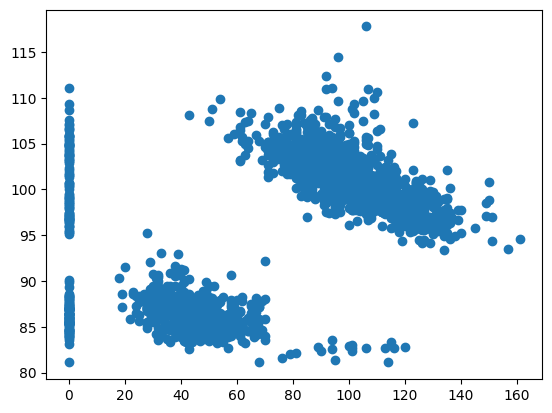

In [28]:
import matplotlib.pyplot as plt
plt.scatter(data_1200['레이팅'],data_1200['경주기록(초)'])
plt.show()

(array([ 18., 103., 215., 174.,  41.,  16.,   5.,  24., 114., 207., 180.,
        230., 149.,  72.,  33.,   9.,   4.,   1.,   1.,   1.]),
 array([ 81.1  ,  82.935,  84.77 ,  86.605,  88.44 ,  90.275,  92.11 ,
         93.945,  95.78 ,  97.615,  99.45 , 101.285, 103.12 , 104.955,
        106.79 , 108.625, 110.46 , 112.295, 114.13 , 115.965, 117.8  ]),
 <BarContainer object of 20 artists>)

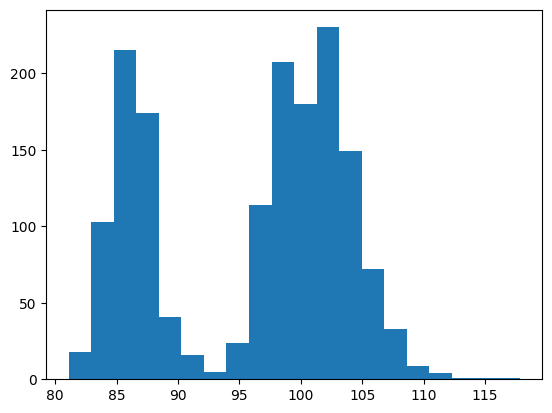

In [638]:
plt.hist(a['경주기록(초)'],bins=20)
#데이터를 2그룹으로 나눠서 따로학습
#그룹마다 정규화

In [511]:
#출주번호가 낮은 애들의 해당 경기의 위치를 알고 싶음
#출주번호가 낮은데 상위권인 아이들
start_under7=data_1200[(data_1200['출주번호']>=7)&(data_1200['착순']<=3)]
start_under7=start_under7.reset_index()
start_under7_game=start_under7[['경주일자','경주번호']]
col=['마필연령','부담중량','기수경력(년)','조교사경력(년)','조교사통산출전횟수','조교사최근1년간출전횟수','조교사위탁경주마출전횟수','마체중','max_post','기수통산승률','기수최근승률','조교사통산승률','조교사최근승률','말통산승률','말최근승률','조교사위탁승률','체중변화']
fixed_col=['마필성별','주로상태_함수율','혈통','등급','레이팅','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','지면온도(°C)','avg_temp']
between=pd.DataFrame()
a=pd.DataFrame()
for i in range(len(start_under7)):
    mean_data=data_1200[(data_1200['경주일자']==start_under7_game.iloc[i]['경주일자'])&(data_1200['경주번호']==start_under7_game.iloc[i]['경주번호'])].mean()[col]
    select_data=start_under7.iloc[i][col]
    between=pd.concat([between,pd.DataFrame(select_data-mean_data).T])
tot_data_good=pd.concat([between.reset_index(),start_under7[fixed_col]],axis=1)

tot_data_good=tot_data_good.drop(columns=['index'])

start_under7=data_1200[(data_1200['출주번호']>=7)&(data_1200['착순']>=7)]
start_under7=start_under7.reset_index()
start_under7_game=start_under7[['경주일자','경주번호']]
col=['마필연령','부담중량','기수경력(년)','조교사경력(년)','조교사통산출전횟수','조교사최근1년간출전횟수','조교사위탁경주마출전횟수','마체중','max_post','기수통산승률','기수최근승률','조교사통산승률','조교사최근승률','말통산승률','말최근승률','조교사위탁승률','체중변화']
fixed_col=['마필성별','주로상태_함수율','혈통','등급','레이팅','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','지면온도(°C)','avg_temp']
between=pd.DataFrame()
a=pd.DataFrame()
for i in range(len(start_under7)):
    mean_data=data_1200[(data_1200['경주일자']==start_under7_game.iloc[i]['경주일자'])&(data_1200['경주번호']==start_under7_game.iloc[i]['경주번호'])].mean()[col]
    select_data=start_under7.iloc[i][col]
    between=pd.concat([between,pd.DataFrame(select_data-mean_data).T])
tot_data_bad=pd.concat([between.reset_index(),start_under7[fixed_col]],axis=1)

tot_data_bad=tot_data_bad.drop(columns=['index'])
tot_data_bad

start_under7=data_1200[(data_1200['출주번호']>=7)&(data_1200['착순']<7)&(data_1200['착순']>3)]
start_under7=start_under7.reset_index()
start_under7_game=start_under7[['경주일자','경주번호']]
col=['마필연령','부담중량','기수경력(년)','조교사경력(년)','조교사통산출전횟수','조교사최근1년간출전횟수','조교사위탁경주마출전횟수','마체중','max_post','기수통산승률','기수최근승률','조교사통산승률','조교사최근승률','말통산승률','말최근승률','조교사위탁승률','체중변화']
fixed_col=['마필성별','주로상태_함수율','혈통','등급','레이팅','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','지면온도(°C)','avg_temp']
between=pd.DataFrame()
a=pd.DataFrame()
for i in range(len(start_under7)):
    mean_data=data_1200[(data_1200['경주일자']==start_under7_game.iloc[i]['경주일자'])&(data_1200['경주번호']==start_under7_game.iloc[i]['경주번호'])].mean()[col]
    select_data=start_under7.iloc[i][col]
    between=pd.concat([between,pd.DataFrame(select_data-mean_data).T])
tot_data_soso=pd.concat([between.reset_index(),start_under7[fixed_col]],axis=1)

tot_data_soso=tot_data_soso.drop(columns=['index'])

tot_data_good['key']=0
tot_data_soso['key']=1
tot_data_bad['key']=2

train_data=pd.concat([tot_data_good,tot_data_soso,tot_data_bad])

In [512]:
start_under7=data_1200_test[(data_1200_test['출주번호']>=7)&(data_1200_test['착순']>=7)]
start_under7=start_under7.reset_index()
start_under7_game=start_under7[['경주일자','경주번호']]
col=['마필연령','부담중량','기수경력(년)','조교사경력(년)','조교사통산출전횟수','조교사최근1년간출전횟수','조교사위탁경주마출전횟수','마체중','max_post','기수통산승률','기수최근승률','조교사통산승률','조교사최근승률','말통산승률','말최근승률','조교사위탁승률','체중변화']
fixed_col=['마필성별','주로상태_함수율','혈통','등급','레이팅','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','지면온도(°C)','avg_temp']
between=pd.DataFrame()
a=pd.DataFrame()
for i in range(len(start_under7)):
    mean_data=data_1200_test[(data_1200_test['경주일자']==start_under7_game.iloc[i]['경주일자'])&(data_1200_test['경주번호']==start_under7_game.iloc[i]['경주번호'])].mean()[col]
    select_data=start_under7.iloc[i][col]
    between=pd.concat([between,pd.DataFrame(select_data-mean_data).T])
tot_data_bad_test=pd.concat([between.reset_index(),start_under7[fixed_col]],axis=1)

tot_data_bad_test=tot_data_bad_test.drop(columns=['index'])
tot_data_bad_test

start_under7=data_1200_test[(data_1200_test['출주번호']>=7)&(data_1200_test['착순']<=3)]
start_under7=start_under7.reset_index()
start_under7_game=start_under7[['경주일자','경주번호']]
col=['마필연령','부담중량','기수경력(년)','조교사경력(년)','조교사통산출전횟수','조교사최근1년간출전횟수','조교사위탁경주마출전횟수','마체중','max_post','기수통산승률','기수최근승률','조교사통산승률','조교사최근승률','말통산승률','말최근승률','조교사위탁승률','체중변화']
fixed_col=['마필성별','주로상태_함수율','혈통','등급','레이팅','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','지면온도(°C)','avg_temp']
between=pd.DataFrame()
a=pd.DataFrame()
for i in range(len(start_under7)):
    mean_data=data_1200_test[(data_1200_test['경주일자']==start_under7_game.iloc[i]['경주일자'])&(data_1200_test['경주번호']==start_under7_game.iloc[i]['경주번호'])].mean()[col]
    select_data=start_under7.iloc[i][col]
    between=pd.concat([between,pd.DataFrame(select_data-mean_data).T])
tot_data_good_test=pd.concat([between.reset_index(),start_under7[fixed_col]],axis=1)

tot_data_good_test=tot_data_good_test.drop(columns=['index'])
tot_data_good_test

start_under7=data_1200_test[(data_1200_test['출주번호']>=7)&(data_1200_test['착순']>3)&(data_1200_test['착순']<7)]
start_under7=start_under7.reset_index()
start_under7_game=start_under7[['경주일자','경주번호']]
col=['마필연령','부담중량','기수경력(년)','조교사경력(년)','조교사통산출전횟수','조교사최근1년간출전횟수','조교사위탁경주마출전횟수','마체중','max_post','기수통산승률','기수최근승률','조교사통산승률','조교사최근승률','말통산승률','말최근승률','조교사위탁승률','체중변화']
fixed_col=['마필성별','주로상태_함수율','혈통','등급','레이팅','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','지면온도(°C)','avg_temp']
between=pd.DataFrame()
a=pd.DataFrame()
for i in range(len(start_under7)):
    mean_data=data_1200_test[(data_1200_test['경주일자']==start_under7_game.iloc[i]['경주일자'])&(data_1200_test['경주번호']==start_under7_game.iloc[i]['경주번호'])].mean()[col]
    select_data=start_under7.iloc[i][col]
    between=pd.concat([between,pd.DataFrame(select_data-mean_data).T])
tot_data_soso_test=pd.concat([between.reset_index(),start_under7[fixed_col]],axis=1)

tot_data_soso_test=tot_data_soso_test.drop(columns=['index'])
tot_data_soso_test

tot_data_good_test['key']=0
tot_data_soso_test['key']=1
tot_data_bad_test['key']=2

test_data=pd.concat([tot_data_good_test,tot_data_soso_test,tot_data_bad_test])
test_data

,마필연령,부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,마체중,max_post,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화,마필성별,주로상태_함수율,혈통,등급,레이팅,기온(°C),강수량(mm),풍속(m/s),습도(%),지면온도(°C),avg_temp,key
0,4.10,3.500,-9.9,-4.100000,-1785.200000,-7.200000,105.800000,19.600000,0.191174,-0.035777,0.021709,0.016444,0.019373,0.017988,-0.075667,0.059882,0.021061,0,4,1,1.0,113,26.0,0.0,5.1,57,50.5,25.425,0
1,0.75,3.000,-1.5,3.375000,-641.125000,-233.750000,-58.250000,1.250000,-0.305081,-0.040783,-0.031294,0.012406,-0.022538,-0.089713,-0.101677,-0.059218,-0.005133,-1,4,1,3.0,74,24.1,0.0,4.2,68,47.8,25.425,0
2,-4.70,3.450,6.0,1.900000,844.900000,68.100000,128.400000,38.700000,-0.086599,0.086114,0.088764,-0.019946,0.017171,0.296060,0.397935,0.013760,-0.015280,1,4,1,2.0,95,24.1,0.0,4.2,68,47.8,25.425,0
3,-3.70,-3.050,19.0,10.900000,4150.900000,-37.900000,-17.600000,6.700000,-0.036708,-0.026888,-0.063333,-0.053405,-0.080904,0.296060,0.397935,-0.051894,-0.017207,-1,4,1,2.0,82,24.1,0.0,4.2,68,47.8,25.425,0
4,-2.00,-0.950,-1.7,3.300000,1515.400000,-12.800000,60.800000,2.300000,0.077127,0.038368,0.077189,0.005190,-0.037676,-0.002416,-0.029067,-0.012488,-0.000403,-1,5,1,2.0,86,24.9,0.0,4.0,70,40.0,24.025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,3.50,-3.125,-14.0,3.000000,1628.666667,1.583333,-50.083333,-16.416667,-0.332359,-0.076810,-0.028569,0.010293,-0.030213,-0.112109,0.059788,0.002918,-0.004773,0,4,1,1.0,104,30.9,0.0,3.7,57,44.7,31.700,2
101,6.50,-2.125,-8.0,1.000000,160.666667,52.583333,296.916667,2.583333,0.260861,-0.004697,0.064820,-0.013092,0.011672,0.014820,-0.007409,-0.007436,0.022148,0,4,1,1.0,104,30.9,0.0,3.7,57,44.7,31.700,2
102,-1.00,-0.750,-3.5,8.916667,5476.333333,129.333333,-131.333333,-29.000000,0.099214,-0.046390,-0.046278,-0.035956,-0.036515,-0.030353,0.016682,-0.031503,-0.006406,0,4,1,2.0,88,27.8,0.0,6.4,82,38.8,30.075,2
103,-3.00,0.250,-3.5,10.916667,5382.333333,-20.666667,-36.333333,14.000000,0.094999,-0.017136,-0.026974,-0.017913,-0.070885,-0.084053,-0.126811,-0.041392,-0.005836,0,4,1,2.0,90,27.8,0.0,6.4,82,38.8,30.075,2


In [513]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X_train=train_data.drop(columns=['key'])
X_test=test_data.drop(columns=['key'])
Y_train=train_data['key']
Y_test=test_data['key']

params = {
    'n_estimator':500,
    'max_depth':4,
    'learning_rate': 0.1,
    'random_state':32
}
xgb_clas=XGBClassifier(n_estimators=500, learning_rate=0.2, max_depth=4, random_state = 32)
xgb_clas.fit(X_train,Y_train)

Y_pred=xgb_clas.predict(X_test)

accuracy_score(Y_pred,Y_test)


0.46218487394957986

In [514]:
Y_pred

array([2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 1, 0,
       2, 2, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0,
       0, 2, 2, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 1,
       1, 1, 0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 0, 0,
       1, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       0, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0], dtype=int64)

In [515]:
Y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [530]:
data_1200

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,주로상태_함수율,혈통,등급,레이팅,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화
7276,7276,20220611,7,1200,1,8,5,1,93.5,56.0,10,23,10543,408,1068,5,0,0,2,2,1,16.8,0.0,0.0,46.9,46.6,62.0,16.3,326,12,1,NaN,157,0.309091,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.242391,0.243421,0.244238,0.240196,0.792453,0.526316,0.267790,-0.009119
7277,7277,20220611,7,1200,2,1,5,0,94.4,57.0,24,23,10543,408,1068,4,0,0,5,7,4,16.8,0.0,0.0,47.8,46.6,63.5,15.7,293,12,1,NaN,151,0.000000,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.264384,0.177885,0.244238,0.240196,0.754098,0.133333,0.267790,0.006873
7278,7278,20220611,7,1200,3,4,5,-1,94.9,57.0,33,32,12436,400,1125,1,0,0,1,1,2,16.0,0.0,0.0,46.6,48.3,61.5,17.5,302,12,1,NaN,138,0.317647,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.271929,0.155172,0.192425,0.125000,0.482759,0.413793,0.193778,-0.038217
7279,7279,20220611,7,1200,4,2,6,0,96.0,57.0,7,19,7980,381,854,2,0,0,3,3,3,16.5,0.0,0.0,47.2,48.8,62.7,17.3,306,12,1,NaN,0,0.000000,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.175798,0.205882,0.233459,0.194226,0.475248,0.518519,0.245902,-0.019231
7280,7280,20220611,7,1200,5,10,8,0,96.0,57.0,13,15,5820,383,993,10,0,0,10,8,8,17.5,0.0,0.0,48.3,47.7,63.6,16.6,271,12,1,NaN,0,0.000000,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.193023,0.139303,0.236254,0.216710,0.347305,0.173913,0.240685,-0.035587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28638,28638,20190111,5,1200,5,4,4,1,89.1,56.5,20,5,1841,432,892,8,0,0,8,9,9,16.0,0.0,0.0,45.2,43.9,60.1,14.7,302,8,0,3.0,35,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,20190111,7.875,0.233681,0.000000,0.231939,0.245370,0.065934,0.181818,0.219731,-0.025806
28639,28639,20190111,5,1200,6,5,5,1,89.3,54.5,20,19,7231,367,608,3,0,0,4,5,5,15.6,0.0,0.0,44.5,44.8,59.5,15.3,294,8,0,3.0,31,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,20190111,7.875,0.242372,0.000000,0.197760,0.182561,0.110236,0.181818,0.144737,0.003413
28640,28640,20190111,5,1200,7,3,5,1,89.4,58.0,24,12,4705,343,1244,5,0,0,3,3,6,15.7,0.0,0.0,44.5,44.9,59.4,15.3,285,8,0,3.0,38,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,20190111,7.875,0.264384,0.177885,0.286079,0.265306,0.061856,0.181818,0.277331,-0.003497
28641,28641,20190111,5,1200,8,6,4,-1,89.4,55.0,12,27,10161,321,1317,4,0,0,2,2,4,15.6,0.0,0.0,44.3,45.1,59.1,15.4,299,8,0,3.0,32,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,20190111,7.875,0.256319,0.262530,0.273792,0.249221,0.133333,0.181818,0.250569,0.000000


In [520]:
#출주번호가 낮은 애들의 해당 경기의 위치를 알고 싶음
#출주번호가 낮은데 상위권인 아이들
start_under7=data_1200[(data_1200['출주번호']<=4)&(data_1200['착순']<=3)]
start_under7=start_under7.reset_index()
start_under7_game=start_under7[['경주일자','경주번호']]
col=['마필연령','부담중량','기수경력(년)','조교사경력(년)','조교사통산출전횟수','조교사최근1년간출전횟수','조교사위탁경주마출전횟수','마체중','max_post','기수통산승률','기수최근승률','조교사통산승률','조교사최근승률','말통산승률','말최근승률','조교사위탁승률','체중변화']
fixed_col=['마필성별','주로상태_함수율','혈통','등급','레이팅','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','지면온도(°C)','avg_temp']
between=pd.DataFrame()
a=pd.DataFrame()
for i in range(len(start_under7)):
    mean_data=data_1200[(data_1200['경주일자']==start_under7_game.iloc[i]['경주일자'])&(data_1200['경주번호']==start_under7_game.iloc[i]['경주번호'])].mean()[col]
    select_data=start_under7.iloc[i][col]
    between=pd.concat([between,pd.DataFrame(select_data-mean_data).T])
tot_data_good=pd.concat([between.reset_index(),start_under7[fixed_col]],axis=1)

tot_data_good=tot_data_good.drop(columns=['index'])

start_under7=data_1200[(data_1200['출주번호']<=4)&(data_1200['착순']>=7)]
start_under7=start_under7.reset_index()
start_under7_game=start_under7[['경주일자','경주번호']]
col=['마필연령','부담중량','기수경력(년)','조교사경력(년)','조교사통산출전횟수','조교사최근1년간출전횟수','조교사위탁경주마출전횟수','마체중','max_post','기수통산승률','기수최근승률','조교사통산승률','조교사최근승률','말통산승률','말최근승률','조교사위탁승률','체중변화']
fixed_col=['마필성별','주로상태_함수율','혈통','등급','레이팅','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','지면온도(°C)','avg_temp']
between=pd.DataFrame()
a=pd.DataFrame()
for i in range(len(start_under7)):
    mean_data=data_1200[(data_1200['경주일자']==start_under7_game.iloc[i]['경주일자'])&(data_1200['경주번호']==start_under7_game.iloc[i]['경주번호'])].mean()[col]
    select_data=start_under7.iloc[i][col]
    between=pd.concat([between,pd.DataFrame(select_data-mean_data).T])
tot_data_bad=pd.concat([between.reset_index(),start_under7[fixed_col]],axis=1)

tot_data_bad=tot_data_bad.drop(columns=['index'])
tot_data_bad

start_under7=data_1200[(data_1200['출주번호']<=4)&(data_1200['착순']<7)&(data_1200['착순']>3)]
start_under7=start_under7.reset_index()
start_under7_game=start_under7[['경주일자','경주번호']]
col=['마필연령','부담중량','기수경력(년)','조교사경력(년)','조교사통산출전횟수','조교사최근1년간출전횟수','조교사위탁경주마출전횟수','마체중','max_post','기수통산승률','기수최근승률','조교사통산승률','조교사최근승률','말통산승률','말최근승률','조교사위탁승률','체중변화']
fixed_col=['마필성별','주로상태_함수율','혈통','등급','레이팅','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','지면온도(°C)','avg_temp']
between=pd.DataFrame()
a=pd.DataFrame()
for i in range(len(start_under7)):
    mean_data=data_1200[(data_1200['경주일자']==start_under7_game.iloc[i]['경주일자'])&(data_1200['경주번호']==start_under7_game.iloc[i]['경주번호'])].mean()[col]
    select_data=start_under7.iloc[i][col]
    between=pd.concat([between,pd.DataFrame(select_data-mean_data).T])
tot_data_soso=pd.concat([between.reset_index(),start_under7[fixed_col]],axis=1)

tot_data_soso=tot_data_soso.drop(columns=['index'])

tot_data_good['key']=0
tot_data_soso['key']=1
tot_data_bad['key']=2

train_data=pd.concat([tot_data_good,tot_data_soso,tot_data_bad])
a

""


In [521]:
start_under7=data_1200_test[(data_1200_test['출주번호']<=4)&(data_1200_test['착순']>=7)]
start_under7=start_under7.reset_index()
start_under7_game=start_under7[['경주일자','경주번호']]
col=['마필연령','부담중량','기수경력(년)','조교사경력(년)','조교사통산출전횟수','조교사최근1년간출전횟수','조교사위탁경주마출전횟수','마체중','max_post','기수통산승률','기수최근승률','조교사통산승률','조교사최근승률','말통산승률','말최근승률','조교사위탁승률','체중변화']
fixed_col=['마필성별','주로상태_함수율','혈통','등급','레이팅','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','지면온도(°C)','avg_temp']
between=pd.DataFrame()
a=pd.DataFrame()
for i in range(len(start_under7)):
    mean_data=data_1200_test[(data_1200_test['경주일자']==start_under7_game.iloc[i]['경주일자'])&(data_1200_test['경주번호']==start_under7_game.iloc[i]['경주번호'])].mean()[col]
    select_data=start_under7.iloc[i][col]
    between=pd.concat([between,pd.DataFrame(select_data-mean_data).T])
tot_data_bad_test=pd.concat([between.reset_index(),start_under7[fixed_col]],axis=1)

tot_data_bad_test=tot_data_bad_test.drop(columns=['index'])
tot_data_bad_test

start_under7=data_1200_test[(data_1200_test['출주번호']<=4)&(data_1200_test['착순']<=3)]
start_under7=start_under7.reset_index()
start_under7_game=start_under7[['경주일자','경주번호']]
col=['마필연령','부담중량','기수경력(년)','조교사경력(년)','조교사통산출전횟수','조교사최근1년간출전횟수','조교사위탁경주마출전횟수','마체중','max_post','기수통산승률','기수최근승률','조교사통산승률','조교사최근승률','말통산승률','말최근승률','조교사위탁승률','체중변화']
fixed_col=['마필성별','주로상태_함수율','혈통','등급','레이팅','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','지면온도(°C)','avg_temp']
between=pd.DataFrame()
a=pd.DataFrame()
for i in range(len(start_under7)):
    mean_data=data_1200_test[(data_1200_test['경주일자']==start_under7_game.iloc[i]['경주일자'])&(data_1200_test['경주번호']==start_under7_game.iloc[i]['경주번호'])].mean()[col]
    select_data=start_under7.iloc[i][col]
    between=pd.concat([between,pd.DataFrame(select_data-mean_data).T])
tot_data_good_test=pd.concat([between.reset_index(),start_under7[fixed_col]],axis=1)

tot_data_good_test=tot_data_good_test.drop(columns=['index'])
tot_data_good_test

start_under7=data_1200_test[(data_1200_test['출주번호']<=4)&(data_1200_test['착순']>3)&(data_1200_test['착순']<7)]
start_under7=start_under7.reset_index()
start_under7_game=start_under7[['경주일자','경주번호']]
col=['마필연령','부담중량','기수경력(년)','조교사경력(년)','조교사통산출전횟수','조교사최근1년간출전횟수','조교사위탁경주마출전횟수','마체중','max_post','기수통산승률','기수최근승률','조교사통산승률','조교사최근승률','말통산승률','말최근승률','조교사위탁승률','체중변화']
fixed_col=['마필성별','주로상태_함수율','혈통','등급','레이팅','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','지면온도(°C)','avg_temp']
between=pd.DataFrame()
a=pd.DataFrame()
for i in range(len(start_under7)):
    mean_data=data_1200_test[(data_1200_test['경주일자']==start_under7_game.iloc[i]['경주일자'])&(data_1200_test['경주번호']==start_under7_game.iloc[i]['경주번호'])].mean()[col]
    select_data=start_under7.iloc[i][col]
    between=pd.concat([between,pd.DataFrame(select_data-mean_data).T])
tot_data_soso_test=pd.concat([between.reset_index(),start_under7[fixed_col]],axis=1)

tot_data_soso_test=tot_data_soso_test.drop(columns=['index'])
tot_data_soso_test

tot_data_good_test['key']=0
tot_data_soso_test['key']=1
tot_data_bad_test['key']=2

test_data=pd.concat([tot_data_good_test,tot_data_soso_test,tot_data_bad_test])
test_data

,마필연령,부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,마체중,max_post,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화,마필성별,주로상태_함수율,혈통,등급,레이팅,기온(°C),강수량(mm),풍속(m/s),습도(%),지면온도(°C),avg_temp,key
0,-2.000000,-1.600000,5.500000,-14.100000,-5919.700000,63.700000,58.100000,9.700000,0.154119,-0.014901,-0.069731,0.001716,0.014192,0.003118,-0.029320,-0.023117,-0.004232,0,6,1,2.0,86,23.9,0.0,3.0,75,47.2,25.475,0
1,1.000000,-3.100000,-4.500000,7.900000,3020.300000,-18.300000,-130.900000,-22.300000,-0.401436,-0.008754,0.002504,-0.033303,0.028822,-0.155461,-0.170659,-0.037990,-0.030487,0,6,1,2.0,0,23.9,0.0,3.0,75,47.2,25.475,0
2,-1.900000,-2.500000,-3.900000,-14.100000,-5764.200000,41.800000,-106.200000,-1.400000,0.085953,-0.018552,-0.044870,0.012129,0.048033,-0.046906,0.022643,0.011527,-0.024621,0,4,1,1.0,101,26.0,0.0,5.1,57,50.5,25.425,0
3,0.100000,-1.500000,10.100000,12.900000,4830.800000,9.800000,170.800000,-7.400000,0.121763,-0.005878,-0.045488,-0.027385,-0.072337,-0.048061,0.003008,-0.066926,-0.008668,0,4,1,1.0,103,26.0,0.0,5.1,57,50.5,25.425,0
4,1.750000,4.000000,19.500000,2.375000,89.875000,-52.750000,-8.250000,2.250000,0.004010,-0.007298,-0.042838,-0.029534,-0.056915,-0.074197,-0.131102,-0.025165,-0.045114,0,4,1,3.0,76,24.1,0.0,4.2,68,47.8,25.425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,-3.555556,-3.944444,-6.444444,-8.444444,-3130.444444,68.333333,180.111111,-4.333333,-0.215013,0.017198,0.086116,0.017180,0.037374,0.205646,-0.108103,0.037412,0.041326,0,4,1,1.0,122,29.0,0.0,4.0,73,39.3,29.975,2
83,2.500000,-2.625000,10.000000,-12.000000,-5083.333333,-24.416667,-82.083333,18.583333,-0.332359,-0.023036,-0.066916,0.007907,-0.010354,-0.101094,0.002808,-0.011048,0.047602,0,4,1,1.0,103,30.9,0.0,3.7,57,44.7,31.700,2
84,-0.500000,-1.625000,7.000000,7.000000,4191.666667,28.583333,6.916667,-43.416667,-0.332359,0.035650,-0.027717,0.021072,0.015757,-0.122616,-0.084734,0.009095,-0.020409,0,4,1,1.0,0,30.9,0.0,3.7,57,44.7,31.700,2
85,3.500000,3.875000,-5.000000,11.000000,4429.666667,-29.416667,-76.083333,14.583333,0.260861,0.027586,0.056928,-0.026245,0.035561,-0.013601,-0.050102,0.027527,-0.000987,0,4,1,1.0,116,30.9,0.0,3.7,57,44.7,31.700,2


In [522]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X_train=train_data.drop(columns=['key'])
X_test=test_data.drop(columns=['key'])
Y_train=train_data['key']
Y_test=test_data['key']

params = {
    'n_estimator':500,
    'max_depth':4,
    'learning_rate': 0.1,
    'random_state':32
}
xgb_clas=XGBClassifier(n_estimators=500, learning_rate=0.2, max_depth=4, random_state = 32)
xgb_clas.fit(X_train,Y_train)

Y_pred=xgb_clas.predict(X_test)

accuracy_score(Y_pred,Y_test)


0.37719298245614036

In [523]:
Y_pred

array([2, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2,
       1, 0, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 2,
       0, 1, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 1, 0, 0,
       2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0,
       1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 2, 2, 2, 1, 0, 2, 1, 1, 0, 1, 2, 2,
       0, 2, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 0, 1, 0, 1, 0,
       1, 1, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 0, 2, 2, 2, 1, 0, 2], dtype=int64)

In [24]:
data_1200

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,주로상태_함수율,혈통,등급,레이팅,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),날짜,avg_temp,기수통산승률,기수최근승률,조교사통산승률,조교사최근승률,말통산승률,말최근승률,조교사위탁승률,체중변화
7276,7276,20220611,7,1200,1,8,5,1,93.5,56.0,10,23,10543,408,1068,5,0,0,2,2,1,16.8,0.0,0.0,46.9,46.6,62.0,16.3,326,12,1,NaN,157,0.309091,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.242391,0.243421,0.244238,0.240196,0.792453,0.526316,0.267790,-0.009119
7277,7277,20220611,7,1200,2,1,5,0,94.4,57.0,24,23,10543,408,1068,4,0,0,5,7,4,16.8,0.0,0.0,47.8,46.6,63.5,15.7,293,12,1,NaN,151,0.000000,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.264384,0.177885,0.244238,0.240196,0.754098,0.133333,0.267790,0.006873
7278,7278,20220611,7,1200,3,4,5,-1,94.9,57.0,33,32,12436,400,1125,1,0,0,1,1,2,16.0,0.0,0.0,46.6,48.3,61.5,17.5,302,12,1,NaN,138,0.317647,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.271929,0.155172,0.192425,0.125000,0.482759,0.413793,0.193778,-0.038217
7279,7279,20220611,7,1200,4,2,6,0,96.0,57.0,7,19,7980,381,854,2,0,0,3,3,3,16.5,0.0,0.0,47.2,48.8,62.7,17.3,306,12,1,NaN,0,0.000000,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.175798,0.205882,0.233459,0.194226,0.475248,0.518519,0.245902,-0.019231
7280,7280,20220611,7,1200,5,10,8,0,96.0,57.0,13,15,5820,383,993,10,0,0,10,8,8,17.5,0.0,0.0,48.3,47.7,63.6,16.6,271,12,1,NaN,0,0.000000,22.9,0.0,4.3,50,77,0.0,32.7,20220611,24.275,0.193023,0.139303,0.236254,0.216710,0.347305,0.173913,0.240685,-0.035587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28638,28638,20190111,5,1200,5,4,4,1,89.1,56.5,20,5,1841,432,892,8,0,0,8,9,9,16.0,0.0,0.0,45.2,43.9,60.1,14.7,302,8,0,3.0,35,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,20190111,7.875,0.233681,0.000000,0.231939,0.245370,0.065934,0.181818,0.219731,-0.025806
28639,28639,20190111,5,1200,6,5,5,1,89.3,54.5,20,19,7231,367,608,3,0,0,4,5,5,15.6,0.0,0.0,44.5,44.8,59.5,15.3,294,8,0,3.0,31,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,20190111,7.875,0.242372,0.000000,0.197760,0.182561,0.110236,0.181818,0.144737,0.003413
28640,28640,20190111,5,1200,7,3,5,1,89.4,58.0,24,12,4705,343,1244,5,0,0,3,3,6,15.7,0.0,0.0,44.5,44.9,59.4,15.3,285,8,0,3.0,38,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,20190111,7.875,0.264384,0.177885,0.286079,0.265306,0.061856,0.181818,0.277331,-0.003497
28641,28641,20190111,5,1200,8,6,4,-1,89.4,55.0,12,27,10161,321,1317,4,0,0,2,2,4,15.6,0.0,0.0,44.3,45.1,59.1,15.4,299,8,0,3.0,32,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,20190111,7.875,0.256319,0.262530,0.273792,0.249221,0.133333,0.181818,0.250569,0.000000
